# Field-level inference with GridSPT

This notebook collects all the plots and tests made for the project on field-level inference with GridSPT

Index:

- [Comparisons between different chains](#1)
    - [$n_\text{PT}=3$, $k_\text{max}=0.1$](#1.1)
        - [$c_2(\Lambda)$](#1.1.1)
    - [$n_\text{PT}=5$, $k_\text{max}=0.1$](#1.2)
        - [$c_2(\Lambda)$](#1.2.1)
    - [$n_\text{PT}=3$, $k_\text{max}=0.2$](#1.3)
        - [$c_2(\Lambda)$](#1.3.1)
    - [$n_\text{PT}=5$, $k_\text{max}=0.2$](#1.4)
        - [$c_2(\Lambda)$](#1.4.1)
    - [Higher derivative corrections at $k_\text{max}=0.1$](#1.5)
    - [Higher derivative corrections at $k_\text{max}=0.2$](#1.6)
    - [$n_\text{PT}=3$, $k_\text{max}=0.15$](#1.7)
        - [$c_2(\Lambda)$](#1.7.1)
    - [$n_\text{PT}=5$, $k_\text{max}=0.15$](#1.8)
        - [$c_2(\Lambda)$](#1.8.1)
    - [$c_{\delta^{(2)}}$ correction at $k_\text{max}=0.1$](#1.9)
    - [$c_{\delta^{(2)}}$ correction at $k_\text{max}=0.15$](#1.10)
    - [EFT vs high derivative corrections at $k_\text{max}=0.1$](#1.11)
    - [EFT vs high derivative corrections at $k_\text{max}=0.15$](#1.15)
    - [$c_{\delta^{(2)}}$ correction at small $\Lambda$ vs EFT at large $\Lambda$](#1.16)

## Meetings

### Meeting of March 4th 2025

**NEW**

1. Refactored, optimized and fixed (hopefully) the code;
2. created this notebook;
3. running at $n_\text{PT}=3$:
    1. [click here](#npt3-kmax0.1) for the plot at $k_\text{max}=0.1$;
    2. [click here](#npt3-kmax0.2) for the plot at $k_\text{max}=0.2$.
4. Running at $n_\text{PT}=5$:
    1. [click here](#npt5-kmax0.1) for the plot at $k_\text{max}=0.1$;
    2. [click here](#npt5-kmax0.2) for the plot at $k_\text{max}=0.2$.
5. Higher derivative terms for 2 different $\Lambda=0.3,\,0.5$ and $n_\text{PT}=3,\,5$ at $k_\text{max}=0.1$ ([click here](#highder-kmax0.1)) and at $k_\text{max}=0.2$ ([click here](#highder-kmax0.2)). From the plots the term $c_{\delta^{(2)}}$ seems highly relevant for correcting the running at small $k_\text{max}$, especially at third order, while the other terms have no noticeable effect (their 0 value is consistent with the truth). At high $k_\text{max}$ none of the terms seems to have an effect.

**TODO**

1. Repeat old chains with $A$;
2. repeat old chains with different shot noise realization;
3. [DONE] do chain with only $c_{\delta^{(2)}}$;
4. [DONE] do chain with and without higher derivative terms at $k_\text{max}=0.15$;
5. do chain without $\varepsilon_{a_\gamma^{(2)}}$ at third order, one value of $\Lambda$, $k_\text{max}=0.15$; 
6. repeat chains on Takahiro's high res simulation to see if it yields non-zero values of $c_2$;
7. prepare code to run chains on $P(k)$ at 1-loop and 2-loops. 

### Meeting of March 17th 2025

**NEW**

1. Analytical field-level Fisher matrix yields results consistent with numerics (thanks Massimo!)
2. Chains ran with only $c_{\delta^{(2)}}$ at $k_\text{max}=0.1$ show a great gain in accuracy on $\varepsilon_{a_\gamma^{(2)}}$ with only marginal increase in uncertainty compared to EFT only model (1.9, 1.11). However the same result is not so obviously reproduced at $k_\text{max}=0.15$ (1.10, 1.12, probably because even 5th order starts to fail at such high values of $k_\text{max}$). In general it seems like higher derivative terms are necessary to bridge the gap in $\Lambda$ at small values of $\Lambda$, while to gain overall accuracy with $k_\text{max}$, one need higher perturbative orders. High derivative terms seems to be able to partially fill in information that is normally gain at higher order in PT, for example see the two plots in 1.16

**TODO**

TBD

## Imports, functions and globals

In [1]:
import Pk_library as PKL

import run_chains, generate_fields

ModuleNotFoundError: No module named 'Pk_library'

In [5]:
# imports

import yaml, os, time
import numpy as np
import matplotlib.pyplot as plt

from getdist import plots, loadMCSamples

from IPython.display import display, HTML

In [13]:
%matplotlib inline
%config InlineBackend.figure_format = "retina"

project_path = "/hpc/home/matteo.peron/projects/field-level-inference-GridSPT/in_out"

# plot variables

default_triangle_plot = {
    "markers": {
        "epsag2": -0.0008
    },
    "title_limit": 1,
}
colors = [
        (240/255, 163/255, 255/255),
        (0/255, 117/255, 220/255),
        (153/255, 63/255, 0/255),
        (76/255, 0/255 ,92/255),
        (25/255, 25/255, 25/255),
        (0/255, 92/255, 49/255),
        (43/255, 206/255, 72/255),
        (255/255, 204/255, 153/255),
        (128/255, 128/255, 128/255),
        (148/255, 255/255, 181/255),
        (143/255, 124/255, 0/255),
        (157/255, 204/255, 0/255),
        (194/255, 0/255 ,136/255),
        (0/255, 51/255, 128/255),
        (255/255, 164/255, 5/255),
        (255/255, 168/255, 187/255),
        (66/255, 102/255, 0/255),
        (255/255, 0/255 ,16/255),
        (94/255, 241/255, 242/255),
        (0/255, 153/255, 143/255),
        (224/255, 255/255, 102/255),
        (116/255, 10/255, 255/255),
        (153/255, 0/255, 0/255),
        (255/255, 255/255, 128/255),
        (255/255, 255/255, 0/255),
        (255/255, 80/255, 5/255)
    ]

In [14]:
# functions

def diff(dold, dnew):

    dold = unpack_dict_to_str(dold).split("\n")
    dnew = unpack_dict_to_str(dnew).split("\n")
    
    added = [line for line in dnew if line not in dold]
    removed = [line for line in dold if line not in dnew]
    
    merged = []
    i, j = 0, 0
    while i<len(dold) or j<len(dnew):
        if i<len(dold) and dold[i] in removed:
            while i<len(dold) and dold[i] in removed:
                merged.append(f"[-] {dold[i]}")
                i += 1
        elif j<len(dnew) and dnew[j] in added:
            while j<len(dnew) and dnew[j] in added:
                merged.append(f"[+] {dnew[j]}")
                j += 1
        else:
            if i<len(dold) and j<len(dnew) and dold[i]==dnew[j]:
                merged.append(dold[i])
                i += 1
                j += 1
            elif i<len(dold):
                merged.append(f"[-] {dold[i]}")
                i += 1
            elif j<len(dnew):
                merged.append(f"[+] {dnew[j]}")
                j += 1
    
    print("\n"+"\n".join(merged))

def nested_get(d, keys):
    for key in keys:
        d = d[key]
    return d

def nested_set(d, keys, value):
    for key in keys[:-1]:
        d = d.setdefault(key, {})
    d[keys[-1]] = value

def nested_del(d, keys):
    for key in keys[:-1]:
        d = d.setdefault(key, {})
    d.pop(keys[-1])

def get_input_file_from_chain(output_filename):

    return output_filename.replace("output", "input")+".yaml"

def get_chain_from_input_file(input_filename):

    return input_filename.replace("input", "output").replace(".yaml", "")

def unpack_dict_to_str(d, level=0):

    fmt = ""
    for k, v in d.items():
        if type(v) is dict:
            fmt += 2*level*" "+f"{k}: \n"
            fmt += unpack_dict_to_str(v, level+1)
        else:
            fmt += 2*level*" "+f"{k}: {v}\n"

    return fmt
            
def parse_yaml(f):

    return yaml.safe_load(open(f, "r"))
    
def get_info(f):

    parameters = parse_yaml(f)

    return unpack_dict_to_str(parameters)

def get_datestr(filename):

    if "output" in filename:
        return filename.split("_")[-1]
    else:
        return filename.split("_")[-1].split(".")[0]

def browse_chains(start=None, stop=None, query=None):
    # outputs all the chains in cronological order
    # start, stop : int in YYYYMMDDhhmm
    # query : dict of parameters to be matched in the yaml file. If a key has value 'None' the search will match only the key regardless of value

    def find_key_in_dict(d, queried_key, queried_value=None, level=0):
        
        matches = []
        for k, v in d.items():
            if k==queried_key:
                if v==queried_value or queried_value is None:
                    if type(v) is dict:
                        matches.append(f"{k}: {{\n{unpack_dict_to_str(v)}}}")
                    else:
                        matches.append(f"{k}: {v}")

            
            if type(v) is dict:
                match = f"{k} > "
                deep_match = find_key_in_dict(v, queried_key, queried_value, level+1)
                for m in deep_match:
                    matches.append(match+m)

        return matches
    
    if start is None and stop is not None:
        check_datestr = lambda datestr: int(get_datestr(datestr))<=stop
        start = "the beginning of time"
    elif start is not None and stop is None:
        check_datestr = lambda datestr: start<=int(get_datestr(datestr))
        stop = "the end of time"
    elif start is not None and stop is not None:
        check_datestr = lambda datestr: start<=int(get_datestr(datestr))<=stop
    else:
        check_datestr = lambda datestr: True
        start, stop = "the beginning of time", "the end of time"
    
    files = [(get_datestr(i), i) for i in os.listdir(project_path) if "output" in i and check_datestr(i)]
    _, files = zip(*sorted(files))
    if query is not None:
        found = []
        
        for i, f in enumerate(files):
            print(f"searching file {i+1} of {len(files)}", end="\r")
            p = parse_yaml(f"{project_path}/{f}/{get_input_file_from_chain(f)}")
            query_matched = False
            
            for k, v in query.items():
                matches = find_key_in_dict(p, k, v)
                if len(matches)!=0:
                    query_matched = True
                else:
                    query_matched = False
                    break

            if query_matched:
                found.append(f)

        print("")
        print(f"Search between {start} and {stop} with the following query:\n"
              f"{unpack_dict_to_str(query)}"
              "yielded the following files:\n")
        print("\n".join(found))

        return found
    else:
        print(f"Search between {start} and {stop} yielded the following files:\n")
        print("\n".join(files))

        return files
    
def browse_inputs(start=None, stop=None, query=None):
    # outputs all the yaml input files in cronological order
    # start, stop : int in YYYYMMDDhhmm
    # query : dict of parameters to be matched in the yaml file. If a key has value 'None' the search will match only the key regardless of value

    def find_key_in_dict(d, queried_key, queried_value=None, level=0):
        
        matches = []
        for k, v in d.items():
            if k==queried_key:
                if v==queried_value or queried_value is None:
                    if type(v) is dict:
                        matches.append(f"{k}: {{\n{unpack_dict_to_str(v)}}}")
                    else:
                        matches.append(f"{k}: {v}")

            
            if type(v) is dict:
                match = f"{k} > "
                deep_match = find_key_in_dict(v, queried_key, queried_value, level+1)
                for m in deep_match:
                    matches.append(match+m)

        return matches
    
    if start is None and stop is not None:
        check_datestr = lambda datestr: int(get_datestr(datestr))<=stop
        start = "the beginning of time"
    elif start is not None and stop is None:
        check_datestr = lambda datestr: start<=int(get_datestr(datestr))
        stop = "the end of time"
    elif start is not None and stop is not None:
        check_datestr = lambda datestr: start<=int(get_datestr(datestr))<=stop
    else:
        check_datestr = lambda datestr: True
        start, stop = "the beginning of time", "the end of time"
    
    files = [(get_datestr(i), i) for i in os.listdir(project_path) if "input" in i and "master" not in i and check_datestr(i)]
    _, files = zip(*sorted(files))
    if query is not None:
        found = []
        
        for i, f in enumerate(files):
            print(f"searching file {i+1} of {len(files)}", end="\r")
            p = parse_yaml(f"{project_path}/{f}")
            query_matched = False
            
            for k, v in query.items():
                matches = find_key_in_dict(p, k, v)
                if len(matches)!=0:
                    query_matched = True
                else:
                    query_matched = False
                    break

            if query_matched:
                found.append(f)

        print("")
        print(f"Search between {start} and {stop} with the following query:\n"
              f"{unpack_dict_to_str(query)}"
              "yielded the following files:\n")
        print("\n".join(found))

        return found
    else:
        print(f"Search between {start} and {stop} yielded the following files:\n")
        print("\n".join(files))

        return files

def get_value_of_key_in_dict(d, key, level=0):

    matches = []
    for k, v in d.items():
        if k==key:
            matches.append((level, v))
            
        if type(v) is dict:
            matches.append(get_value_of_key_in_dict(v, key, level+1))

    return matches

def sort_from_key(files, key, key_instance_index=0):

    def flatten_list(l):

        flat = []
        for el in l:
            if type(el) is list:
                subl = flatten_list(el)
                for subel in subl:
                    flat.append(subel)
            else:
                flat.append(el)

        return flat

    combined = []
    for f in files:
        pars = parse_yaml(f"{project_path}/{f}/{get_input_file_from_chain(f)}")

        v = get_value_of_key_in_dict(pars, key)
        v = flatten_list(v)
        assert v, f"No instance of '{key}' found in {f}. If this is ok, remove it from the list and rerun."
        if len(v)>1:
            print(f"Warning: using instance {key_instance_index} out of {len(v)} of '{key}' for sorting.")
            for i, inst in enumerate(v):
                print((1 if i==key_instance_index else 0)*"> "+f"{inst} (level, value)")

        v = v[key_instance_index][-1]
        assert isinstance(v, (int, float)), f"The key to sort the list must be an integer or a real number, instead of {type(v)}."

        combined.append((v, f))
    
    sorted_values, sorted_files = zip(*sorted(combined))

    return sorted_values, sorted_files

def chain_plot(verbose=False, **plot_data):

    settings = plots.GetDistPlotSettings()
    settings.legend_fontsize = "x-small"
    settings.figure_legend_frame = False
    # settings.tight_layout = True
    # settings.constrained_layout = True
    g = plots.get_subplot_plotter(settings=settings)

    for chain, input in zip(plot_data["roots"], plot_data["input_files"]):
        if verbose:
            print(f"plotting chain {chain.root}")
            print(f"--- INPUT {input} ---")
            print("")
            print(get_info(input))
        
    g.triangle_plot(**plot_data)
    

## 1 Comparisons

In [8]:
# for linking
display(HTML("<div id=\"1\"></div>"))

# browse all chains

_ = browse_chains()

Search between the beginning of time and the end of time yielded the following files:

field-level-inference-GridSPT_output_202502251617
field-level-inference-GridSPT_output_202503031150
field-level-inference-GridSPT_output_202503031156
field-level-inference-GridSPT_output_202503031248
field-level-inference-GridSPT_output_202503031620
field-level-inference-GridSPT_output_202503031622
field-level-inference-GridSPT_output_202503031624
field-level-inference-GridSPT_output_202503031628
field-level-inference-GridSPT_output_202503031656
field-level-inference-GridSPT_output_202503031657
field-level-inference-GridSPT_output_202503031658
field-level-inference-GridSPT_output_202503031659
field-level-inference-GridSPT_output_202503031700
field-level-inference-GridSPT_output_202503031701
field-level-inference-GridSPT_output_202503031702
field-level-inference-GridSPT_output_202503031703
field-level-inference-GridSPT_output_202503031743
field-level-inference-GridSPT_output_202503031745
field-level-i

### 1.1 Running with $\Lambda$ at $n_\text{PT}=3$, $k_\text{max}=0.1$

In [9]:
# for linking
display(HTML("<div id=\"1.1\"></div>"))

# find chains correponding to parameters and sort them with Lambda

query = {
    "nPT": 3,
    "kmax": 0.1,
    "model": "EFT" # only consider chains ran with only c_s^2-like counterterm in the model
}
chains = browse_chains(
    query = query
)
Lambdas, chains = sort_from_key(chains, "Lambda") # sort list based on Lambda

searching file 52 of 52
Search between the beginning of time and the end of time with the following query:
nPT: 3
kmax: 0.1
model: EFT
yielded the following files:

field-level-inference-GridSPT_output_202502251617
field-level-inference-GridSPT_output_202503031150
field-level-inference-GridSPT_output_202503031156
field-level-inference-GridSPT_output_202503031248
field-level-inference-GridSPT_output_202503031620
field-level-inference-GridSPT_output_202503031622
field-level-inference-GridSPT_output_202503031624
field-level-inference-GridSPT_output_202503031628


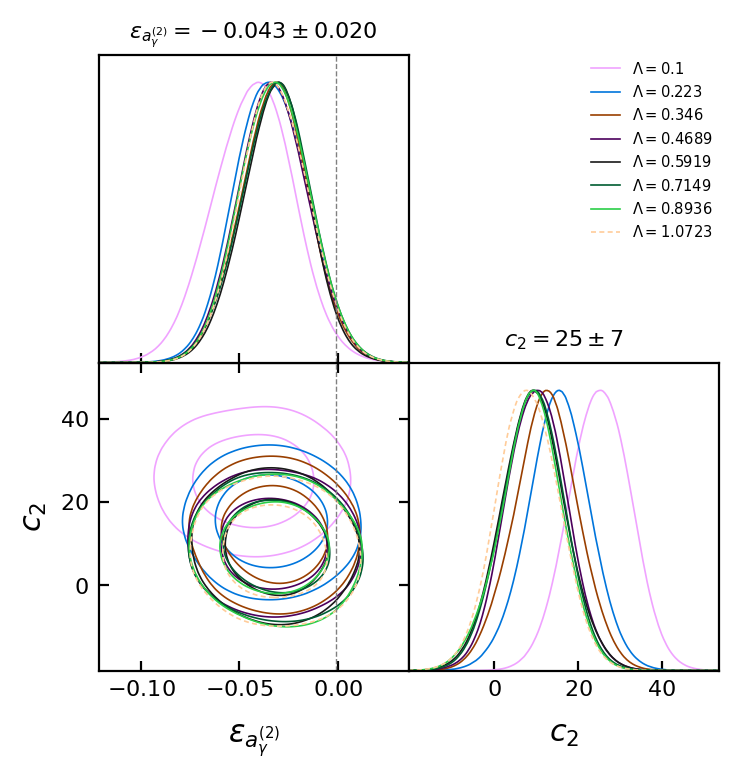

In [10]:
chain_plot_data = {
    "input_files": [],
    "roots": [],
    "legend_labels": [],
    "line_args": [], 
    "contour_args": [],
    **default_triangle_plot
}

for i, (Lambda, chain) in enumerate(zip(Lambdas, chains)):
    chain_plot_data["input_files"].append(f"{project_path}/{chain}/{get_input_file_from_chain(chain)}")
    chain_plot_data["roots"].append(loadMCSamples(f"{project_path}/{chain}/chain"))
    chain_plot_data["legend_labels"].append(rf"$\Lambda={Lambda}$")
    chain_plot_data["line_args"].append({"color": colors[i]})
    chain_plot_data["contour_args"].append({"color": colors[i]})

chain_plot(**chain_plot_data)

# for linking
display(HTML("<div id=\"npt3-kmax0.1\"></div>"))

#### 1.1.1 $c_2(\Lambda)$ running

In [11]:
# for linking
display(HTML("<div id=\"1.1.1\"></div>"))

# get best fit values of c_2 as function of Lambda

burnin = 0.3 # fraction to discard
print(f"{'Lambda':>11} {'c_2 (mean)':>11} {'c_2 (16%)':>11} {'c_2 (84%)':>11}")
for Lambda, chain in zip(Lambdas, chain_plot_data["roots"]):
    # get c_2 chain (index 1)
    samples = chain.samples[:, 1]
    samples = samples[int(burnin*len(samples)):]
    
    print(f"{Lambda:11.4f} {np.mean(samples):11.6f} {np.quantile(samples, 0.16):11.6f} {np.quantile(samples, 0.84):11.6f}")

     Lambda  c_2 (mean)   c_2 (16%)   c_2 (84%)
     0.1000   24.795837   15.603481   33.752841
     0.2230   15.244453    5.784550   25.050191
     0.3460   12.546298    2.654637   22.230030
     0.4689   10.243132    1.297977   19.235875
     0.5919    9.225343   -0.789290   18.965268
     0.7149    9.188942   -0.000342   18.124096
     0.8936    8.621625   -0.564778   17.754275
     1.0723    8.068657   -1.223245   17.601112


### 1.2 Running with $\Lambda$ at $n_\text{PT}=5$, $k_\text{max}=0.1$

In [12]:
# for linking
display(HTML("<div id=\"1.2\"></div>"))

# find chains correponding to parameters and sort them with Lambda

query = {
    "nPT": 5,
    "kmax": 0.1,
    "model": "EFT" # only consider chains ran with only c_s^2-like counterterm in the model
}
chains = browse_chains(
    query = query
)
Lambdas, chains = sort_from_key(chains, "Lambda") # sort list based on Lambda

searching file 52 of 52
Search between the beginning of time and the end of time with the following query:
nPT: 5
kmax: 0.1
model: EFT
yielded the following files:

field-level-inference-GridSPT_output_202503031656
field-level-inference-GridSPT_output_202503031657
field-level-inference-GridSPT_output_202503031658
field-level-inference-GridSPT_output_202503031659
field-level-inference-GridSPT_output_202503031700
field-level-inference-GridSPT_output_202503031701
field-level-inference-GridSPT_output_202503031702
field-level-inference-GridSPT_output_202503031703


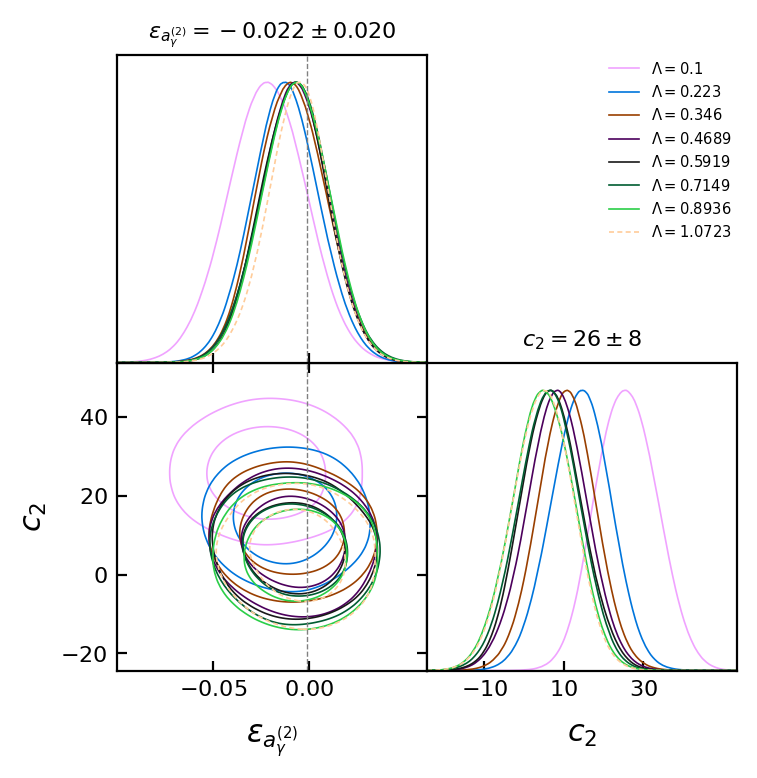

In [13]:
chain_plot_data = {
    "input_files": [],
    "roots": [],
    "legend_labels": [],
    "line_args": [], 
    "contour_args": [],
    **default_triangle_plot
}

for i, (Lambda, chain) in enumerate(zip(Lambdas, chains)):
    chain_plot_data["input_files"].append(f"{project_path}/{chain}/{get_input_file_from_chain(chain)}")
    chain_plot_data["roots"].append(loadMCSamples(f"{project_path}/{chain}/chain"))
    chain_plot_data["legend_labels"].append(rf"$\Lambda={Lambda}$")
    chain_plot_data["line_args"].append({"color": colors[i]})
    chain_plot_data["contour_args"].append({"color": colors[i]})

chain_plot(**chain_plot_data)

# for linking
display(HTML("<div id=\"npt5-kmax0.1\"></div>"))

#### 1.2.1 $c_2(\Lambda)$ running

In [14]:
# for linking
display(HTML("<div id=\"1.2.1\"></div>"))

# get best fit values of c_2 as function of Lambda

burnin = 0.3 # fraction to discard
print(f"{'Lambda':>11} {'c_2 (mean)':>11} {'c_2 (16%)':>11} {'c_2 (84%)':>11}")
for Lambda, chain in zip(Lambdas, chain_plot_data["roots"]):
    # get c_2 chain (index 1)
    samples = chain.samples[:, 1]
    samples = samples[int(burnin*len(samples)):]
    
    print(f"{Lambda:11.4f} {np.mean(samples):11.6f} {np.quantile(samples, 0.16):11.6f} {np.quantile(samples, 0.84):11.6f}")

     Lambda  c_2 (mean)   c_2 (16%)   c_2 (84%)
     0.1000   25.595280   16.350024   35.083318
     0.2230   14.180779    4.789472   23.362036
     0.3460   10.772674    1.810580   19.776543
     0.4689    7.976461   -2.379806   17.762989
     0.5919    6.913766   -2.812192   16.855807
     0.7149    5.828578   -4.081234   15.817354
     0.8936    4.700245   -5.103122   14.295007
     1.0723    4.795538   -4.946065   14.681677


### 1.3 Running with $\Lambda$ at $n_\text{PT}=3$, $k_\text{max}=0.2$

In [15]:
# for linking
display(HTML("<div id=\"1.3\"></div>"))

# find chains correponding to parameters and sort them with Lambda

query = {
    "nPT": 3,
    "kmax": 0.2,
    "model": "EFT" # only consider chains ran with only c_s^2-like counterterm in the model
}
chains = browse_chains(
    query = query
)
Lambdas, chains = sort_from_key(chains, "Lambda") # sort list based on Lambda

searching file 52 of 52
Search between the beginning of time and the end of time with the following query:
nPT: 3
kmax: 0.2
model: EFT
yielded the following files:

field-level-inference-GridSPT_output_202503031743
field-level-inference-GridSPT_output_202503031745
field-level-inference-GridSPT_output_202503031746
field-level-inference-GridSPT_output_202503031748
field-level-inference-GridSPT_output_202503031750
field-level-inference-GridSPT_output_202503031751
field-level-inference-GridSPT_output_202503031756


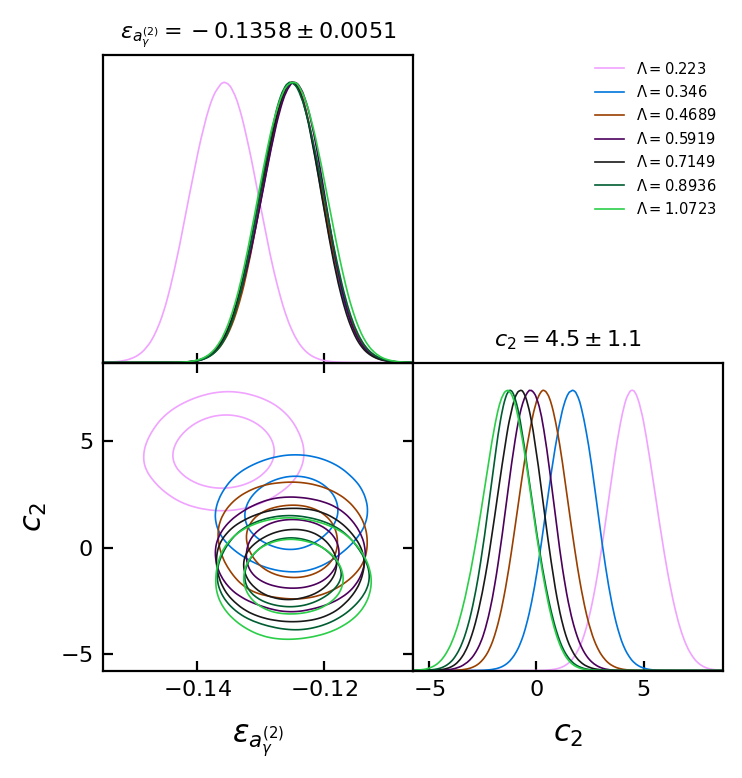

In [16]:
chain_plot_data = {
    "input_files": [],
    "roots": [],
    "legend_labels": [],
    "line_args": [], 
    "contour_args": [],
    **default_triangle_plot
}

for i, (Lambda, chain) in enumerate(zip(Lambdas, chains)):
    chain_plot_data["input_files"].append(f"{project_path}/{chain}/{get_input_file_from_chain(chain)}")
    chain_plot_data["roots"].append(loadMCSamples(f"{project_path}/{chain}/chain"))
    chain_plot_data["legend_labels"].append(rf"$\Lambda={Lambda}$")
    chain_plot_data["line_args"].append({"color": colors[i]})
    chain_plot_data["contour_args"].append({"color": colors[i]})

chain_plot(**chain_plot_data)

# for linking
display(HTML("<div id=\"npt3-kmax0.2\"></div>"))

#### 1.3.1 $c_2(\Lambda)$ running

In [17]:
# for linking
display(HTML("<div id=\"1.3.1\"></div>"))

# get best fit values of c_2 as function of Lambda

burnin = 0.3 # fraction to discard
print(f"{'Lambda':>11} {'c_2 (mean)':>11} {'c_2 (16%)':>11} {'c_2 (84%)':>11}")
for Lambda, chain in zip(Lambdas, chain_plot_data["roots"]):
    # get c_2 chain (index 1)
    samples = chain.samples[:, 1]
    samples = samples[int(burnin*len(samples)):]
    
    print(f"{Lambda:11.4f} {np.mean(samples):11.6f} {np.quantile(samples, 0.16):11.6f} {np.quantile(samples, 0.84):11.6f}")

     Lambda  c_2 (mean)   c_2 (16%)   c_2 (84%)
     0.2230    4.532231    3.059715    6.068199
     0.3460    1.660053    0.134443    3.172409
     0.4689    0.353193   -1.171631    1.887412
     0.5919   -0.296073   -1.739594    1.171450
     0.7149   -0.800692   -2.331327    0.626977
     0.8936   -1.142039   -2.594117    0.378406
     1.0723   -1.444572   -3.047592    0.084284


### 1.4 Running with $\Lambda$ at $n_\text{PT}=5$, $k_\text{max}=0.2$

In [30]:
# for linking
display(HTML("<div id=\"1.4\"></div>"))

# find chains correponding to parameters and sort them with Lambda

query = {
    "nPT": 5,
    "kmax": 0.2,
    "model": "EFT" # only consider chains ran with only c_s^2-like counterterm in the model
}
chains = browse_chains(
    query = query
)
Lambdas, chains = sort_from_key(chains, "Lambda") # sort list based on Lambda

searching file 52 of 52
Search between the beginning of time and the end of time with the following query:
nPT: 5
kmax: 0.2
model: EFT
yielded the following files:

field-level-inference-GridSPT_output_202503031747
field-level-inference-GridSPT_output_202503031752
field-level-inference-GridSPT_output_202503031753
field-level-inference-GridSPT_output_202503031754
field-level-inference-GridSPT_output_202503031755
field-level-inference-GridSPT_output_202503031757
field-level-inference-GridSPT_output_202503031758


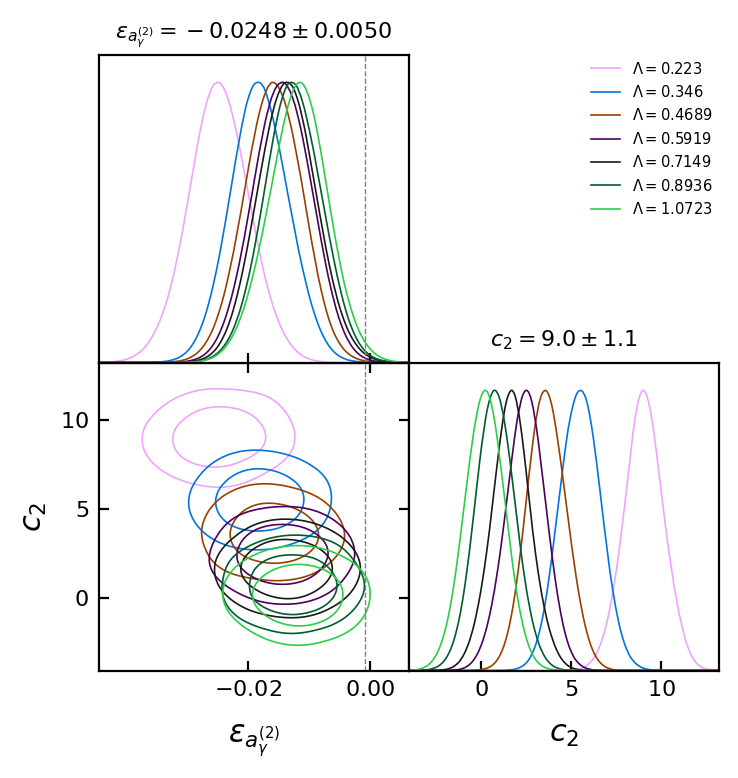

In [31]:
chain_plot_data = {
    "input_files": [],
    "roots": [],
    "legend_labels": [],
    "line_args": [], 
    "contour_args": [],
    **default_triangle_plot
}

for i, (Lambda, chain) in enumerate(zip(Lambdas, chains)):
    chain_plot_data["input_files"].append(f"{project_path}/{chain}/{get_input_file_from_chain(chain)}")
    chain_plot_data["roots"].append(loadMCSamples(f"{project_path}/{chain}/chain"))
    chain_plot_data["legend_labels"].append(rf"$\Lambda={Lambda}$")
    chain_plot_data["line_args"].append({"color": colors[i]})
    chain_plot_data["contour_args"].append({"color": colors[i]})

chain_plot(**chain_plot_data)

# for linking
display(HTML("<div id=\"npt5-kmax0.2\"></div>"))

#### 1.4.1 $c_2(\Lambda)$ running

In [32]:
# for linking
display(HTML("<div id=\"1.4.1\"></div>"))

# get best fit values of c_2 as function of Lambda

burnin = 0.3 # fraction to discard
print(f"{'Lambda':>11} {'c_2 (mean)':>11} {'c_2 (16%)':>11} {'c_2 (84%)':>11}")
for Lambda, chain in zip(Lambdas, chain_plot_data["roots"]):
    # get c_2 chain (index 1)
    samples = chain.samples[:, 1]
    samples = samples[int(burnin*len(samples)):]
    
    print(f"{Lambda:11.4f} {np.mean(samples):11.6f} {np.quantile(samples, 0.16):11.6f} {np.quantile(samples, 0.84):11.6f}")

     Lambda  c_2 (mean)   c_2 (16%)   c_2 (84%)
     0.2230    9.024597    7.548194   10.625599
     0.3460    5.508882    3.917971    7.128598
     0.4689    3.615653    2.134347    5.252257
     0.5919    2.372353    0.797598    3.900861
     0.7149    1.690996    0.181788    3.225257
     0.8936    0.767347   -0.751868    2.310540
     1.0723    0.162871   -1.400180    1.734232


### 1.5 Higher derivative terms at $k_\text{max}=0.1$ for different $n_\text{PT}$ and $\Lambda$

In [20]:
# for linking
display(HTML("<div id=\"1.5\"></div>"))

# first find chains correponding to nPT=3 and sort them with Lambda
# then do the same with nPT=5

query = {
    "nPT": 3,
    "kmax": 0.1,
    "model": "high_der" # only consider chains ran with higher derivative model
}
chains1 = browse_chains(
    query = query
)
Lambdas1, chains1 = sort_from_key(chains1, "Lambda") # sort list based on Lambda

query = {
    "nPT": 5,
    "kmax": 0.1,
    "model": "high_der" # only consider chains ran with higher derivative model
}
chains2 = browse_chains(
    query = query
)
Lambdas2, chains2 = sort_from_key(chains2, "Lambda") # sort list based on Lambda

searching file 52 of 52
Search between the beginning of time and the end of time with the following query:
nPT: 3
kmax: 0.1
model: high_der
yielded the following files:

field-level-inference-GridSPT_output_202503031801
field-level-inference-GridSPT_output_202503031802
searching file 52 of 52
Search between the beginning of time and the end of time with the following query:
nPT: 5
kmax: 0.1
model: high_der
yielded the following files:

field-level-inference-GridSPT_output_202503031803
field-level-inference-GridSPT_output_202503031804


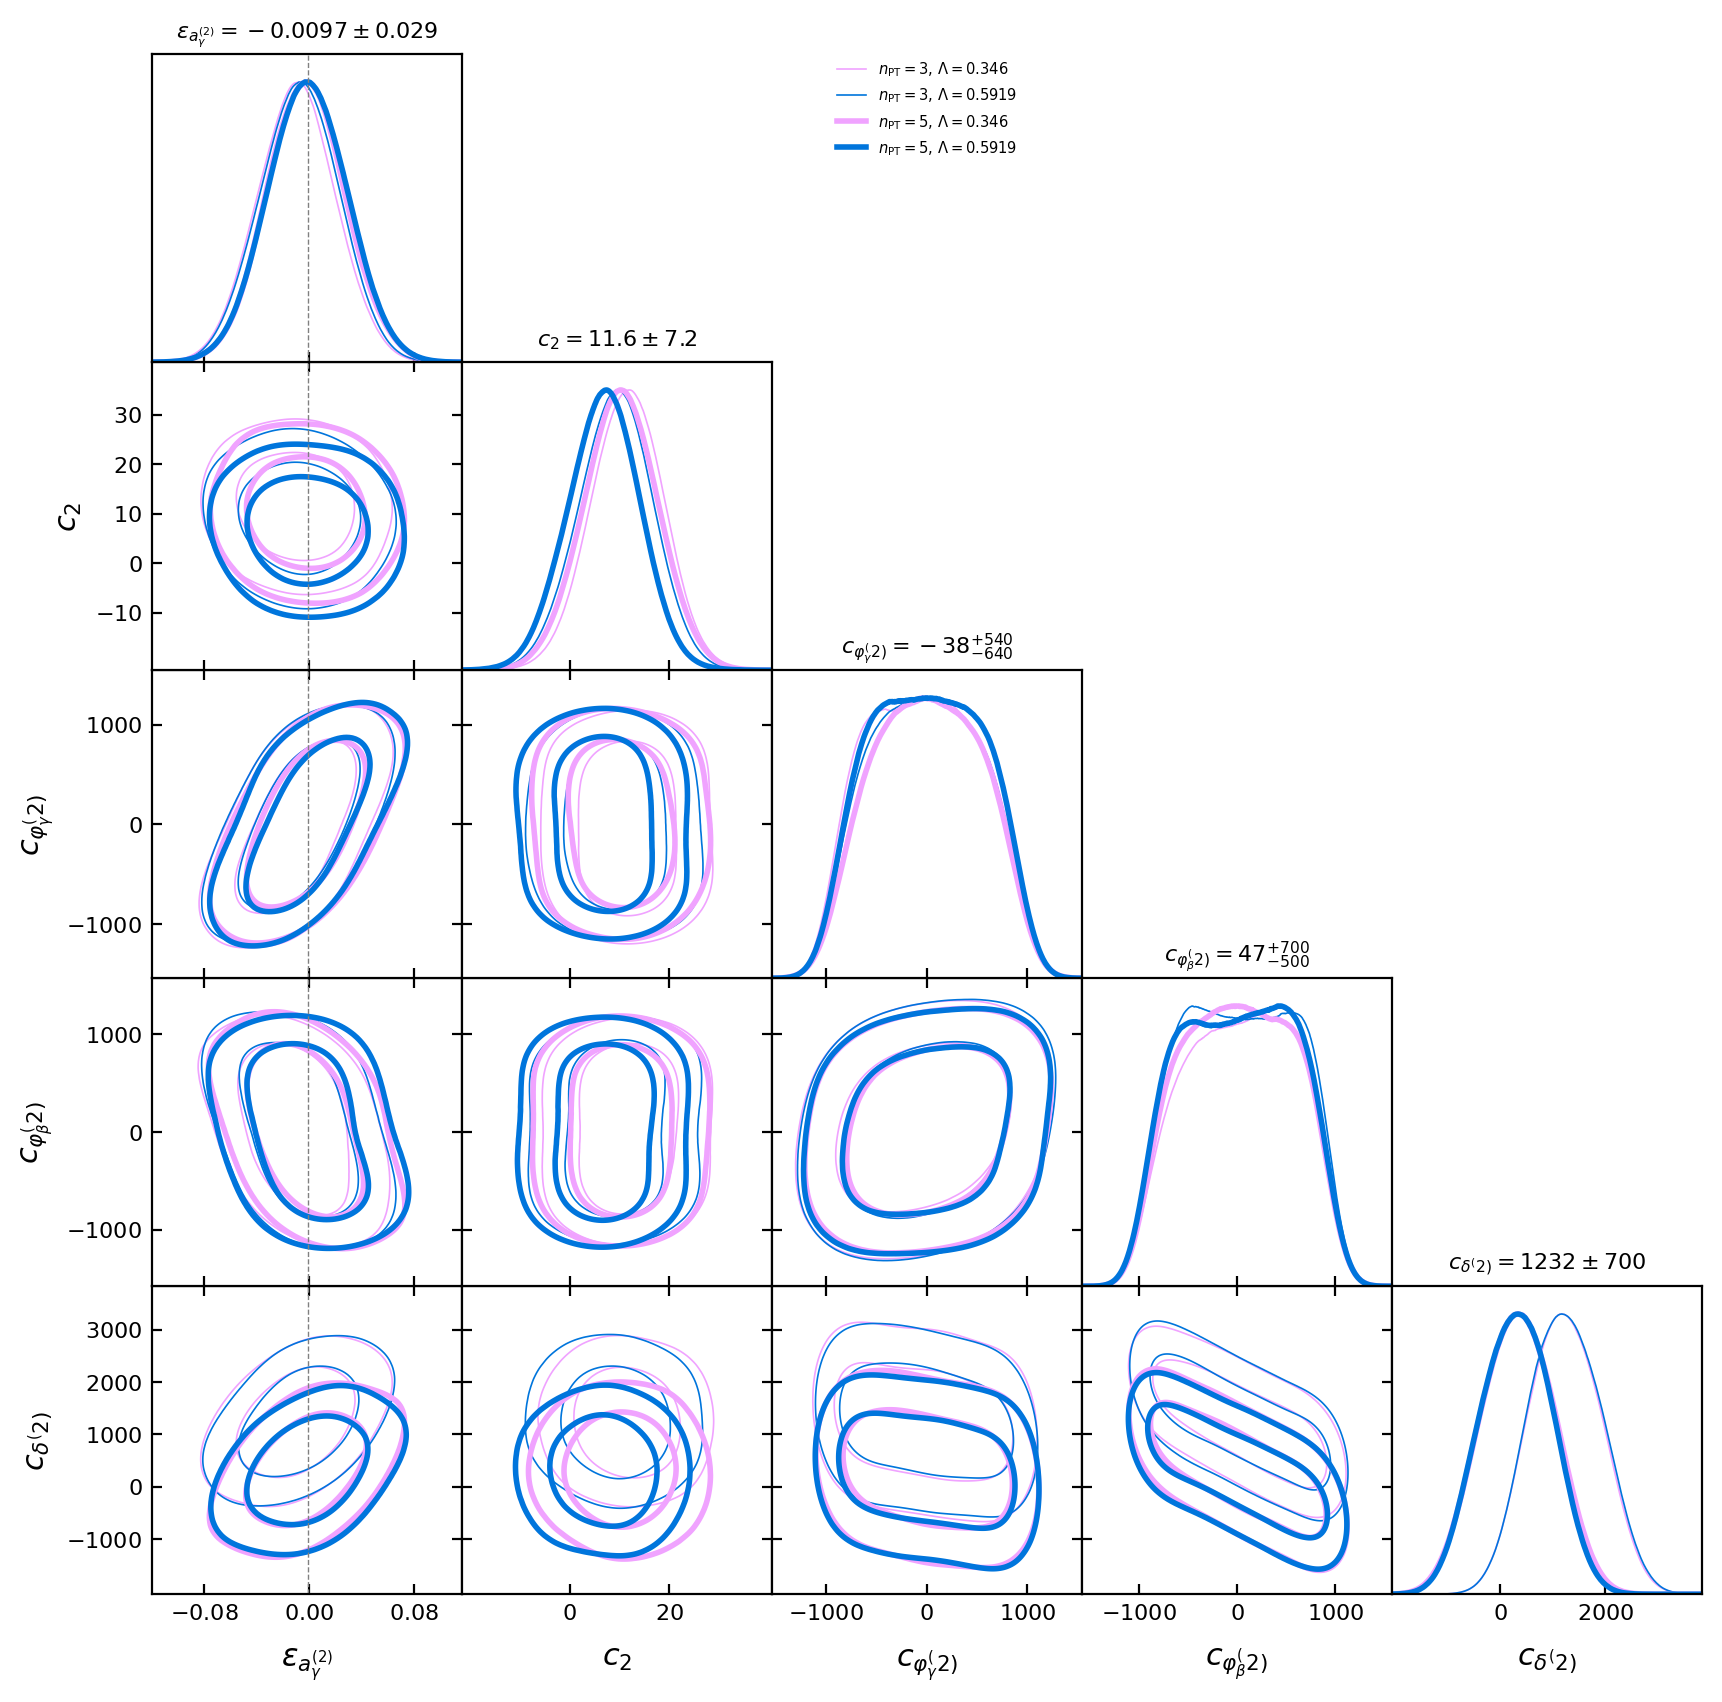

In [21]:
chain_plot_data = {
    "input_files": [],
    "roots": [],
    "legend_labels": [],
    "line_args": [], 
    "contour_args": [],
    **default_triangle_plot
}

for i, (Lambda, chain) in enumerate(zip(Lambdas1, chains1)):
    chain_plot_data["input_files"].append(f"{project_path}/{chain}/{get_input_file_from_chain(chain)}")
    chain_plot_data["roots"].append(loadMCSamples(f"{project_path}/{chain}/chain"))
    chain_plot_data["legend_labels"].append(rf"$n_\text{{PT}}=3$, $\Lambda={Lambda}$")
    chain_plot_data["line_args"].append({"color": colors[i]})
    chain_plot_data["contour_args"].append({"color": colors[i]})

for i, (Lambda, chain) in enumerate(zip(Lambdas2, chains2)):
    chain_plot_data["input_files"].append(f"{project_path}/{chain}/{get_input_file_from_chain(chain)}")
    chain_plot_data["roots"].append(loadMCSamples(f"{project_path}/{chain}/chain"))
    chain_plot_data["legend_labels"].append(rf"$n_\text{{PT}}=5$, $\Lambda={Lambda}$")
    chain_plot_data["line_args"].append({
        "color": colors[i],
        "lw": 2
    })
    chain_plot_data["contour_args"].append({
        "color": colors[i],
        "lw": 2
    })

chain_plot(**chain_plot_data)

# for linking
display(HTML("<div id=\"highder-kmax0.1\"></div>"))

### 1.6 Higher derivative terms at $k_\text{max}=0.2$ for different $n_\text{PT}$ and $\Lambda$

In [22]:
# for linking
display(HTML("<div id=\"1.6\"></div>"))

# first find chains correponding to nPT=3 and sort them with Lambda
# then do the same with nPT=5

query = {
    "nPT": 3,
    "kmax": 0.2,
    "model": "high_der" # only consider chains ran with higher derivative model
}
chains1 = browse_chains(
    query = query
)
Lambdas1, chains1 = sort_from_key(chains1, "Lambda") # sort list based on Lambda

query = {
    "nPT": 5,
    "kmax": 0.2,
    "model": "high_der" # only consider chains ran with higher derivative model
}
chains2 = browse_chains(
    query = query
)
Lambdas2, chains2 = sort_from_key(chains2, "Lambda") # sort list based on Lambda

searching file 52 of 52
Search between the beginning of time and the end of time with the following query:
nPT: 3
kmax: 0.2
model: high_der
yielded the following files:

field-level-inference-GridSPT_output_202503031806
field-level-inference-GridSPT_output_202503031808
searching file 52 of 52
Search between the beginning of time and the end of time with the following query:
nPT: 5
kmax: 0.2
model: high_der
yielded the following files:

field-level-inference-GridSPT_output_202503031805
field-level-inference-GridSPT_output_202503031807


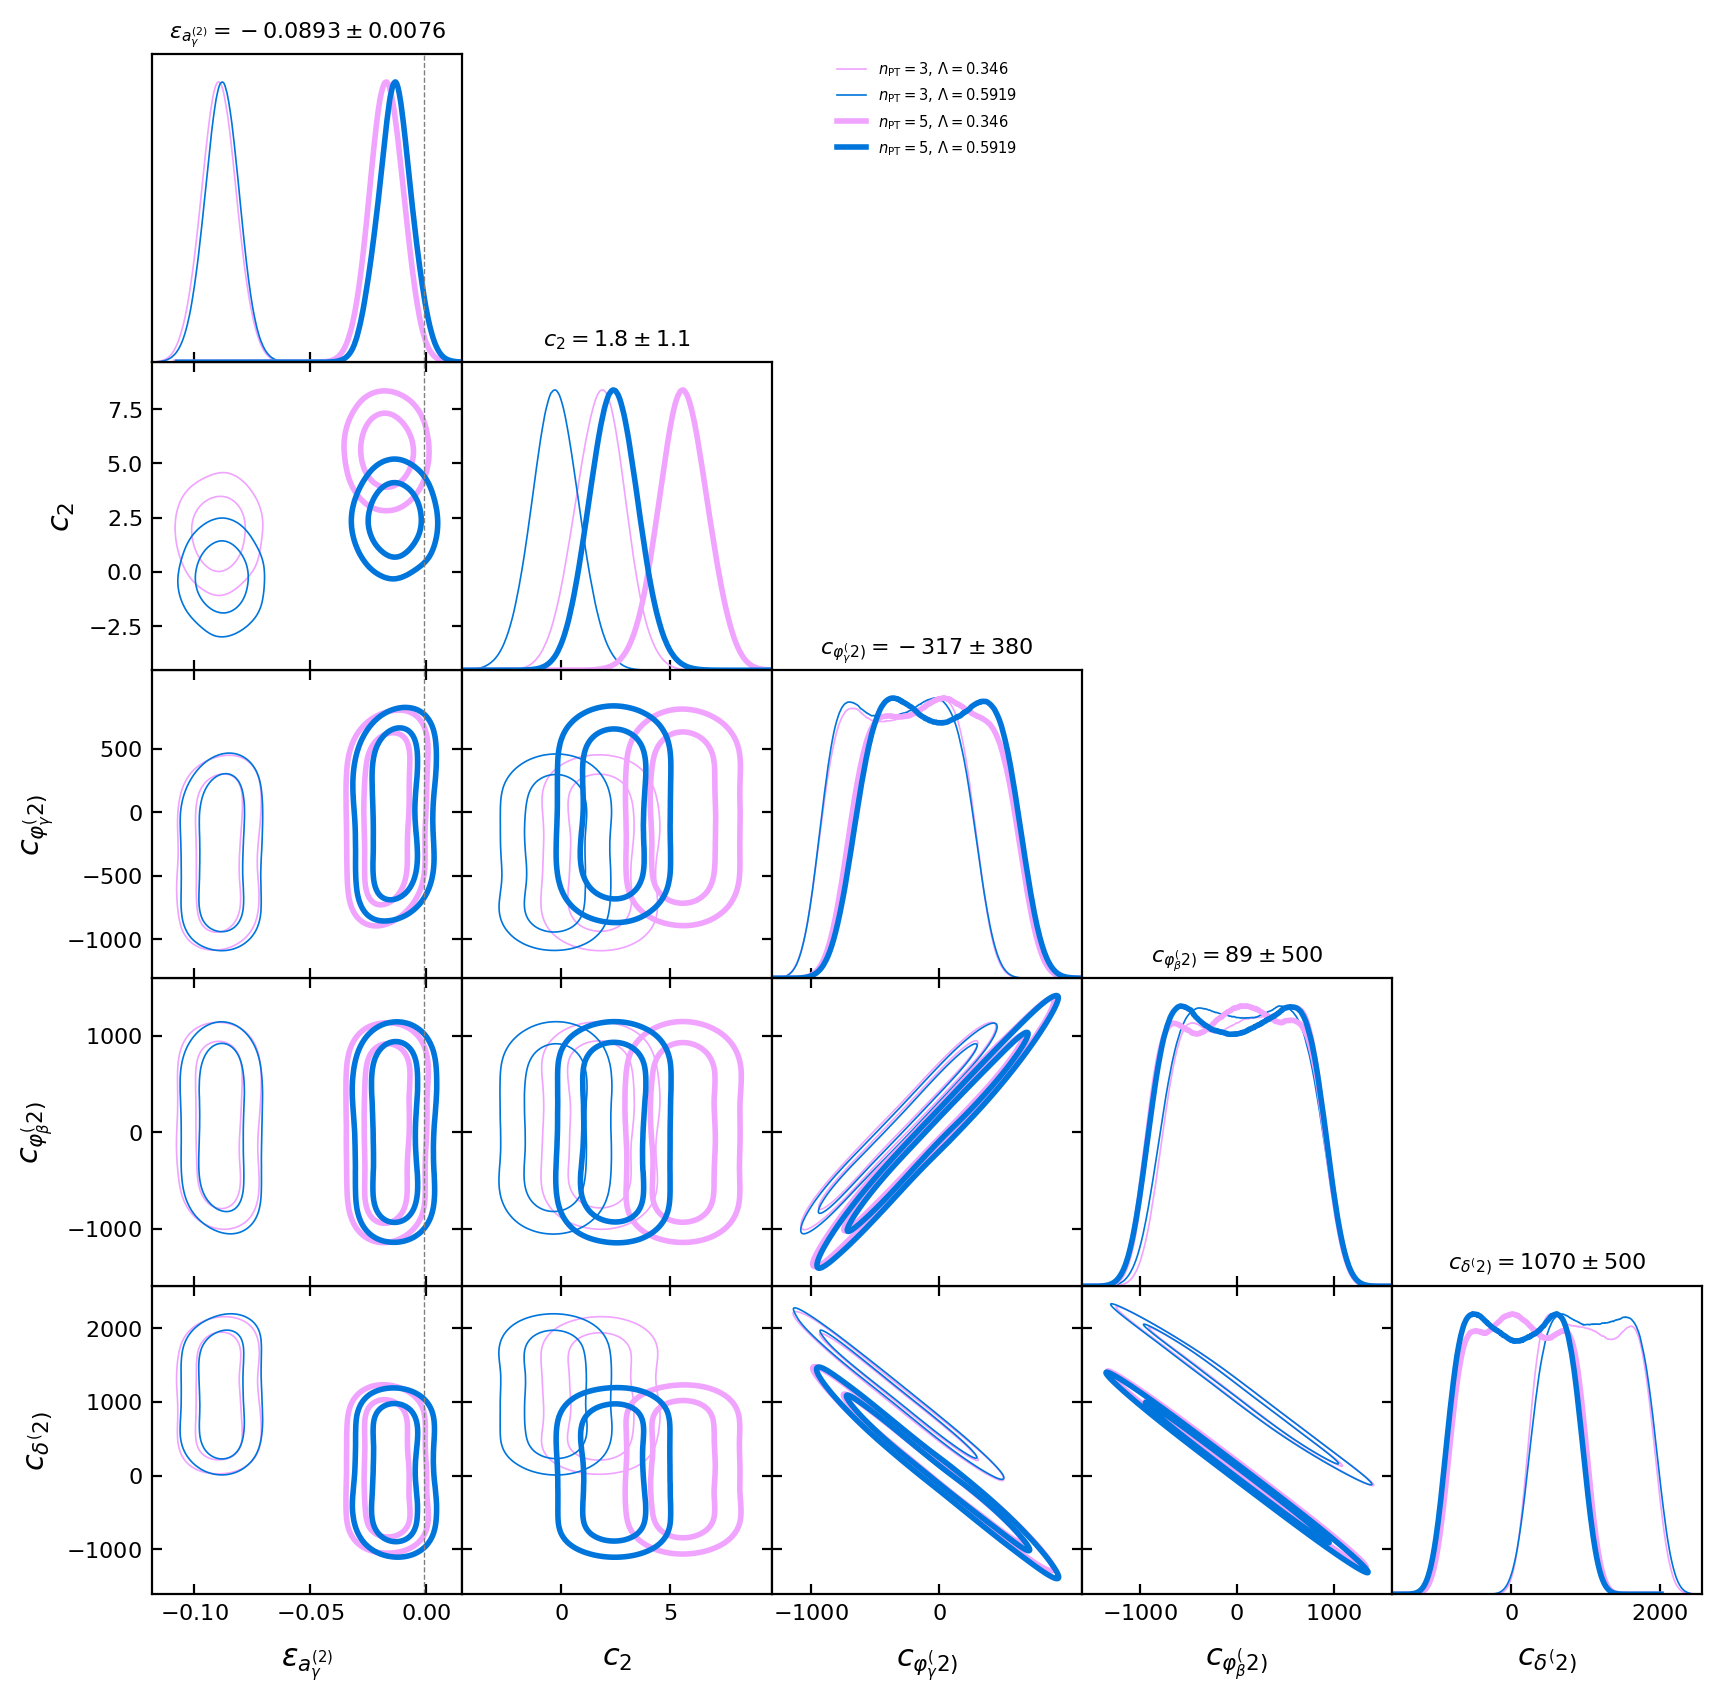

In [23]:
chain_plot_data = {
    "input_files": [],
    "roots": [],
    "legend_labels": [],
    "line_args": [], 
    "contour_args": [],
    **default_triangle_plot
}

for i, (Lambda, chain) in enumerate(zip(Lambdas1, chains1)):
    chain_plot_data["input_files"].append(f"{project_path}/{chain}/{get_input_file_from_chain(chain)}")
    chain_plot_data["roots"].append(loadMCSamples(f"{project_path}/{chain}/chain"))
    chain_plot_data["legend_labels"].append(rf"$n_\text{{PT}}=3$, $\Lambda={Lambda}$")
    chain_plot_data["line_args"].append({"color": colors[i]})
    chain_plot_data["contour_args"].append({"color": colors[i]})

for i, (Lambda, chain) in enumerate(zip(Lambdas2, chains2)):
    chain_plot_data["input_files"].append(f"{project_path}/{chain}/{get_input_file_from_chain(chain)}")
    chain_plot_data["roots"].append(loadMCSamples(f"{project_path}/{chain}/chain"))
    chain_plot_data["legend_labels"].append(rf"$n_\text{{PT}}=5$, $\Lambda={Lambda}$")
    chain_plot_data["line_args"].append({
        "color": colors[i],
        "lw": 2
    })
    chain_plot_data["contour_args"].append({
        "color": colors[i],
        "lw": 2
    })

chain_plot(**chain_plot_data)

# for linking
display(HTML("<div id=\"highder-kmax0.2\"></div>"))

### 1.7 Running with $\Lambda$ at $n_\text{PT}=3$, $k_\text{max}=0.15$

In [24]:
# for linking
display(HTML("<div id=\"1.7\"></div>"))

# staging new input files for calculation
# make sure the files I'm looking for don't exist (to avoid writing new files when the cell is executed)

query = {
    "nPT": 3,
    "kmax": 0.15,
    "model": "EFT"
}
chains = browse_chains(
    query = query
)
Lambdas, chains = sort_from_key(chains, "Lambda")

searching file 52 of 52
Search between the beginning of time and the end of time with the following query:
nPT: 3
kmax: 0.15
model: EFT
yielded the following files:

field-level-inference-GridSPT_output_202503071736
field-level-inference-GridSPT_output_202503071737
field-level-inference-GridSPT_output_202503071738
field-level-inference-GridSPT_output_202503071739
field-level-inference-GridSPT_output_202503071740
field-level-inference-GridSPT_output_202503071741
field-level-inference-GridSPT_output_202503071742


In [10]:
# create new files

query = {
    "nPT": 3,
    "kmax": 0.1,
    "model": "EFT"
}
inputs = browse_inputs(
    query = query
)

parameters, new_inputs = [], []
for i, inp in enumerate(inputs):
    parameters.append(parse_yaml(f"{project_path}/{inp}"))

    t = time.gmtime(time.time()+3600+i*60)
    datestr = time.strftime("%Y%m%d%H%M", t)
    new_inputs.append(inp.replace(get_datestr(inp), datestr))

answers = []
for old, new, pars in zip(inputs, new_inputs, parameters):
    nested_set(pars, ["chain", "kmax"], 0.15)
    nested_set(
        pars,
        ["chain", "path"], 
        pars["chain"]["path"].replace(get_datestr(old), get_datestr(new))
    )
    print(f"Changing {old} to {new} as:")
    diff(parse_yaml(f"{project_path}/{old}"), pars)
    answers.append(input("continue? (y/n)"))
    
for answer, new, pars in zip(answers, new_inputs, parameters):
    if answer=="y":
        with open(f"{project_path}/{new}", "w") as f:
            yaml.dump(pars, f)
    else:
        print(f"{new} has not been written")

searching file 39 of 39
Search between the beginning of time and the end of time with the following query:
nPT: 3
kmax: 0.1
model: EFT
yielded the following files:

field-level-inference-GridSPT_input_202502251617.yaml
field-level-inference-GridSPT_input_202503031150.yaml
field-level-inference-GridSPT_input_202503031156.yaml
field-level-inference-GridSPT_input_202503031248.yaml
field-level-inference-GridSPT_input_202503031620.yaml
field-level-inference-GridSPT_input_202503031622.yaml
field-level-inference-GridSPT_input_202503031624.yaml
field-level-inference-GridSPT_input_202503031628.yaml
field-level-inference-GridSPT_input_master.yaml
Changing field-level-inference-GridSPT_input_202502251617.yaml to field-level-inference-GridSPT_input_202503071735.yaml as:

README: "This is the input file containing all the information about a single execution of the project 'field-level-inference-GridSPT'.""
""
"The file is structured as follows:"
""
"  - `gridspt_fields` contains all the informatio

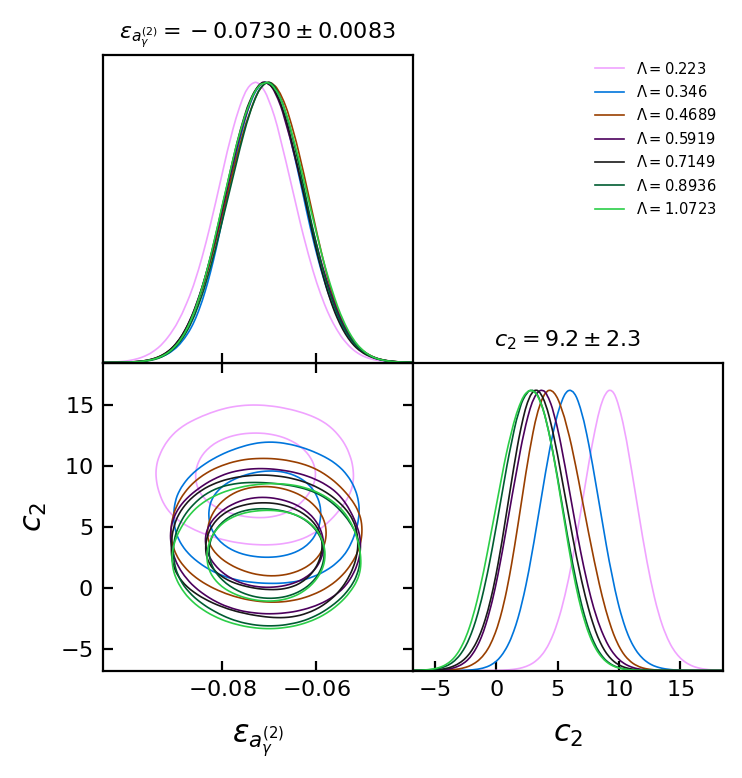

In [25]:
chain_plot_data = {
    "input_files": [],
    "roots": [],
    "legend_labels": [],
    "line_args": [], 
    "contour_args": [],
    **default_triangle_plot
}

for i, (Lambda, chain) in enumerate(zip(Lambdas, chains)):
    chain_plot_data["input_files"].append(f"{project_path}/{chain}/{get_input_file_from_chain(chain)}")
    chain_plot_data["roots"].append(loadMCSamples(f"{project_path}/{chain}/chain"))
    chain_plot_data["legend_labels"].append(rf"$\Lambda={Lambda}$")
    chain_plot_data["line_args"].append({"color": colors[i]})
    chain_plot_data["contour_args"].append({"color": colors[i]})

chain_plot(**chain_plot_data)

# for linking
display(HTML("<div id=\"npt3-kmax0.15\"></div>"))

#### 1.7.1 $c_2(\Lambda)$ running

In [26]:
# for linking
display(HTML("<div id=\"1.7.1\"></div>"))

# get best fit values of c_2 as function of Lambda

burnin = 0.3 # fraction to discard
print(f"{'Lambda':>11} {'c_2 (mean)':>11} {'c_2 (16%)':>11} {'c_2 (84%)':>11}")
for Lambda, chain in zip(Lambdas, chain_plot_data["roots"]):
    # get c_2 chain (index 1)
    samples = chain.samples[:, 1]
    samples = samples[int(burnin*len(samples)):]
    
    print(f"{Lambda:11.4f} {np.mean(samples):11.6f} {np.quantile(samples, 0.16):11.6f} {np.quantile(samples, 0.84):11.6f}")

     Lambda  c_2 (mean)   c_2 (16%)   c_2 (84%)
     0.2230    9.262540    6.041099   12.458645
     0.3460    6.104722    2.886395    9.315964
     0.4689    4.573742    1.483996    7.915627
     0.5919    3.763591    0.454732    7.194886
     0.7149    3.380412    0.069447    6.787540
     0.8936    2.753170   -0.513360    5.958172
     1.0723    2.719876   -0.563991    5.852117


### 1.8 Running with $\Lambda$ at $n_\text{PT}=5$, $k_\text{max}=0.15$

In [27]:
# for linking
display(HTML("<div id=\"1.8\"></div>"))

# staging new input files for calculation
# make sure the files I'm looking for don't exist (to avoid writing new files when the cell is executed)

query = {
    "nPT": 5,
    "kmax": 0.15,
    "model": "EFT"
}
chains = browse_chains(
    query = query
)
Lambdas, chains = sort_from_key(chains, "Lambda")

searching file 52 of 52
Search between the beginning of time and the end of time with the following query:
nPT: 5
kmax: 0.15
model: EFT
yielded the following files:

field-level-inference-GridSPT_output_202503071749
field-level-inference-GridSPT_output_202503071750
field-level-inference-GridSPT_output_202503071751
field-level-inference-GridSPT_output_202503071752
field-level-inference-GridSPT_output_202503071754
field-level-inference-GridSPT_output_202503071755
field-level-inference-GridSPT_output_202503071756


In [12]:
# create new files

query = {
    "nPT": 5,
    "kmax": 0.1,
    "model": "EFT"
}
inputs = browse_inputs(
    query = query
)

parameters, new_inputs = [], []
for i, inp in enumerate(inputs):
    parameters.append(parse_yaml(f"{project_path}/{inp}"))

    t = time.gmtime(time.time()+3600+i*60)
    datestr = time.strftime("%Y%m%d%H%M", t)
    new_inputs.append(inp.replace(get_datestr(inp), datestr))

answers = []
for old, new, pars in zip(inputs, new_inputs, parameters):
    nested_set(pars, ["chain", "kmax"], 0.15)
    nested_set(
        pars,
        ["chain", "path"], 
        pars["chain"]["path"].replace(get_datestr(old), get_datestr(new))
    )
    print(f"Changing {old} to {new} as:")
    diff(parse_yaml(f"{project_path}/{old}"), pars)
    answers.append(input("continue? (y/n)"))
    
for answer, new, pars in zip(answers, new_inputs, parameters):
    if answer=="y":
        with open(f"{project_path}/{new}", "w") as f:
            yaml.dump(pars, f)
    else:
        print(f"{new} has not been written")

searching file 46 of 46
Search between the beginning of time and the end of time with the following query:
nPT: 5
kmax: 0.1
model: EFT
yielded the following files:

field-level-inference-GridSPT_input_202503031656.yaml
field-level-inference-GridSPT_input_202503031657.yaml
field-level-inference-GridSPT_input_202503031658.yaml
field-level-inference-GridSPT_input_202503031659.yaml
field-level-inference-GridSPT_input_202503031700.yaml
field-level-inference-GridSPT_input_202503031701.yaml
field-level-inference-GridSPT_input_202503031702.yaml
field-level-inference-GridSPT_input_202503031703.yaml
Changing field-level-inference-GridSPT_input_202503031656.yaml to field-level-inference-GridSPT_input_202503071749.yaml as:

README: "This is the input file containing all the information about a single execution of the project 'field-level-inference-GridSPT'.""
""
"The file is structured as follows:"
""
"  - `gridspt_fields` contains all the information about the fields generated by GridSPT;"
"  - `

/hpc/home/matteo.peron/projects/field-level-inference-GridSPT/in_out/field-level-inference-GridSPT_output_202503071751/chain.txt
Removed no burn in
/hpc/home/matteo.peron/projects/field-level-inference-GridSPT/in_out/field-level-inference-GridSPT_output_202503071756/chain.txt
Removed no burn in
/hpc/home/matteo.peron/projects/field-level-inference-GridSPT/in_out/field-level-inference-GridSPT_output_202503071749/chain.txt
Removed no burn in
/hpc/home/matteo.peron/projects/field-level-inference-GridSPT/in_out/field-level-inference-GridSPT_output_202503071752/chain.txt
Removed no burn in
/hpc/home/matteo.peron/projects/field-level-inference-GridSPT/in_out/field-level-inference-GridSPT_output_202503071754/chain.txt
Removed no burn in
/hpc/home/matteo.peron/projects/field-level-inference-GridSPT/in_out/field-level-inference-GridSPT_output_202503071750/chain.txt
Removed no burn in
/hpc/home/matteo.peron/projects/field-level-inference-GridSPT/in_out/field-level-inference-GridSPT_output_202503

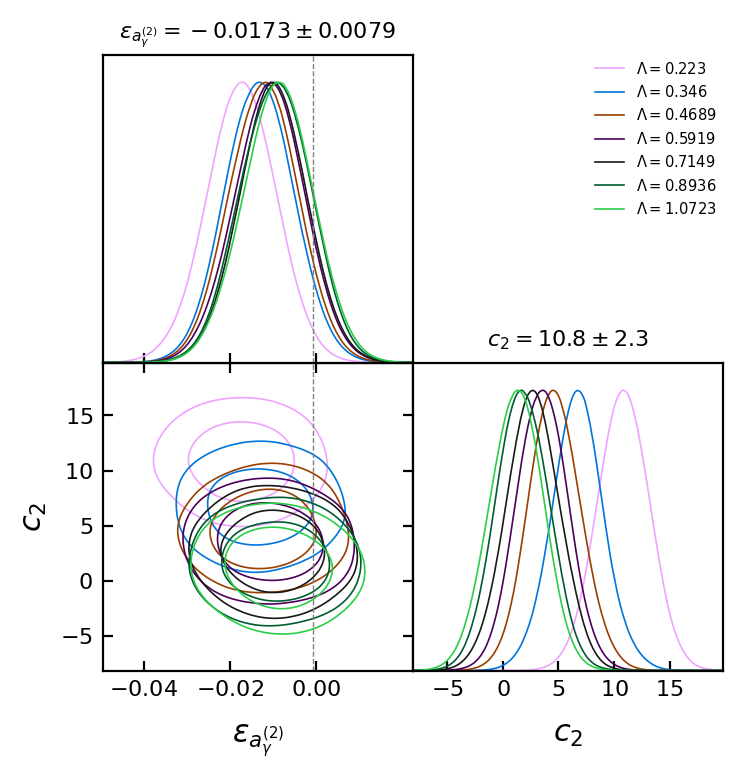

In [ ]:
chain_plot_data = {
    "input_files": [],
    "roots": [],
    "legend_labels": [],
    "line_args": [], 
    "contour_args": [],
    **default_triangle_plot
}

for i, (Lambda, chain) in enumerate(zip(Lambdas, chains)):
    chain_plot_data["input_files"].append(f"{project_path}/{chain}/{get_input_file_from_chain(chain)}")
    chain_plot_data["roots"].append(loadMCSamples(f"{project_path}/{chain}/chain"))
    chain_plot_data["legend_labels"].append(rf"$\Lambda={Lambda}$")
    chain_plot_data["line_args"].append({"color": colors[i]})
    chain_plot_data["contour_args"].append({"color": colors[i]})

chain_plot(**chain_plot_data)

# for linking
display(HTML("<div id=\"npt5-kmax0.15\"></div>"))

#### 1.8.1 $c_2(\Lambda)$ running

In [29]:
# for linking
display(HTML("<div id=\"1.7.1\"></div>"))

# get best fit values of c_2 as function of Lambda

burnin = 0.3 # fraction to discard
print(f"{'Lambda':>11} {'c_2 (mean)':>11} {'c_2 (16%)':>11} {'c_2 (84%)':>11}")
for Lambda, chain in zip(Lambdas, chain_plot_data["roots"]):
    # get c_2 chain (index 1)
    samples = chain.samples[:, 1]
    samples = samples[int(burnin*len(samples)):]
    
    print(f"{Lambda:11.4f} {np.mean(samples):11.6f} {np.quantile(samples, 0.16):11.6f} {np.quantile(samples, 0.84):11.6f}")

     Lambda  c_2 (mean)   c_2 (16%)   c_2 (84%)
     0.2230   10.800318    7.493261   14.183111
     0.3460    6.661996    3.377452    9.856788
     0.4689    4.645302    1.532263    7.918954
     0.5919    3.571847    0.341295    6.754949
     0.7149    2.629899   -0.857398    6.171785
     0.8936    1.794917   -1.424335    4.984431
     1.0723    1.217920   -1.935588    4.321155


### 1.9 only $c_{\delta^{(2)}}$ correction at $k_\text{max}=0.1$

In [4]:
# for linking
display(HTML("<div id=\"1.9\"></div>"))

# first find chains correponding to nPT=3 and sort them with Lambda
# then do the same with nPT=5

query = {
    "nPT": 3,
    "kmax": 0.1,
    "model": "high_der", # only consider chains ran with higher derivative model
    "run_1": 0, # fix c_phi terms to 0
    "run_2": 0
}
chains1 = browse_chains(
    query = query
)
Lambdas1, chains1 = sort_from_key(chains1, "Lambda") # sort list based on Lambda

query = {
    "nPT": 5,
    "kmax": 0.1,
    "model": "high_der", # only consider chains ran with higher derivative model
    "run_1": 0, # fix c_phi terms to 0
    "run_2": 0
}
chains2 = browse_chains(
    query = query
)
Lambdas2, chains2 = sort_from_key(chains2, "Lambda") # sort list based on Lambda

searching file 60 of 60
Search between the beginning of time and the end of time with the following query:
nPT: 3
kmax: 0.1
model: high_der
run_1: 0
run_2: 0
yielded the following files:

field-level-inference-GridSPT_output_202503081805
field-level-inference-GridSPT_output_202503081806
searching file 60 of 60
Search between the beginning of time and the end of time with the following query:
nPT: 5
kmax: 0.1
model: high_der
run_1: 0
run_2: 0
yielded the following files:

field-level-inference-GridSPT_output_202503081807
field-level-inference-GridSPT_output_202503081808


In [36]:
# create new files

query = {
    "kmax": 0.1,
    "model": "high_der"
}
inputs = browse_inputs(
    query = query
)

parameters, new_inputs = [], []
for i, inp in enumerate(inputs):
    parameters.append(parse_yaml(f"{project_path}/{inp}"))

    t = time.gmtime(time.time()+3600+i*60)
    datestr = time.strftime("%Y%m%d%H%M", t)
    new_inputs.append(inp.replace(get_datestr(inp), datestr))

answers = []
for old, new, pars in zip(inputs, new_inputs, parameters):
    nested_set(pars, ["gridspt_fields", "run_1"], 0)
    nested_set(pars, ["gridspt_fields", "run_2"], 0)
    nested_del(pars, ["chain", "prior", 2])
    nested_del(pars, ["chain", "prior", 3])
    tmp = nested_get(pars, ["chain", "prior", 4])
    nested_del(pars, ["chain", "prior", 4])
    nested_set(pars, ["chain", "prior", 2], tmp)
    nested_set(
        pars,
        ["chain", "path"], 
        pars["chain"]["path"].replace(get_datestr(old), get_datestr(new))
    )
    print(f"Changing {old} to {new} as:")
    diff(parse_yaml(f"{project_path}/{old}"), pars)
    answers.append(input("continue? (y/n)"))
    
for answer, new, pars in zip(answers, new_inputs, parameters):
    if answer=="y":
        with open(f"{project_path}/{new}", "w") as f:
            yaml.dump(pars, f)
    else:
        print(f"{new} has not been written")

searching file 53 of 53
Search between the beginning of time and the end of time with the following query:
kmax: 0.1
model: high_der
yielded the following files:

field-level-inference-GridSPT_input_202503031801.yaml
field-level-inference-GridSPT_input_202503031802.yaml
field-level-inference-GridSPT_input_202503031803.yaml
field-level-inference-GridSPT_input_202503031804.yaml
Changing field-level-inference-GridSPT_input_202503031801.yaml to field-level-inference-GridSPT_input_202503081805.yaml as:

README: "This is the input file containing all the information about a single execution of the project 'field-level-inference-GridSPT'.""
""
"The file is structured as follows:"
""
"  - `gridspt_fields` contains all the information about the fields generated by GridSPT;"
"  - `nbody_field_input` contains all the information about the fields generated from an N-body simulation;"
"  - `nbody_field_output` contains all the information about the N-body snapshot used to generate N-body fields;"
"

continue? (y/n) y


Changing field-level-inference-GridSPT_input_202503031802.yaml to field-level-inference-GridSPT_input_202503081806.yaml as:

README: "This is the input file containing all the information about a single execution of the project 'field-level-inference-GridSPT'.""
""
"The file is structured as follows:"
""
"  - `gridspt_fields` contains all the information about the fields generated by GridSPT;"
"  - `nbody_field_input` contains all the information about the fields generated from an N-body simulation;"
"  - `nbody_field_output` contains all the information about the N-body snapshot used to generate N-body fields;"
"  - `chain` contains all the information about the chains or optimizations to be run between N-body fields and GridSPT fields"
"  - `DEBUG` contains the flag to control debugging in the main code"
"  - `RESUME_CHAIN` contains the flag to control resuming of an unfinished chain"
"  - `GIT` contains the hash of the latest git commit that ran the input into the code. useful to tr

continue? (y/n) y


Changing field-level-inference-GridSPT_input_202503031803.yaml to field-level-inference-GridSPT_input_202503081807.yaml as:

README: "This is the input file containing all the information about a single execution of the project 'field-level-inference-GridSPT'.""
""
"The file is structured as follows:"
""
"  - `gridspt_fields` contains all the information about the fields generated by GridSPT;"
"  - `nbody_field_input` contains all the information about the fields generated from an N-body simulation;"
"  - `nbody_field_output` contains all the information about the N-body snapshot used to generate N-body fields;"
"  - `chain` contains all the information about the chains or optimizations to be run between N-body fields and GridSPT fields"
"  - `DEBUG` contains the flag to control debugging in the main code"
"  - `RESUME_CHAIN` contains the flag to control resuming of an unfinished chain"
"  - `GIT` contains the hash of the latest git commit that ran the input into the code. useful to tr

continue? (y/n) y


Changing field-level-inference-GridSPT_input_202503031804.yaml to field-level-inference-GridSPT_input_202503081808.yaml as:

README: "This is the input file containing all the information about a single execution of the project 'field-level-inference-GridSPT'.""
""
"The file is structured as follows:"
""
"  - `gridspt_fields` contains all the information about the fields generated by GridSPT;"
"  - `nbody_field_input` contains all the information about the fields generated from an N-body simulation;"
"  - `nbody_field_output` contains all the information about the N-body snapshot used to generate N-body fields;"
"  - `chain` contains all the information about the chains or optimizations to be run between N-body fields and GridSPT fields"
"  - `DEBUG` contains the flag to control debugging in the main code"
"  - `RESUME_CHAIN` contains the flag to control resuming of an unfinished chain"
"  - `GIT` contains the hash of the latest git commit that ran the input into the code. useful to tr

continue? (y/n) y


/hpc/home/matteo.peron/projects/field-level-inference-GridSPT/in_out/field-level-inference-GridSPT_output_202503081805/chain.txt
Removed no burn in
/hpc/home/matteo.peron/projects/field-level-inference-GridSPT/in_out/field-level-inference-GridSPT_output_202503081806/chain.txt
Removed no burn in
/hpc/home/matteo.peron/projects/field-level-inference-GridSPT/in_out/field-level-inference-GridSPT_output_202503081808/chain.txt
Removed no burn in
/hpc/home/matteo.peron/projects/field-level-inference-GridSPT/in_out/field-level-inference-GridSPT_output_202503081807/chain.txt
Removed no burn in


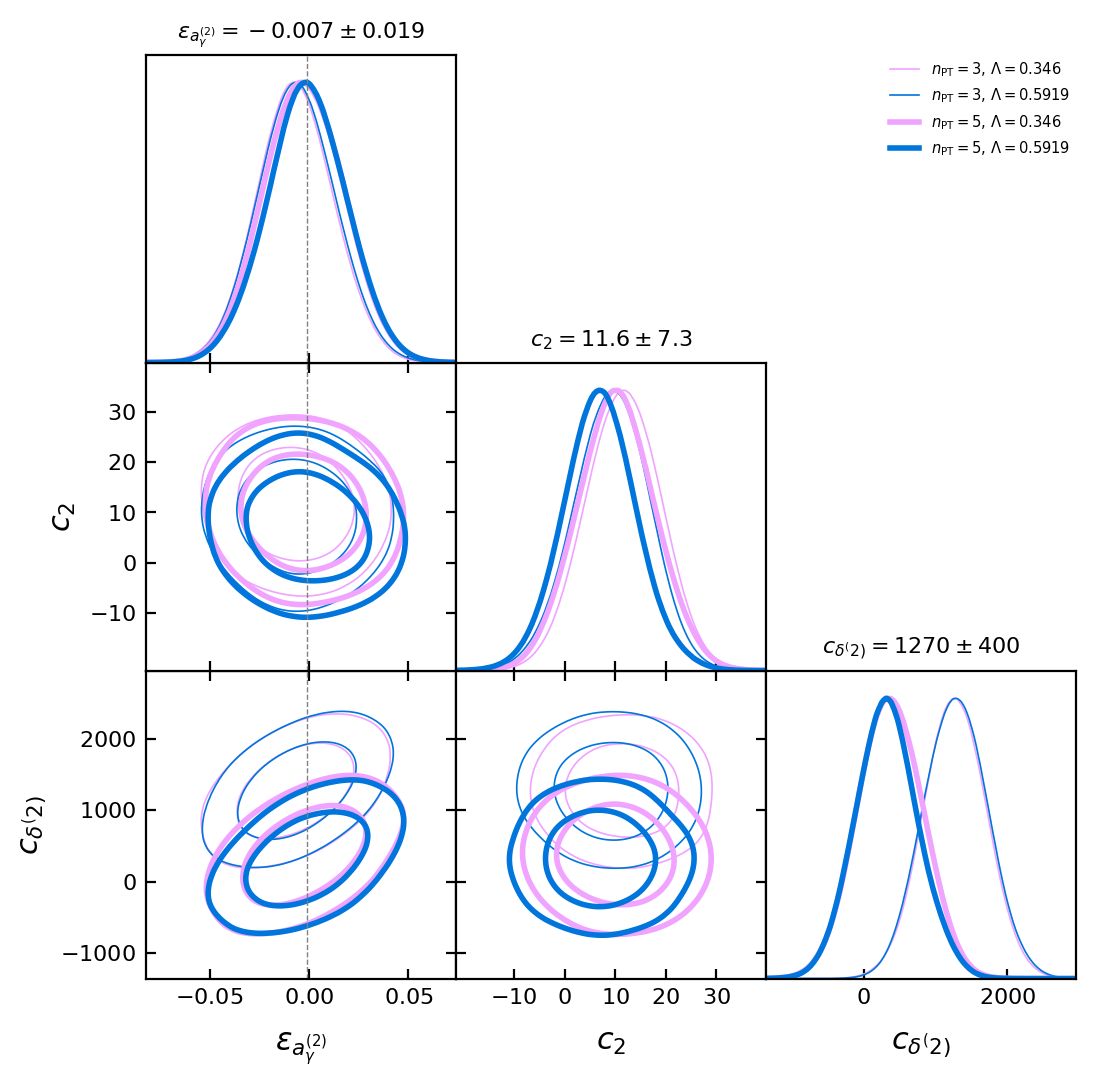

In [5]:
chain_plot_data = {
    "input_files": [],
    "roots": [],
    "legend_labels": [],
    "line_args": [], 
    "contour_args": [],
    **default_triangle_plot
}

for i, (Lambda, chain) in enumerate(zip(Lambdas1, chains1)):
    chain_plot_data["input_files"].append(f"{project_path}/{chain}/{get_input_file_from_chain(chain)}")
    chain_plot_data["roots"].append(loadMCSamples(f"{project_path}/{chain}/chain"))
    chain_plot_data["legend_labels"].append(rf"$n_\text{{PT}}=3$, $\Lambda={Lambda}$")
    chain_plot_data["line_args"].append({"color": colors[i]})
    chain_plot_data["contour_args"].append({"color": colors[i]})

for i, (Lambda, chain) in enumerate(zip(Lambdas2, chains2)):
    chain_plot_data["input_files"].append(f"{project_path}/{chain}/{get_input_file_from_chain(chain)}")
    chain_plot_data["roots"].append(loadMCSamples(f"{project_path}/{chain}/chain"))
    chain_plot_data["legend_labels"].append(rf"$n_\text{{PT}}=5$, $\Lambda={Lambda}$")
    chain_plot_data["line_args"].append({
        "color": colors[i],
        "lw": 2
    })
    chain_plot_data["contour_args"].append({
        "color": colors[i],
        "lw": 2
    })

chain_plot(**chain_plot_data)

# for linking
display(HTML("<div id=\"highder-cdelta2-kmax0.1\"></div>"))

### 1.10 only $c_{\delta^{(2)}}$ correction at $k_\text{max}=0.15$

In [6]:
# for linking
display(HTML("<div id=\"1.10\"></div>"))

# first find chains correponding to nPT=3 and sort them with Lambda
# then do the same with nPT=5

query = {
    "nPT": 3,
    "kmax": 0.15,
    "model": "high_der", # only consider chains ran with higher derivative model
    "run_1": 0, # fix c_phi terms to 0
    "run_2": 0
}
chains1 = browse_chains(
    query = query
)
Lambdas1, chains1 = sort_from_key(chains1, "Lambda") # sort list based on Lambda

query = {
    "nPT": 5,
    "kmax": 0.15,
    "model": "high_der", # only consider chains ran with higher derivative model
    "run_1": 0, # fix c_phi terms to 0
    "run_2": 0
}
chains2 = browse_chains(
    query = query
)
Lambdas2, chains2 = sort_from_key(chains2, "Lambda") # sort list based on Lambda

searching file 60 of 60
Search between the beginning of time and the end of time with the following query:
nPT: 3
kmax: 0.15
model: high_der
run_1: 0
run_2: 0
yielded the following files:

field-level-inference-GridSPT_output_202503081813
field-level-inference-GridSPT_output_202503081814
searching file 60 of 60
Search between the beginning of time and the end of time with the following query:
nPT: 5
kmax: 0.15
model: high_der
run_1: 0
run_2: 0
yielded the following files:

field-level-inference-GridSPT_output_202503081815
field-level-inference-GridSPT_output_202503081816


In [40]:
# create new files

query = {
    "kmax": 0.1,
    "model": "high_der",
    "run_1": 0,
    "run_2": 0
}
inputs = browse_inputs(
    query = query
)

parameters, new_inputs = [], []
for i, inp in enumerate(inputs):
    parameters.append(parse_yaml(f"{project_path}/{inp}"))

    t = time.gmtime(time.time()+3600+i*60)
    datestr = time.strftime("%Y%m%d%H%M", t)
    new_inputs.append(inp.replace(get_datestr(inp), datestr))

answers = []
for old, new, pars in zip(inputs, new_inputs, parameters):
    nested_set(pars, ["chain", "kmax"], 0.15)
    nested_set(
        pars,
        ["chain", "path"], 
        pars["chain"]["path"].replace(get_datestr(old), get_datestr(new))
    )
    print(f"Changing {old} to {new} as:")
    diff(parse_yaml(f"{project_path}/{old}"), pars)
    answers.append(input("continue? (y/n)"))
    
for answer, new, pars in zip(answers, new_inputs, parameters):
    if answer=="y":
        with open(f"{project_path}/{new}", "w") as f:
            yaml.dump(pars, f)
    else:
        print(f"{new} has not been written")

searching file 57 of 57
Search between the beginning of time and the end of time with the following query:
kmax: 0.1
model: high_der
run_1: 0
run_2: 0
yielded the following files:

field-level-inference-GridSPT_input_202503081805.yaml
field-level-inference-GridSPT_input_202503081806.yaml
field-level-inference-GridSPT_input_202503081807.yaml
field-level-inference-GridSPT_input_202503081808.yaml
Changing field-level-inference-GridSPT_input_202503081805.yaml to field-level-inference-GridSPT_input_202503081813.yaml as:

DEBUG: False
GIT: 3384d58
README: "This is the input file containing all the information about a single execution of the project 'field-level-inference-GridSPT'.""
""
"The file is structured as follows:"
""
"  - `gridspt_fields` contains all the information about the fields generated by GridSPT;"
"  - `nbody_field_input` contains all the information about the fields generated from an N-body simulation;"
"  - `nbody_field_output` contains all the information about the N-body

continue? (y/n) y


Changing field-level-inference-GridSPT_input_202503081806.yaml to field-level-inference-GridSPT_input_202503081814.yaml as:

DEBUG: False
GIT: 3384d58
README: "This is the input file containing all the information about a single execution of the project 'field-level-inference-GridSPT'.""
""
"The file is structured as follows:"
""
"  - `gridspt_fields` contains all the information about the fields generated by GridSPT;"
"  - `nbody_field_input` contains all the information about the fields generated from an N-body simulation;"
"  - `nbody_field_output` contains all the information about the N-body snapshot used to generate N-body fields;"
"  - `chain` contains all the information about the chains or optimizations to be run between N-body fields and GridSPT fields"
"  - `DEBUG` contains the flag to control debugging in the main code"
"  - `RESUME_CHAIN` contains the flag to control resuming of an unfinished chain"
"  - `GIT` contains the hash of the latest git commit that ran the input i

continue? (y/n) y


Changing field-level-inference-GridSPT_input_202503081807.yaml to field-level-inference-GridSPT_input_202503081815.yaml as:

DEBUG: False
GIT: 3384d58
README: "This is the input file containing all the information about a single execution of the project 'field-level-inference-GridSPT'.""
""
"The file is structured as follows:"
""
"  - `gridspt_fields` contains all the information about the fields generated by GridSPT;"
"  - `nbody_field_input` contains all the information about the fields generated from an N-body simulation;"
"  - `nbody_field_output` contains all the information about the N-body snapshot used to generate N-body fields;"
"  - `chain` contains all the information about the chains or optimizations to be run between N-body fields and GridSPT fields"
"  - `DEBUG` contains the flag to control debugging in the main code"
"  - `RESUME_CHAIN` contains the flag to control resuming of an unfinished chain"
"  - `GIT` contains the hash of the latest git commit that ran the input i

continue? (y/n) y


Changing field-level-inference-GridSPT_input_202503081808.yaml to field-level-inference-GridSPT_input_202503081816.yaml as:

DEBUG: False
GIT: 3384d58
README: "This is the input file containing all the information about a single execution of the project 'field-level-inference-GridSPT'.""
""
"The file is structured as follows:"
""
"  - `gridspt_fields` contains all the information about the fields generated by GridSPT;"
"  - `nbody_field_input` contains all the information about the fields generated from an N-body simulation;"
"  - `nbody_field_output` contains all the information about the N-body snapshot used to generate N-body fields;"
"  - `chain` contains all the information about the chains or optimizations to be run between N-body fields and GridSPT fields"
"  - `DEBUG` contains the flag to control debugging in the main code"
"  - `RESUME_CHAIN` contains the flag to control resuming of an unfinished chain"
"  - `GIT` contains the hash of the latest git commit that ran the input i

continue? (y/n) y


/hpc/home/matteo.peron/projects/field-level-inference-GridSPT/in_out/field-level-inference-GridSPT_output_202503081813/chain.txt
Removed no burn in
/hpc/home/matteo.peron/projects/field-level-inference-GridSPT/in_out/field-level-inference-GridSPT_output_202503081814/chain.txt
Removed no burn in
/hpc/home/matteo.peron/projects/field-level-inference-GridSPT/in_out/field-level-inference-GridSPT_output_202503081816/chain.txt
Removed no burn in
/hpc/home/matteo.peron/projects/field-level-inference-GridSPT/in_out/field-level-inference-GridSPT_output_202503081815/chain.txt
Removed no burn in


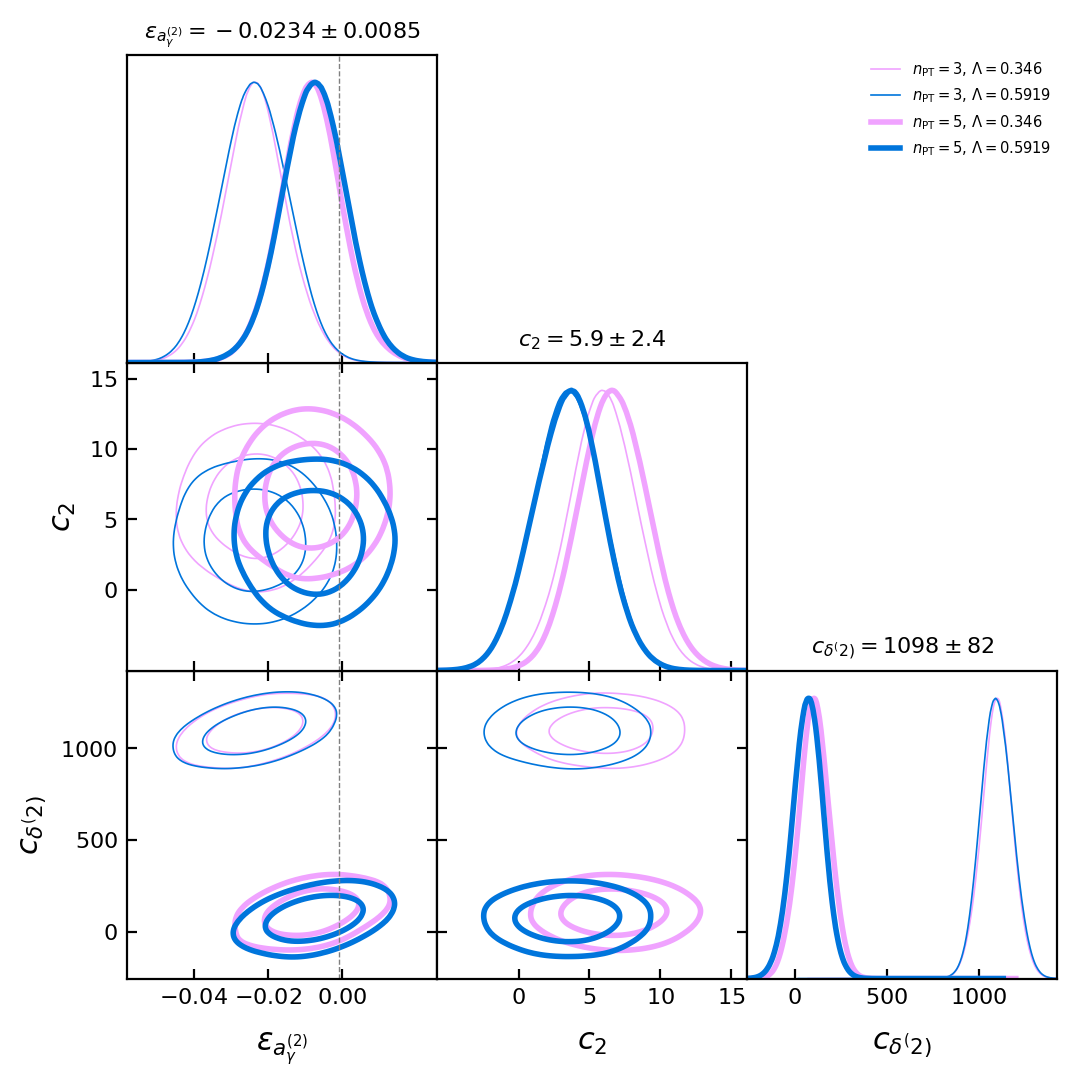

In [7]:
chain_plot_data = {
    "input_files": [],
    "roots": [],
    "legend_labels": [],
    "line_args": [], 
    "contour_args": [],
    **default_triangle_plot
}

for i, (Lambda, chain) in enumerate(zip(Lambdas1, chains1)):
    chain_plot_data["input_files"].append(f"{project_path}/{chain}/{get_input_file_from_chain(chain)}")
    chain_plot_data["roots"].append(loadMCSamples(f"{project_path}/{chain}/chain"))
    chain_plot_data["legend_labels"].append(rf"$n_\text{{PT}}=3$, $\Lambda={Lambda}$")
    chain_plot_data["line_args"].append({"color": colors[i]})
    chain_plot_data["contour_args"].append({"color": colors[i]})

for i, (Lambda, chain) in enumerate(zip(Lambdas2, chains2)):
    chain_plot_data["input_files"].append(f"{project_path}/{chain}/{get_input_file_from_chain(chain)}")
    chain_plot_data["roots"].append(loadMCSamples(f"{project_path}/{chain}/chain"))
    chain_plot_data["legend_labels"].append(rf"$n_\text{{PT}}=5$, $\Lambda={Lambda}$")
    chain_plot_data["line_args"].append({
        "color": colors[i],
        "lw": 2
    })
    chain_plot_data["contour_args"].append({
        "color": colors[i],
        "lw": 2
    })

chain_plot(**chain_plot_data)

# for linking
display(HTML("<div id=\"highder-cdelta2-kmax0.15\"></div>"))

### 1.11 EFT vs high derivative corrections at $k_\text{max}=0.1$

In [10]:
# for linking
display(HTML("<div id=\"1.11\"></div>"))

# compare only the lowest Lambda

query = {
    "Lambda": 0.346,
    "kmax": 0.1,
    "model": "high_der"
}

chains1 = browse_chains(
    stop = 202503072359,
    query = query
)
nPTs1, chains1 = sort_from_key(chains1, "nPT") # sort list based on nPT
query = {
    "Lambda": 0.346,
    "kmax": 0.1,
    "model": "high_der",
    "run_1": 0,
    "run_2": 0
}
chains2 = browse_chains(
    query = query
)
nPTs2, chains2 = sort_from_key(chains2, "nPT") # sort list based on nPT
query = {
    "Lambda": 0.346,
    "kmax": 0.1,
    "model": "EFT"
}
chains3 = browse_chains(
    query = query
)
nPTs3, chains3 = sort_from_key(chains3, "nPT") # sort list based on nPT

searching file 52 of 52
Search between the beginning of time and 202503072359 with the following query:
Lambda: 0.346
kmax: 0.1
model: high_der
yielded the following files:

field-level-inference-GridSPT_output_202503031801
field-level-inference-GridSPT_output_202503031804
searching file 60 of 60
Search between the beginning of time and the end of time with the following query:
Lambda: 0.346
kmax: 0.1
model: high_der
run_1: 0
run_2: 0
yielded the following files:

field-level-inference-GridSPT_output_202503081805
field-level-inference-GridSPT_output_202503081808
searching file 60 of 60
Search between the beginning of time and the end of time with the following query:
Lambda: 0.346
kmax: 0.1
model: EFT
yielded the following files:

field-level-inference-GridSPT_output_202503031156
field-level-inference-GridSPT_output_202503031703


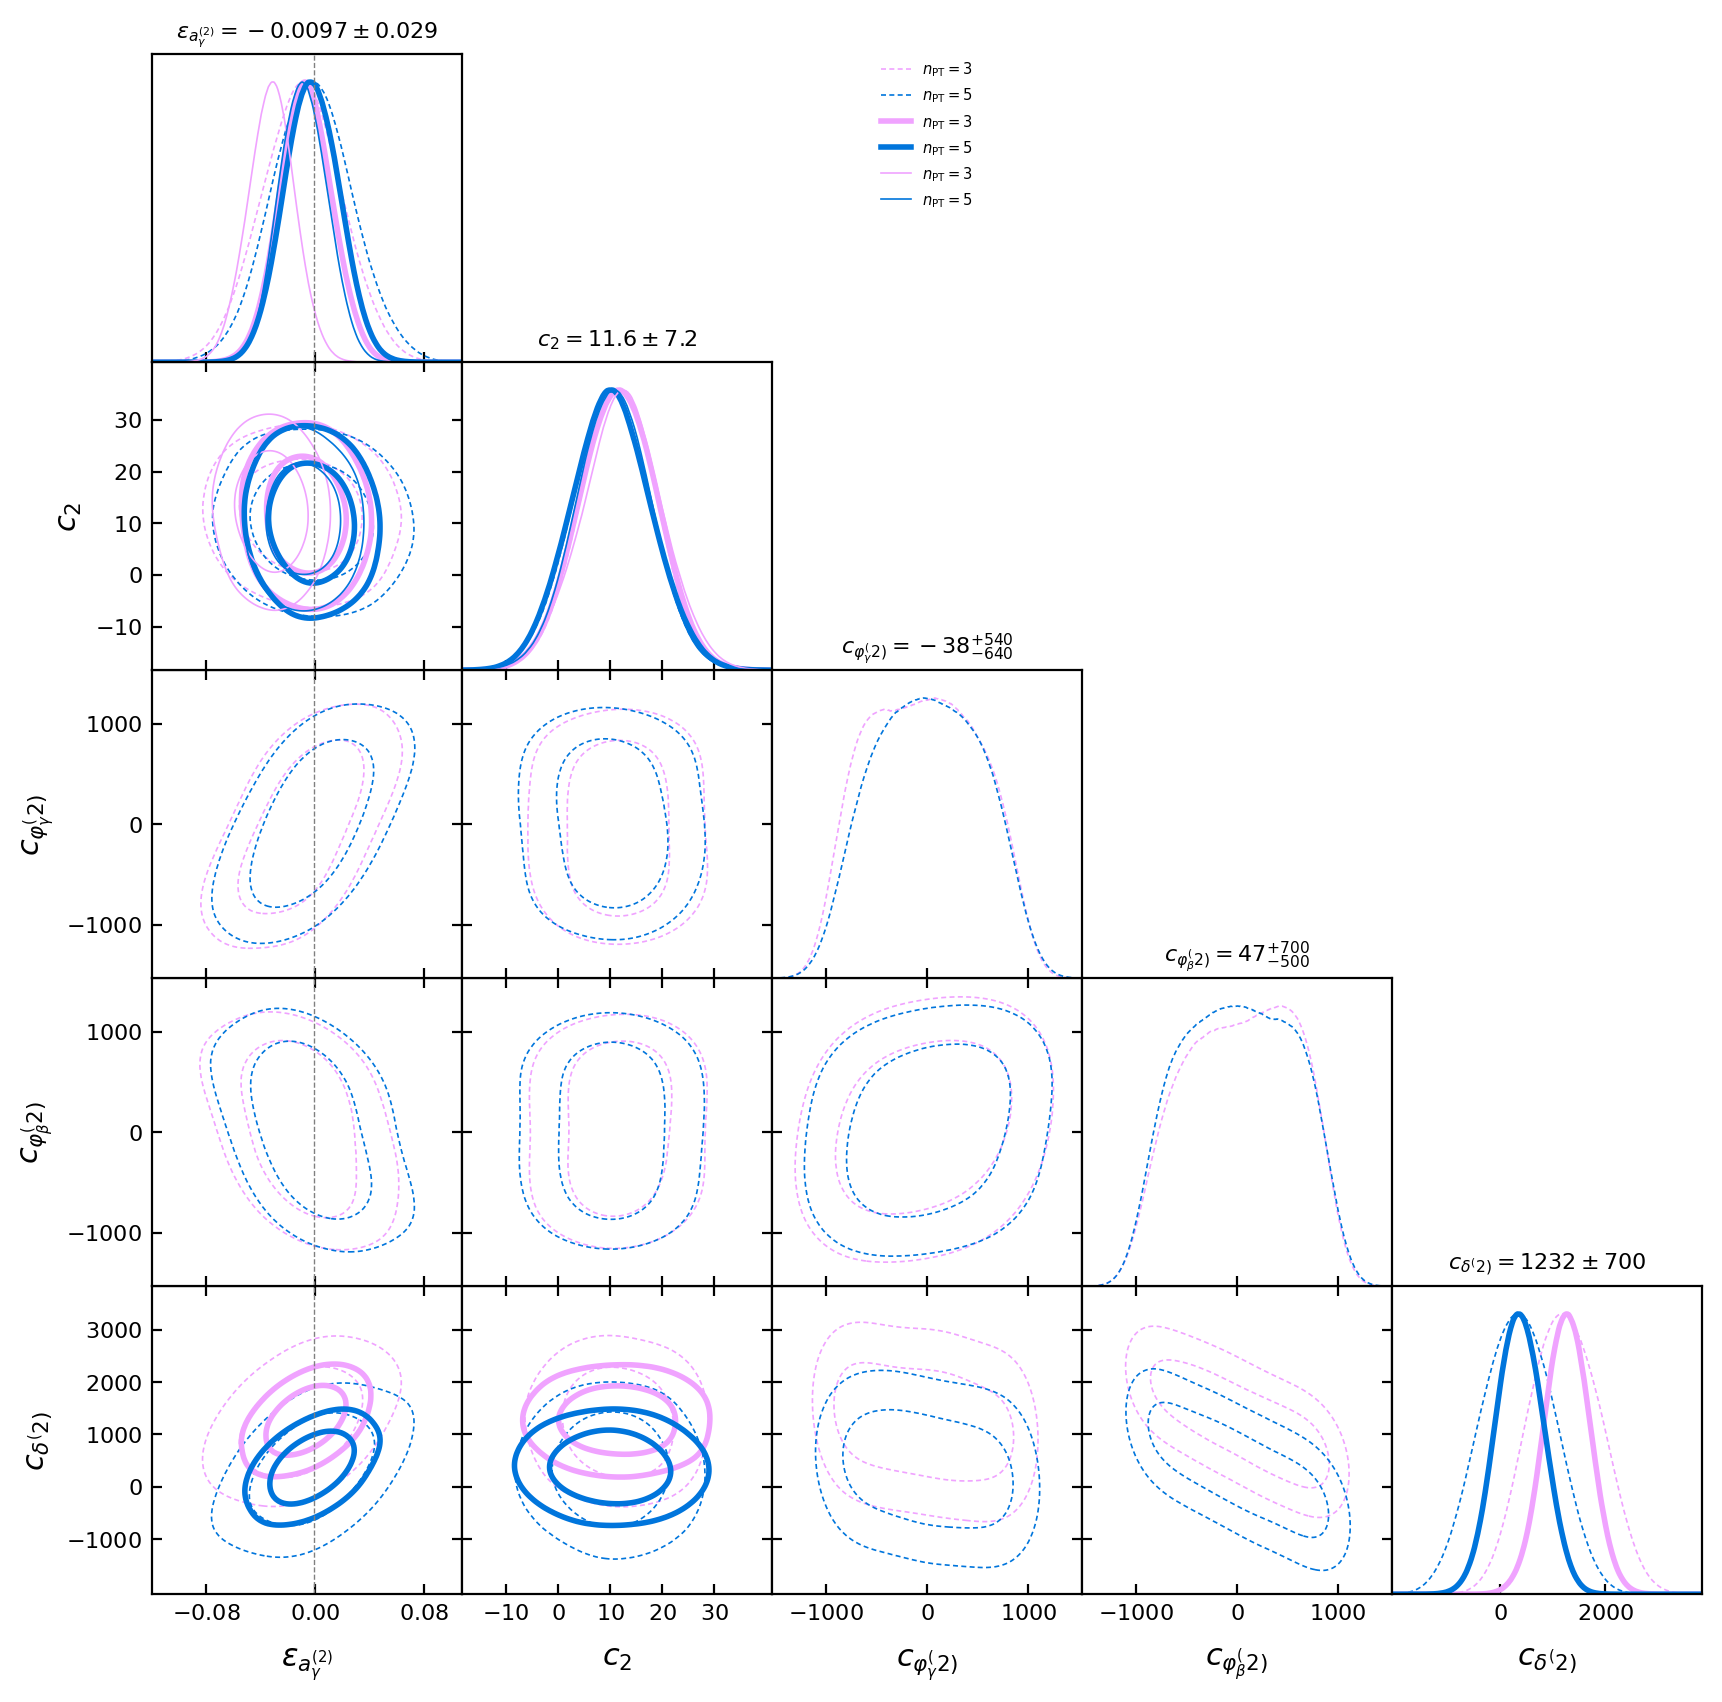

In [12]:
chain_plot_data = {
    "input_files": [],
    "roots": [],
    "legend_labels": [],
    "line_args": [], 
    "contour_args": [],
    **default_triangle_plot
}

for i, (nPT, chain) in enumerate(zip(nPTs1, chains1)):
    chain_plot_data["input_files"].append(f"{project_path}/{chain}/{get_input_file_from_chain(chain)}")
    chain_plot_data["roots"].append(loadMCSamples(f"{project_path}/{chain}/chain"))
    chain_plot_data["legend_labels"].append(rf"$n_\text{{PT}}={nPT}$")
    chain_plot_data["line_args"].append({
        "color": colors[i],
        "ls": "--"
    })
    chain_plot_data["contour_args"].append({
        "color": colors[i],
        "ls": "--"
    })

for i, (nPT, chain) in enumerate(zip(nPTs2, chains2)):
    chain_plot_data["input_files"].append(f"{project_path}/{chain}/{get_input_file_from_chain(chain)}")
    chain_plot_data["roots"].append(loadMCSamples(f"{project_path}/{chain}/chain"))
    chain_plot_data["legend_labels"].append(rf"$n_\text{{PT}}={nPT}$")
    chain_plot_data["line_args"].append({
        "color": colors[i],
        "lw": 2
    })
    chain_plot_data["contour_args"].append({
        "color": colors[i],
        "lw": 2
    })

for i, (nPT, chain) in enumerate(zip(nPTs3, chains3)):
    chain_plot_data["input_files"].append(f"{project_path}/{chain}/{get_input_file_from_chain(chain)}")
    chain_plot_data["roots"].append(loadMCSamples(f"{project_path}/{chain}/chain"))
    chain_plot_data["legend_labels"].append(rf"$n_\text{{PT}}={nPT}$")
    chain_plot_data["line_args"].append({"color": colors[i]})
    chain_plot_data["contour_args"].append({"color": colors[i]})

chain_plot(**chain_plot_data)

# for linking
display(HTML("<div id=\"highder-vs-EFT-kmax0.1\"></div>"))

#### 1.11.1 Actual effect of higher derivatives on $\varepsilon_{a_\gamma^{(2)}}$

In [14]:
# for linking
display(HTML("<div id=\"1.11.1\"></div>"))

# show best fit for different models, with and without conditioning

burnin = 0.3 # fraction to discard

print("All higher derivative terms")
print(f"{'nPT':>11} {'epsag2 (mean)':>14} {'epsag2 (16%)':>13} {'epsag2 (84%)':>13}")
for nPT, chain in zip(nPTs1, chain_plot_data["roots"][:2]):
    samples = chain.samples[:, 0]
    samples = samples[int(burnin*len(samples)):]
    
    print(f"{nPT:11} {np.mean(samples):14.6f} {np.quantile(samples, 0.16):13.6f} {np.quantile(samples, 0.84):13.6f}")

print("Only c_delta2")
print(f"{'nPT':>11} {'epsag2 (mean)':>14} {'epsag2 (16%)':>13} {'epsag2 (84%)':>13}")
for nPT, chain in zip(nPTs2, chain_plot_data["roots"][2:4]):
    samples = chain.samples[:, 0]
    samples = samples[int(burnin*len(samples)):]
    
    print(f"{nPT:11} {np.mean(samples):14.6f} {np.quantile(samples, 0.16):13.6f} {np.quantile(samples, 0.84):13.6f}")

print("EPT (no higher derivatives)")
print(f"{'nPT':>11} {'epsag2 (mean)':>14} {'epsag2 (16%)':>13} {'epsag2 (84%)':>13}")
for nPT, chain in zip(nPTs3, chain_plot_data["roots"][4:]):
    # get c_2 chain (index 1)
    samples = chain.samples[:, 0]
    samples = samples[int(burnin*len(samples)):]
    
    print(f"{nPT:11} {np.mean(samples):14.6f} {np.quantile(samples, 0.16):13.6f} {np.quantile(samples, 0.84):13.6f}")

All higher derivative terms
        nPT  epsag2 (mean)  epsag2 (16%)  epsag2 (84%)
          3      -0.009991     -0.044215      0.023913
          5      -0.001832     -0.036210      0.032828
Only c_delta2
        nPT  epsag2 (mean)  epsag2 (16%)  epsag2 (84%)
          3      -0.006820     -0.032503      0.019244
          5      -0.002710     -0.030481      0.024208
EPT (no higher derivatives)
        nPT  epsag2 (mean)  epsag2 (16%)  epsag2 (84%)
          3      -0.031806     -0.053162     -0.011193
          5      -0.009261     -0.031336      0.013963


### 1.12 Higher derivative terms at $k_\text{max}=0.15$

In [40]:
# for linking
display(HTML("<div id=\"1.12\"></div>"))

# activate also other higher derivative terms to see if accuracy improves at kmax=0.15

query = {
    "nPT": 3,
    "kmax": 0.15,
    "model": "high_der" # only consider chains ran with higher derivative model
}
chains1 = browse_chains(
    start = 202503082000,
    stop = 202503082359,
    query = query
)
Lambdas1, chains1 = sort_from_key(chains1, "Lambda") # sort list based on Lambda

query = {
    "nPT": 5,
    "kmax": 0.15,
    "model": "high_der" # only consider chains ran with higher derivative model
}
chains2 = browse_chains(
    start = 202503082000,
    stop = 202503082359,
    query = query
)
Lambdas2, chains2 = sort_from_key(chains2, "Lambda") # sort list based on Lambda

searching file 4 of 4
Search between 202503082000 and 202503082359 with the following query:
nPT: 3
kmax: 0.15
model: high_der
yielded the following files:

field-level-inference-GridSPT_output_202503082018
field-level-inference-GridSPT_output_202503082019
searching file 4 of 4
Search between 202503082000 and 202503082359 with the following query:
nPT: 5
kmax: 0.15
model: high_der
yielded the following files:

field-level-inference-GridSPT_output_202503082020
field-level-inference-GridSPT_output_202503082021


In [18]:
# create new files

query = {
    "kmax": 0.1,
    "model": "high_der",
}
inputs = browse_inputs(
    stop = 202503072359,
    query = query
)

parameters, new_inputs = [], []
for i, inp in enumerate(inputs):
    parameters.append(parse_yaml(f"{project_path}/{inp}"))

    t = time.gmtime(time.time()+3600+i*60)
    datestr = time.strftime("%Y%m%d%H%M", t)
    new_inputs.append(inp.replace(get_datestr(inp), datestr))

answers = []
for old, new, pars in zip(inputs, new_inputs, parameters):
    nested_set(pars, ["chain", "kmax"], 0.15)
    nested_set(
        pars,
        ["chain", "path"], 
        pars["chain"]["path"].replace(get_datestr(old), get_datestr(new))
    )
    print(f"Changing {old} to {new} as:")
    diff(parse_yaml(f"{project_path}/{old}"), pars)
    answers.append(input("continue? (y/n)"))
    
for answer, new, pars in zip(answers, new_inputs, parameters):
    if answer=="y":
        with open(f"{project_path}/{new}", "w") as f:
            yaml.dump(pars, f)
    else:
        print(f"{new} has not been written")

searching file 52 of 52
Search between the beginning of time and 202503072359 with the following query:
kmax: 0.1
model: high_der
yielded the following files:

field-level-inference-GridSPT_input_202503031801.yaml
field-level-inference-GridSPT_input_202503031802.yaml
field-level-inference-GridSPT_input_202503031803.yaml
field-level-inference-GridSPT_input_202503031804.yaml
Changing field-level-inference-GridSPT_input_202503031801.yaml to field-level-inference-GridSPT_input_202503082018.yaml as:

README: "This is the input file containing all the information about a single execution of the project 'field-level-inference-GridSPT'.""
""
"The file is structured as follows:"
""
"  - `gridspt_fields` contains all the information about the fields generated by GridSPT;"
"  - `nbody_field_input` contains all the information about the fields generated from an N-body simulation;"
"  - `nbody_field_output` contains all the information about the N-body snapshot used to generate N-body fields;"
"  -

continue? (y/n) y


Changing field-level-inference-GridSPT_input_202503031802.yaml to field-level-inference-GridSPT_input_202503082019.yaml as:

README: "This is the input file containing all the information about a single execution of the project 'field-level-inference-GridSPT'.""
""
"The file is structured as follows:"
""
"  - `gridspt_fields` contains all the information about the fields generated by GridSPT;"
"  - `nbody_field_input` contains all the information about the fields generated from an N-body simulation;"
"  - `nbody_field_output` contains all the information about the N-body snapshot used to generate N-body fields;"
"  - `chain` contains all the information about the chains or optimizations to be run between N-body fields and GridSPT fields"
"  - `DEBUG` contains the flag to control debugging in the main code"
"  - `RESUME_CHAIN` contains the flag to control resuming of an unfinished chain"
"  - `GIT` contains the hash of the latest git commit that ran the input into the code. useful to tr

continue? (y/n) y


Changing field-level-inference-GridSPT_input_202503031803.yaml to field-level-inference-GridSPT_input_202503082020.yaml as:

README: "This is the input file containing all the information about a single execution of the project 'field-level-inference-GridSPT'.""
""
"The file is structured as follows:"
""
"  - `gridspt_fields` contains all the information about the fields generated by GridSPT;"
"  - `nbody_field_input` contains all the information about the fields generated from an N-body simulation;"
"  - `nbody_field_output` contains all the information about the N-body snapshot used to generate N-body fields;"
"  - `chain` contains all the information about the chains or optimizations to be run between N-body fields and GridSPT fields"
"  - `DEBUG` contains the flag to control debugging in the main code"
"  - `RESUME_CHAIN` contains the flag to control resuming of an unfinished chain"
"  - `GIT` contains the hash of the latest git commit that ran the input into the code. useful to tr

continue? (y/n) y


Changing field-level-inference-GridSPT_input_202503031804.yaml to field-level-inference-GridSPT_input_202503082021.yaml as:

README: "This is the input file containing all the information about a single execution of the project 'field-level-inference-GridSPT'.""
""
"The file is structured as follows:"
""
"  - `gridspt_fields` contains all the information about the fields generated by GridSPT;"
"  - `nbody_field_input` contains all the information about the fields generated from an N-body simulation;"
"  - `nbody_field_output` contains all the information about the N-body snapshot used to generate N-body fields;"
"  - `chain` contains all the information about the chains or optimizations to be run between N-body fields and GridSPT fields"
"  - `DEBUG` contains the flag to control debugging in the main code"
"  - `RESUME_CHAIN` contains the flag to control resuming of an unfinished chain"
"  - `GIT` contains the hash of the latest git commit that ran the input into the code. useful to tr

continue? (y/n) y


/hpc/home/matteo.peron/projects/field-level-inference-GridSPT/in_out/field-level-inference-GridSPT_output_202503082018/chain.txt
Removed no burn in
/hpc/home/matteo.peron/projects/field-level-inference-GridSPT/in_out/field-level-inference-GridSPT_output_202503082019/chain.txt
Removed no burn in
/hpc/home/matteo.peron/projects/field-level-inference-GridSPT/in_out/field-level-inference-GridSPT_output_202503082021/chain.txt
Removed no burn in
/hpc/home/matteo.peron/projects/field-level-inference-GridSPT/in_out/field-level-inference-GridSPT_output_202503082020/chain.txt
Removed no burn in


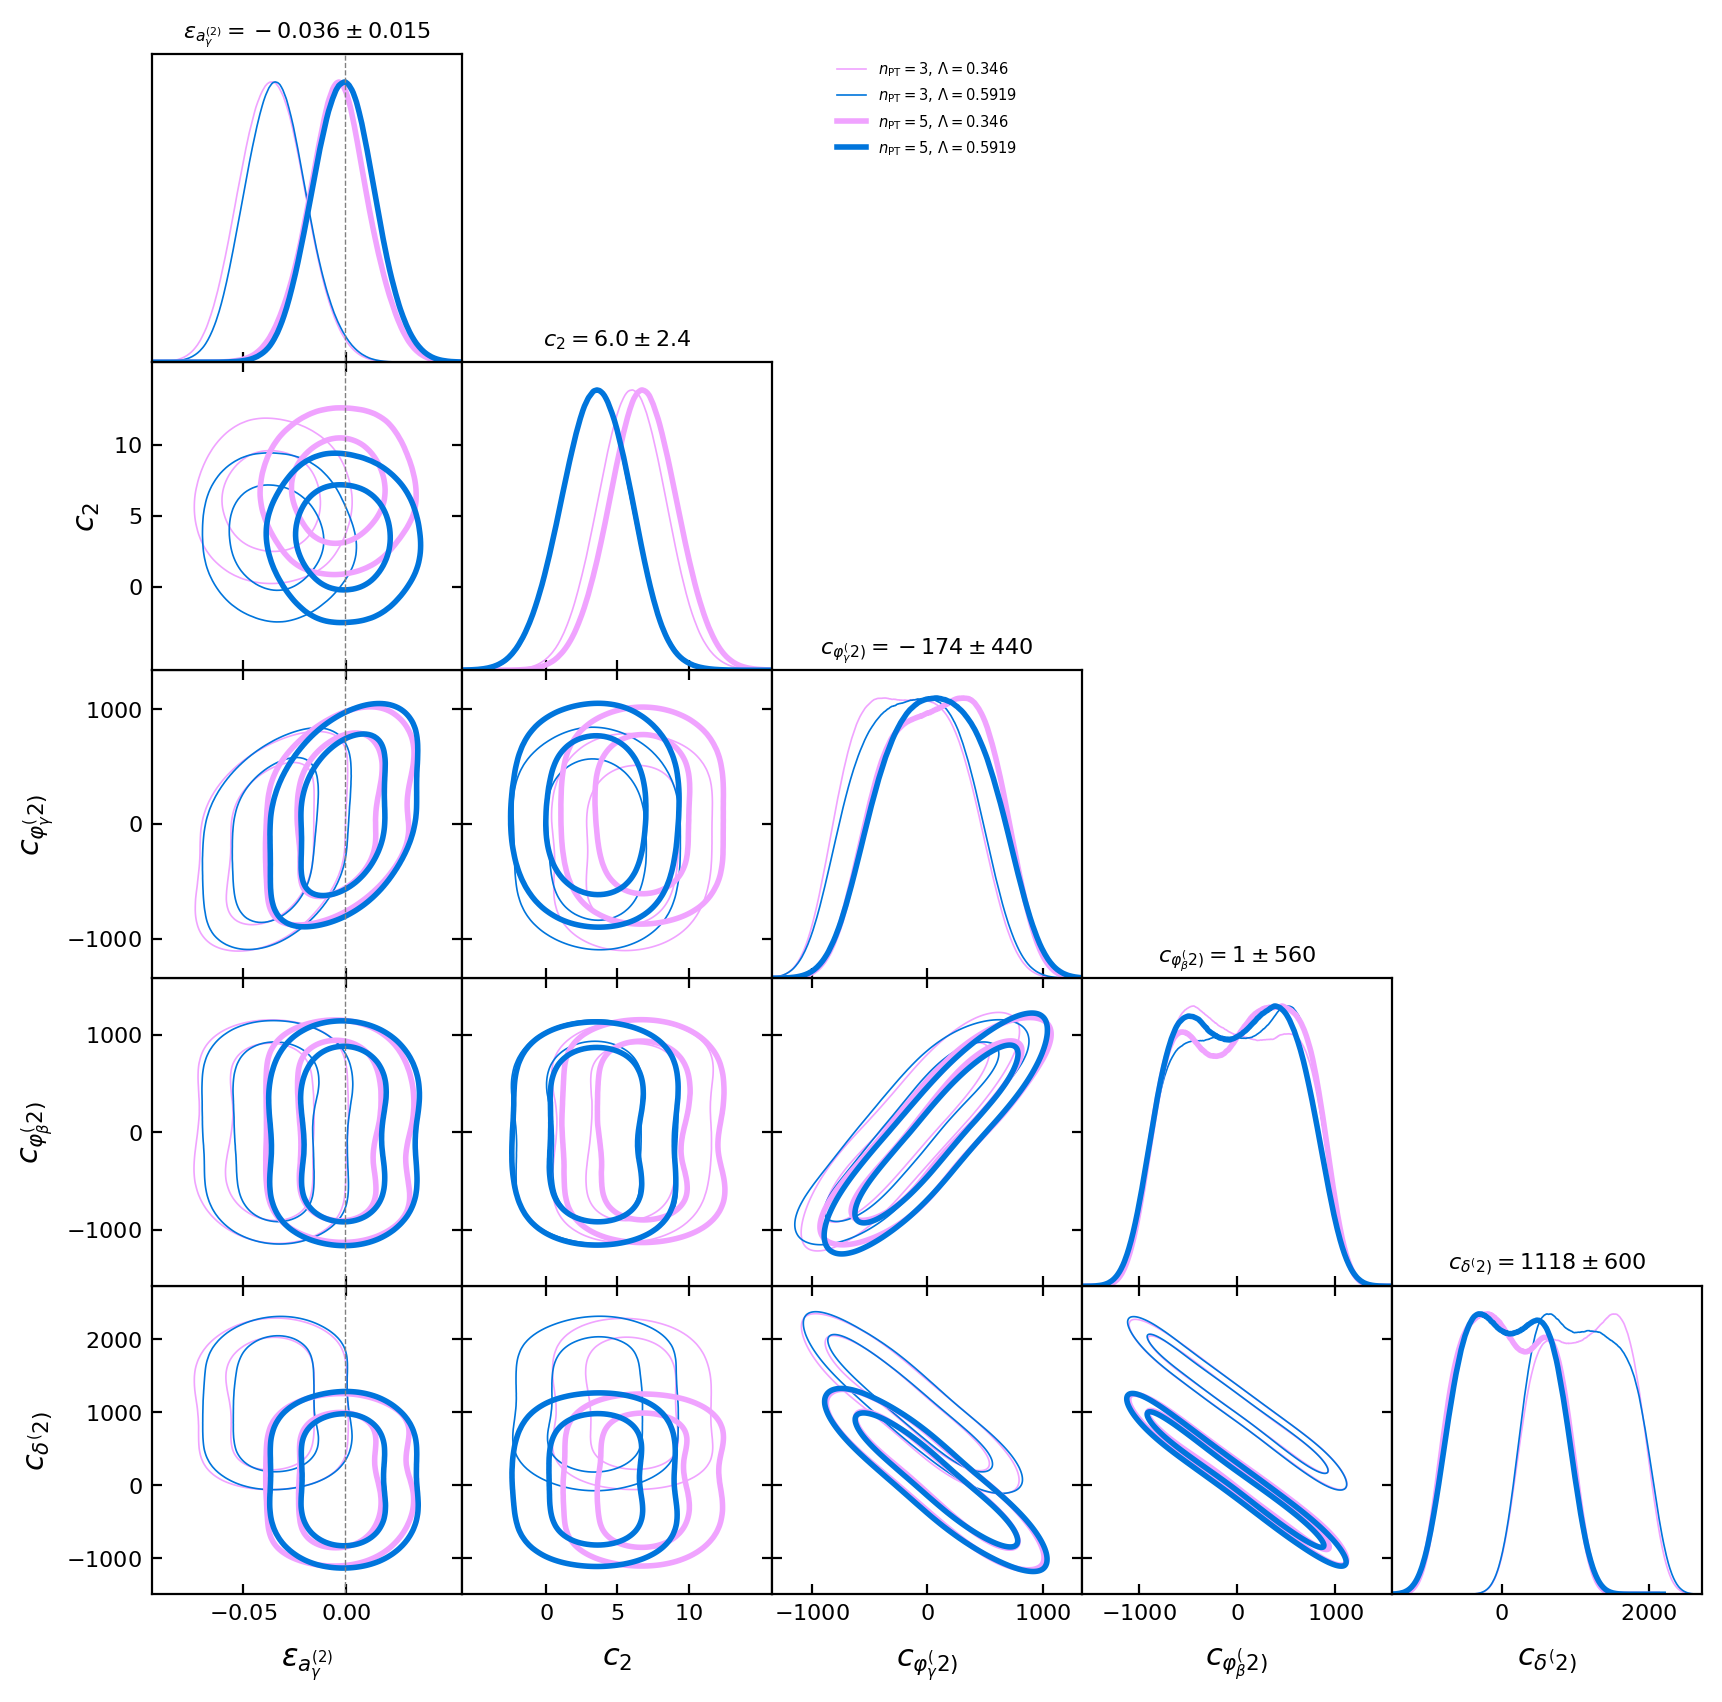

In [41]:
chain_plot_data = {
    "input_files": [],
    "roots": [],
    "legend_labels": [],
    "line_args": [], 
    "contour_args": [],
    **default_triangle_plot
}

for i, (Lambda, chain) in enumerate(zip(Lambdas1, chains1)):
    chain_plot_data["input_files"].append(f"{project_path}/{chain}/{get_input_file_from_chain(chain)}")
    chain_plot_data["roots"].append(loadMCSamples(f"{project_path}/{chain}/chain"))
    chain_plot_data["legend_labels"].append(rf"$n_\text{{PT}}=3$, $\Lambda={Lambda}$")
    chain_plot_data["line_args"].append({"color": colors[i]})
    chain_plot_data["contour_args"].append({"color": colors[i]})

for i, (Lambda, chain) in enumerate(zip(Lambdas2, chains2)):
    chain_plot_data["input_files"].append(f"{project_path}/{chain}/{get_input_file_from_chain(chain)}")
    chain_plot_data["roots"].append(loadMCSamples(f"{project_path}/{chain}/chain"))
    chain_plot_data["legend_labels"].append(rf"$n_\text{{PT}}=5$, $\Lambda={Lambda}$")
    chain_plot_data["line_args"].append({
        "color": colors[i],
        "lw": 2
    })
    chain_plot_data["contour_args"].append({
        "color": colors[i],
        "lw": 2
    })

chain_plot(**chain_plot_data)

# for linking
display(HTML("<div id=\"highder-kmax0.15\"></div>"))

### 1.13 only $c_{\varphi_\gamma^{(2)}}$ and $c_{\delta^{(2)}}$ correction at $k_\text{max}=0.15$

In [4]:
# for linking
display(HTML("<div id=\"1.13\"></div>"))

# activate also other higher derivative terms to see if accuracy improves at kmax=0.15

query = {
    "nPT": 3,
    "kmax": 0.15,
    "model": "high_der" # only consider chains ran with higher derivative model
}
chains1 = browse_chains(
    start = 202503090000,
    stop = 202503092359,
    query = query
)
Lambdas1, chains1 = sort_from_key(chains1, "Lambda") # sort list based on Lambda

query = {
    "nPT": 5,
    "kmax": 0.15,
    "model": "high_der" # only consider chains ran with higher derivative model
}
chains2 = browse_chains(
    start = 202503090000,
    stop = 202503092359,
    query = query
)
Lambdas2, chains2 = sort_from_key(chains2, "Lambda") # sort list based on Lambda

searching file 4 of 4
Search between 202503090000 and 202503092359 with the following query:
nPT: 3
kmax: 0.15
model: high_der
yielded the following files:

field-level-inference-GridSPT_output_202503091432
field-level-inference-GridSPT_output_202503091433
searching file 4 of 4
Search between 202503090000 and 202503092359 with the following query:
nPT: 5
kmax: 0.15
model: high_der
yielded the following files:

field-level-inference-GridSPT_output_202503091434
field-level-inference-GridSPT_output_202503091435


In [5]:
# create new files

query = {
    "kmax": 0.15,
    "model": "high_der",
}
inputs = browse_inputs(
    start = 202503082000,
    stop = 202503082359,
    query = query
)

parameters, new_inputs = [], []
for i, inp in enumerate(inputs):
    parameters.append(parse_yaml(f"{project_path}/{inp}"))

    t = time.gmtime(time.time()+3600+i*60)
    datestr = time.strftime("%Y%m%d%H%M", t)
    new_inputs.append(inp.replace(get_datestr(inp), datestr))

answers = []
for old, new, pars in zip(inputs, new_inputs, parameters):
    nested_set(pars, ["gridspt_fields", "run_2"], 0)
    nested_set(pars, ["chain", "prior", 2, "bound"], [-5000, 5000]) # increase prior range on c_phigamma2
    tmp = nested_get(pars, ["chain", "prior", 4])
    nested_del(pars, ["chain", "prior", 4])
    nested_set(pars, ["chain", "prior", 3], tmp)
    nested_set(
        pars,
        ["chain", "path"], 
        pars["chain"]["path"].replace(get_datestr(old), get_datestr(new))
    )
    print(f"Changing {old} to {new} as:")
    diff(parse_yaml(f"{project_path}/{old}"), pars)
    answers.append(input("continue? (y/n)"))
    
for answer, new, pars in zip(answers, new_inputs, parameters):
    if answer=="y":
        with open(f"{project_path}/{new}", "w") as f:
            yaml.dump(pars, f)
    else:
        print(f"{new} has not been written")

searching file 4 of 4
Search between 202503082000 and 202503082359 with the following query:
kmax: 0.15
model: high_der
yielded the following files:

field-level-inference-GridSPT_input_202503082018.yaml
field-level-inference-GridSPT_input_202503082019.yaml
field-level-inference-GridSPT_input_202503082020.yaml
field-level-inference-GridSPT_input_202503082021.yaml
Changing field-level-inference-GridSPT_input_202503082018.yaml to field-level-inference-GridSPT_input_202503091432.yaml as:

DEBUG: False
README: "This is the input file containing all the information about a single execution of the project 'field-level-inference-GridSPT'.""
""
"The file is structured as follows:"
""
"  - `gridspt_fields` contains all the information about the fields generated by GridSPT;"
"  - `nbody_field_input` contains all the information about the fields generated from an N-body simulation;"
"  - `nbody_field_output` contains all the information about the N-body snapshot used to generate N-body fields;"
"

continue? (y/n) y


Changing field-level-inference-GridSPT_input_202503082019.yaml to field-level-inference-GridSPT_input_202503091433.yaml as:

DEBUG: False
README: "This is the input file containing all the information about a single execution of the project 'field-level-inference-GridSPT'.""
""
"The file is structured as follows:"
""
"  - `gridspt_fields` contains all the information about the fields generated by GridSPT;"
"  - `nbody_field_input` contains all the information about the fields generated from an N-body simulation;"
"  - `nbody_field_output` contains all the information about the N-body snapshot used to generate N-body fields;"
"  - `chain` contains all the information about the chains or optimizations to be run between N-body fields and GridSPT fields"
"  - `DEBUG` contains the flag to control debugging in the main code"
"  - `RESUME_CHAIN` contains the flag to control resuming of an unfinished chain"
"  - `GIT` contains the hash of the latest git commit that ran the input into the code.

continue? (y/n) y


Changing field-level-inference-GridSPT_input_202503082020.yaml to field-level-inference-GridSPT_input_202503091434.yaml as:

DEBUG: False
README: "This is the input file containing all the information about a single execution of the project 'field-level-inference-GridSPT'.""
""
"The file is structured as follows:"
""
"  - `gridspt_fields` contains all the information about the fields generated by GridSPT;"
"  - `nbody_field_input` contains all the information about the fields generated from an N-body simulation;"
"  - `nbody_field_output` contains all the information about the N-body snapshot used to generate N-body fields;"
"  - `chain` contains all the information about the chains or optimizations to be run between N-body fields and GridSPT fields"
"  - `DEBUG` contains the flag to control debugging in the main code"
"  - `RESUME_CHAIN` contains the flag to control resuming of an unfinished chain"
"  - `GIT` contains the hash of the latest git commit that ran the input into the code.

continue? (y/n) y


Changing field-level-inference-GridSPT_input_202503082021.yaml to field-level-inference-GridSPT_input_202503091435.yaml as:

DEBUG: False
README: "This is the input file containing all the information about a single execution of the project 'field-level-inference-GridSPT'.""
""
"The file is structured as follows:"
""
"  - `gridspt_fields` contains all the information about the fields generated by GridSPT;"
"  - `nbody_field_input` contains all the information about the fields generated from an N-body simulation;"
"  - `nbody_field_output` contains all the information about the N-body snapshot used to generate N-body fields;"
"  - `chain` contains all the information about the chains or optimizations to be run between N-body fields and GridSPT fields"
"  - `DEBUG` contains the flag to control debugging in the main code"
"  - `RESUME_CHAIN` contains the flag to control resuming of an unfinished chain"
"  - `GIT` contains the hash of the latest git commit that ran the input into the code.

continue? (y/n) y


/hpc/home/matteo.peron/projects/field-level-inference-GridSPT/in_out/field-level-inference-GridSPT_output_202503091432/chain.txt
Removed no burn in
/hpc/home/matteo.peron/projects/field-level-inference-GridSPT/in_out/field-level-inference-GridSPT_output_202503091433/chain.txt
Removed no burn in
/hpc/home/matteo.peron/projects/field-level-inference-GridSPT/in_out/field-level-inference-GridSPT_output_202503091435/chain.txt
Removed no burn in
/hpc/home/matteo.peron/projects/field-level-inference-GridSPT/in_out/field-level-inference-GridSPT_output_202503091434/chain.txt
Removed no burn in


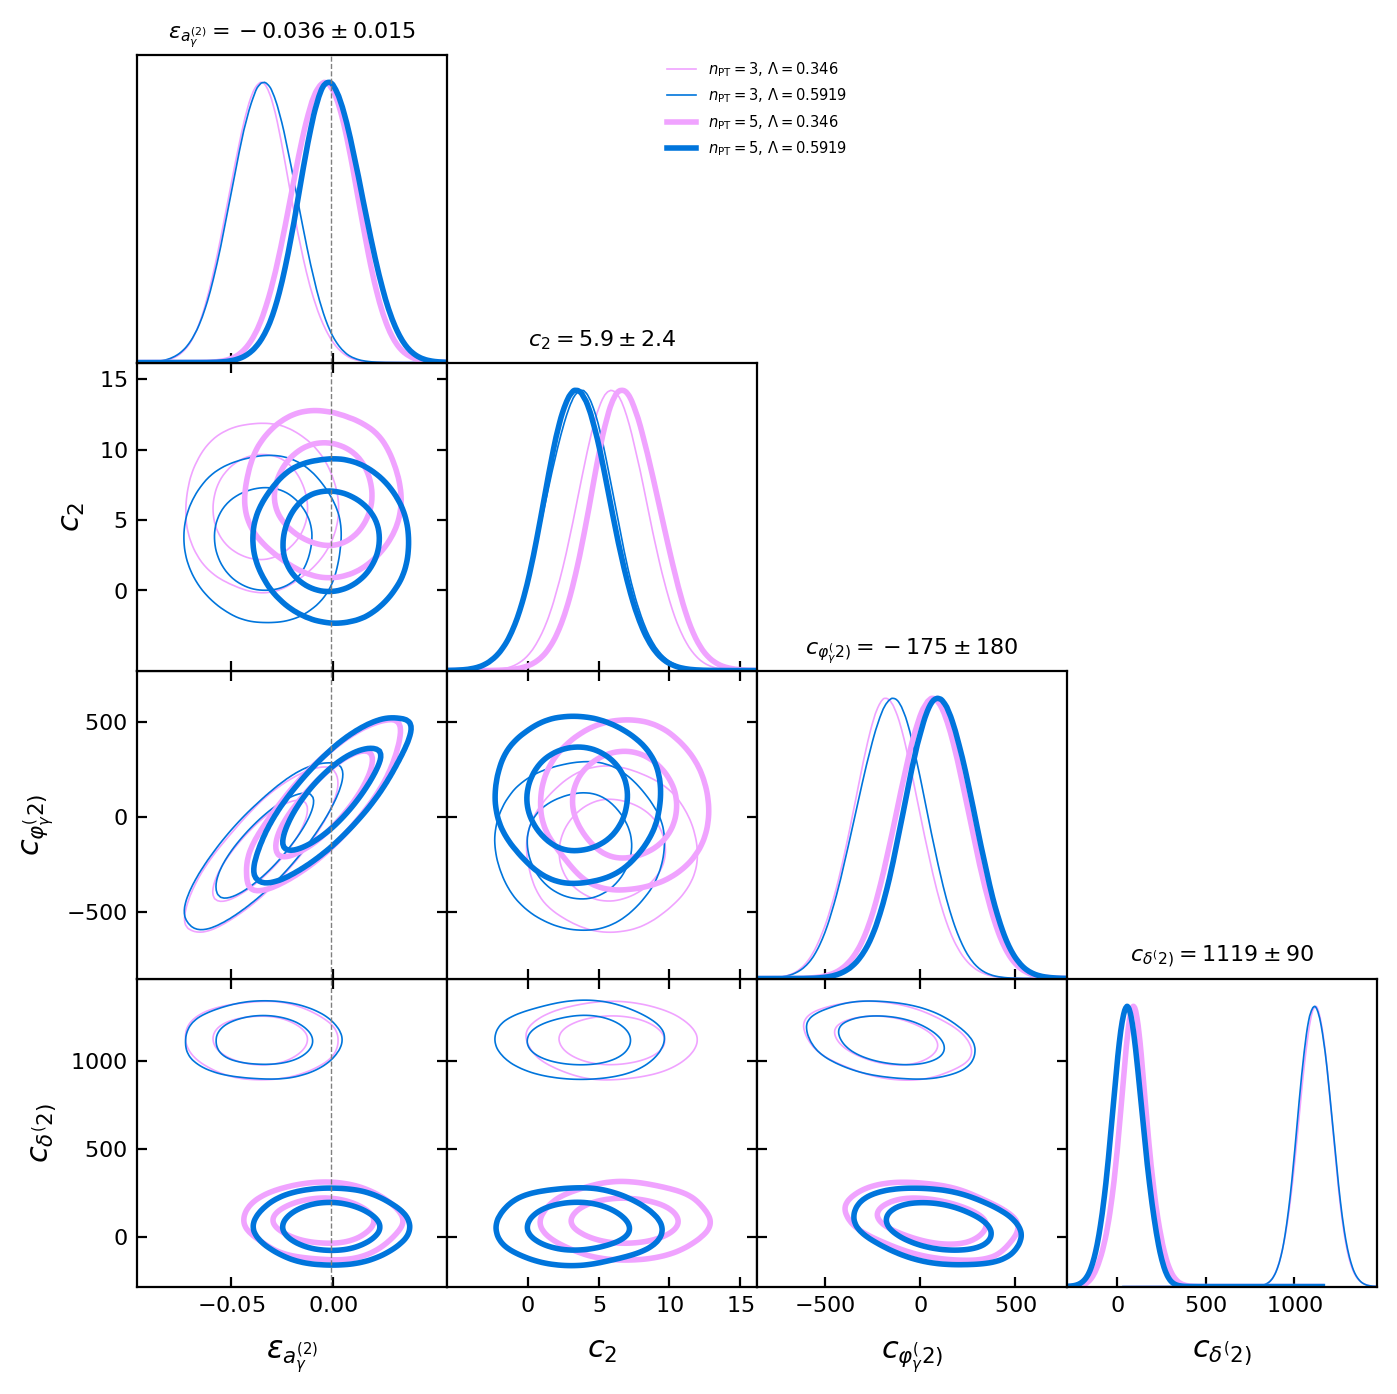

In [5]:
chain_plot_data = {
    "input_files": [],
    "roots": [],
    "legend_labels": [],
    "line_args": [], 
    "contour_args": [],
    **default_triangle_plot
}

for i, (Lambda, chain) in enumerate(zip(Lambdas1, chains1)):
    chain_plot_data["input_files"].append(f"{project_path}/{chain}/{get_input_file_from_chain(chain)}")
    chain_plot_data["roots"].append(loadMCSamples(f"{project_path}/{chain}/chain"))
    chain_plot_data["legend_labels"].append(rf"$n_\text{{PT}}=3$, $\Lambda={Lambda}$")
    chain_plot_data["line_args"].append({"color": colors[i]})
    chain_plot_data["contour_args"].append({"color": colors[i]})

for i, (Lambda, chain) in enumerate(zip(Lambdas2, chains2)):
    chain_plot_data["input_files"].append(f"{project_path}/{chain}/{get_input_file_from_chain(chain)}")
    chain_plot_data["roots"].append(loadMCSamples(f"{project_path}/{chain}/chain"))
    chain_plot_data["legend_labels"].append(rf"$n_\text{{PT}}=5$, $\Lambda={Lambda}$")
    chain_plot_data["line_args"].append({
        "color": colors[i],
        "lw": 2
    })
    chain_plot_data["contour_args"].append({
        "color": colors[i],
        "lw": 2
    })

chain_plot(**chain_plot_data)

# for linking
display(HTML("<div id=\"highder-cphigamma2-cdelta2-kmax0.15\"></div>"))

### 1.14 only $c_{\varphi_\gamma^{(2)}}$ correction at $k_\text{max}=0.15$

In [7]:
# for linking
display(HTML("<div id=\"1.14\"></div>"))

# activate also other higher derivative terms to see if accuracy improves at kmax=0.15

query = {
    "nPT": 3,
    "kmax": 0.15,
    "model": "high_der" # only consider chains ran with higher derivative model
}
chains1 = browse_chains(
    start = 202503100000,
    stop = 202503102359,
    query = query
)
Lambdas1, chains1 = sort_from_key(chains1, "Lambda") # sort list based on Lambda

query = {
    "nPT": 5,
    "kmax": 0.15,
    "model": "high_der" # only consider chains ran with higher derivative model
}
chains2 = browse_chains(
    start = 202503100000,
    stop = 202503102359,
    query = query
)
Lambdas2, chains2 = sort_from_key(chains2, "Lambda") # sort list based on Lambda

searching file 4 of 4
Search between 202503100000 and 202503102359 with the following query:
nPT: 3
kmax: 0.15
model: high_der
yielded the following files:

field-level-inference-GridSPT_output_202503100938
field-level-inference-GridSPT_output_202503100939
searching file 4 of 4
Search between 202503100000 and 202503102359 with the following query:
nPT: 5
kmax: 0.15
model: high_der
yielded the following files:

field-level-inference-GridSPT_output_202503100940
field-level-inference-GridSPT_output_202503100941


In [6]:
# create new files

query = {
    "kmax": 0.15,
    "model": "high_der",
}
inputs = browse_inputs(
    start = 202503082000,
    stop = 202503082359,
    query = query
)

parameters, new_inputs = [], []
for i, inp in enumerate(inputs):
    parameters.append(parse_yaml(f"{project_path}/{inp}"))

    t = time.gmtime(time.time()+3600+i*60)
    datestr = time.strftime("%Y%m%d%H%M", t)
    new_inputs.append(inp.replace(get_datestr(inp), datestr))

answers = []
for old, new, pars in zip(inputs, new_inputs, parameters):
    nested_set(pars, ["gridspt_fields", "run_2"], 0)
    nested_set(pars, ["gridspt_fields", "run_3"], 0)
    nested_set(pars, ["chain", "prior", 2, "bound"], [-5000, 5000]) # increase prior range on c_phigamma2
    nested_del(pars, ["chain", "prior", 3])
    nested_del(pars, ["chain", "prior", 4])
    nested_set(
        pars,
        ["chain", "path"], 
        pars["chain"]["path"].replace(get_datestr(old), get_datestr(new))
    )
    print(f"Changing {old} to {new} as:")
    diff(parse_yaml(f"{project_path}/{old}"), pars)
    answers.append(input("continue? (y/n)"))
    
for answer, new, pars in zip(answers, new_inputs, parameters):
    if answer=="y":
        with open(f"{project_path}/{new}", "w") as f:
            yaml.dump(pars, f)
    else:
        print(f"{new} has not been written")

searching file 4 of 4
Search between 202503082000 and 202503082359 with the following query:
kmax: 0.15
model: high_der
yielded the following files:

field-level-inference-GridSPT_input_202503082018.yaml
field-level-inference-GridSPT_input_202503082019.yaml
field-level-inference-GridSPT_input_202503082020.yaml
field-level-inference-GridSPT_input_202503082021.yaml
Changing field-level-inference-GridSPT_input_202503082018.yaml to field-level-inference-GridSPT_input_202503100938.yaml as:

DEBUG: False
README: "This is the input file containing all the information about a single execution of the project 'field-level-inference-GridSPT'.""
""
"The file is structured as follows:"
""
"  - `gridspt_fields` contains all the information about the fields generated by GridSPT;"
"  - `nbody_field_input` contains all the information about the fields generated from an N-body simulation;"
"  - `nbody_field_output` contains all the information about the N-body snapshot used to generate N-body fields;"
"

/hpc/home/matteo.peron/projects/field-level-inference-GridSPT/in_out/field-level-inference-GridSPT_output_202503100938/chain.txt
Removed no burn in
/hpc/home/matteo.peron/projects/field-level-inference-GridSPT/in_out/field-level-inference-GridSPT_output_202503100939/chain.txt
Removed no burn in
/hpc/home/matteo.peron/projects/field-level-inference-GridSPT/in_out/field-level-inference-GridSPT_output_202503100941/chain.txt
Removed no burn in
/hpc/home/matteo.peron/projects/field-level-inference-GridSPT/in_out/field-level-inference-GridSPT_output_202503100940/chain.txt
Removed no burn in


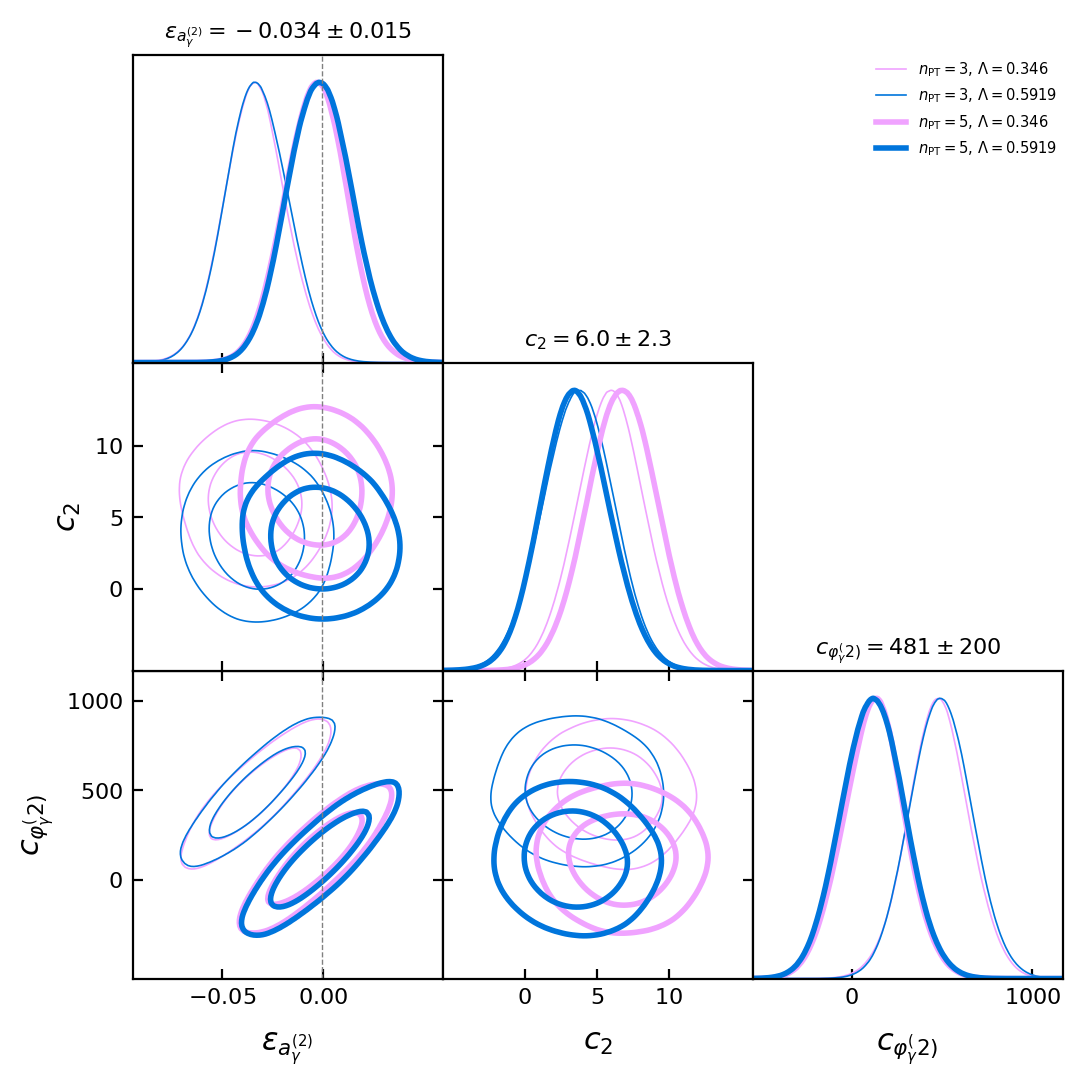

In [8]:
chain_plot_data = {
    "input_files": [],
    "roots": [],
    "legend_labels": [],
    "line_args": [], 
    "contour_args": [],
    **default_triangle_plot
}

for i, (Lambda, chain) in enumerate(zip(Lambdas1, chains1)):
    chain_plot_data["input_files"].append(f"{project_path}/{chain}/{get_input_file_from_chain(chain)}")
    chain_plot_data["roots"].append(loadMCSamples(f"{project_path}/{chain}/chain"))
    chain_plot_data["legend_labels"].append(rf"$n_\text{{PT}}=3$, $\Lambda={Lambda}$")
    chain_plot_data["line_args"].append({"color": colors[i]})
    chain_plot_data["contour_args"].append({"color": colors[i]})

for i, (Lambda, chain) in enumerate(zip(Lambdas2, chains2)):
    chain_plot_data["input_files"].append(f"{project_path}/{chain}/{get_input_file_from_chain(chain)}")
    chain_plot_data["roots"].append(loadMCSamples(f"{project_path}/{chain}/chain"))
    chain_plot_data["legend_labels"].append(rf"$n_\text{{PT}}=5$, $\Lambda={Lambda}$")
    chain_plot_data["line_args"].append({
        "color": colors[i],
        "lw": 2
    })
    chain_plot_data["contour_args"].append({
        "color": colors[i],
        "lw": 2
    })

chain_plot(**chain_plot_data)

# for linking
display(HTML("<div id=\"highder-cphigamma2-kmax0.15\"></div>"))

### 1.15 EFT vs high derivative corrections at $k_\text{max}=0.15$

In [6]:
# for linking
display(HTML("<div id=\"1.15\"></div>"))

# compare only the lowest Lambda

query = {
    "Lambda": 0.346,
    "kmax": 0.15,
    "model": "high_der"
}

chains1 = browse_chains(
    start = 202503082000,
    stop = 202503082359,
    query = query
)
nPTs1, chains1 = sort_from_key(chains1, "nPT") # sort list based on nPT
query = {
    "Lambda": 0.346,
    "kmax": 0.15,
    "model": "high_der",
    "run_1": 0,
    "run_2": 0
}
chains2 = browse_chains(
    query = query
)
nPTs2, chains2 = sort_from_key(chains2, "nPT") # sort list based on nPT
query = {
    "Lambda": 0.346,
    "kmax": 0.15,
    "model": "EFT"
}
chains3 = browse_chains(
    query = query
)
nPTs3, chains3 = sort_from_key(chains3, "nPT") # sort list based on nPT

searching file 4 of 4
Search between 202503082000 and 202503082359 with the following query:
Lambda: 0.346
kmax: 0.15
model: high_der
yielded the following files:

field-level-inference-GridSPT_output_202503082018
field-level-inference-GridSPT_output_202503082021
searching file 72 of 72
Search between the beginning of time and the end of time with the following query:
Lambda: 0.346
kmax: 0.15
model: high_der
run_1: 0
run_2: 0
yielded the following files:

field-level-inference-GridSPT_output_202503081813
field-level-inference-GridSPT_output_202503081816
searching file 72 of 72
Search between the beginning of time and the end of time with the following query:
Lambda: 0.346
kmax: 0.15
model: EFT
yielded the following files:

field-level-inference-GridSPT_output_202503071737
field-level-inference-GridSPT_output_202503071756


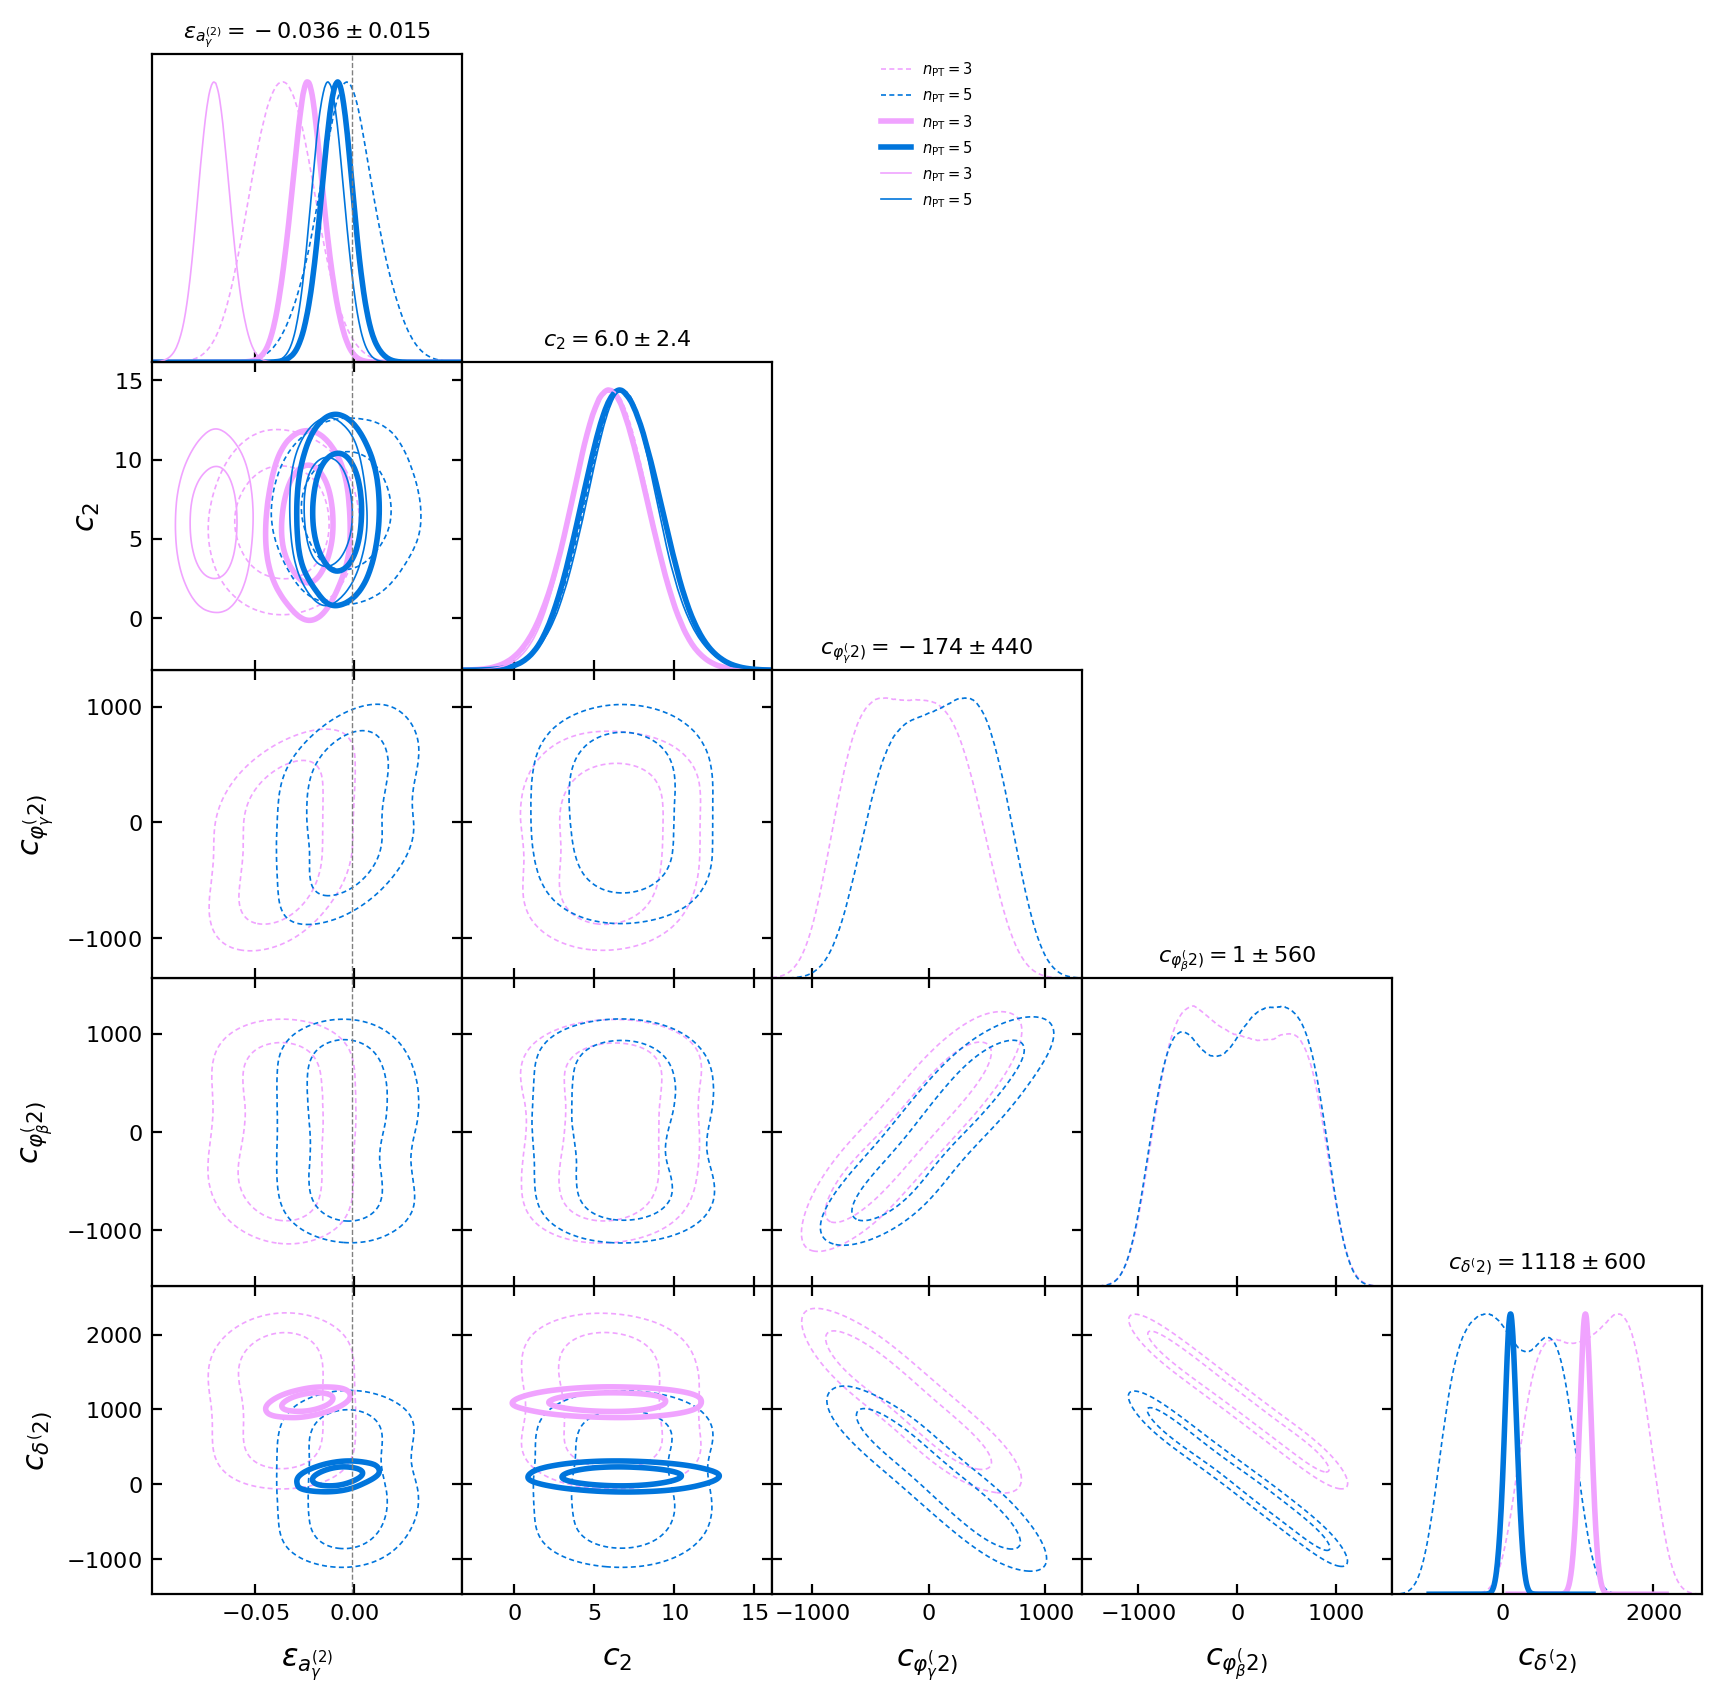

In [16]:
chain_plot_data1 = {
    "input_files": [],
    "roots": [],
    "legend_labels": [],
    "line_args": [], 
    "contour_args": [],
    **default_triangle_plot
}

for i, (nPT, chain) in enumerate(zip(nPTs1, chains1)):
    chain_plot_data1["input_files"].append(f"{project_path}/{chain}/{get_input_file_from_chain(chain)}")
    chain_plot_data1["roots"].append(loadMCSamples(f"{project_path}/{chain}/chain"))
    chain_plot_data1["legend_labels"].append(rf"$n_\text{{PT}}={nPT}$")
    chain_plot_data1["line_args"].append({
        "color": colors[i],
        "ls": "--"
    })
    chain_plot_data1["contour_args"].append({
        "color": colors[i],
        "ls": "--"
    })

for i, (nPT, chain) in enumerate(zip(nPTs2, chains2)):
    chain_plot_data1["input_files"].append(f"{project_path}/{chain}/{get_input_file_from_chain(chain)}")
    chain_plot_data1["roots"].append(loadMCSamples(f"{project_path}/{chain}/chain"))
    chain_plot_data1["legend_labels"].append(rf"$n_\text{{PT}}={nPT}$")
    chain_plot_data1["line_args"].append({
        "color": colors[i],
        "lw": 2
    })
    chain_plot_data1["contour_args"].append({
        "color": colors[i],
        "lw": 2
    })

for i, (nPT, chain) in enumerate(zip(nPTs3, chains3)):
    chain_plot_data1["input_files"].append(f"{project_path}/{chain}/{get_input_file_from_chain(chain)}")
    chain_plot_data1["roots"].append(loadMCSamples(f"{project_path}/{chain}/chain"))
    chain_plot_data1["legend_labels"].append(rf"$n_\text{{PT}}={nPT}$")
    chain_plot_data1["line_args"].append({"color": colors[i]})
    chain_plot_data1["contour_args"].append({"color": colors[i]})

chain_plot(**chain_plot_data1)

# for linking
display(HTML("<div id=\"highder-vs-EFT-kmax0.15-1\"></div>"))

In [8]:
# now compare results with c_phigamma2

query = {
    "Lambda": 0.346,
    "kmax": 0.15,
    "model": "high_der"
}

chains4 = browse_chains(
    start = 202503090000,
    stop = 202503092359,
    query = query
)
nPTs4, chains4 = sort_from_key(chains4, "nPT") # sort list based on nPT
query = {
    "Lambda": 0.346,
    "kmax": 0.15,
    "model": "high_der",
    "run_2": 0,
    "run_3": 0
}
chains5 = browse_chains(
    query = query
)
nPTs5, chains5 = sort_from_key(chains5, "nPT") # sort list based on nPT

searching file 4 of 4
Search between 202503090000 and 202503092359 with the following query:
Lambda: 0.346
kmax: 0.15
model: high_der
yielded the following files:

field-level-inference-GridSPT_output_202503091432
field-level-inference-GridSPT_output_202503091435
searching file 72 of 72
Search between the beginning of time and the end of time with the following query:
Lambda: 0.346
kmax: 0.15
model: high_der
run_2: 0
run_3: 0
yielded the following files:

field-level-inference-GridSPT_output_202503100938
field-level-inference-GridSPT_output_202503100941


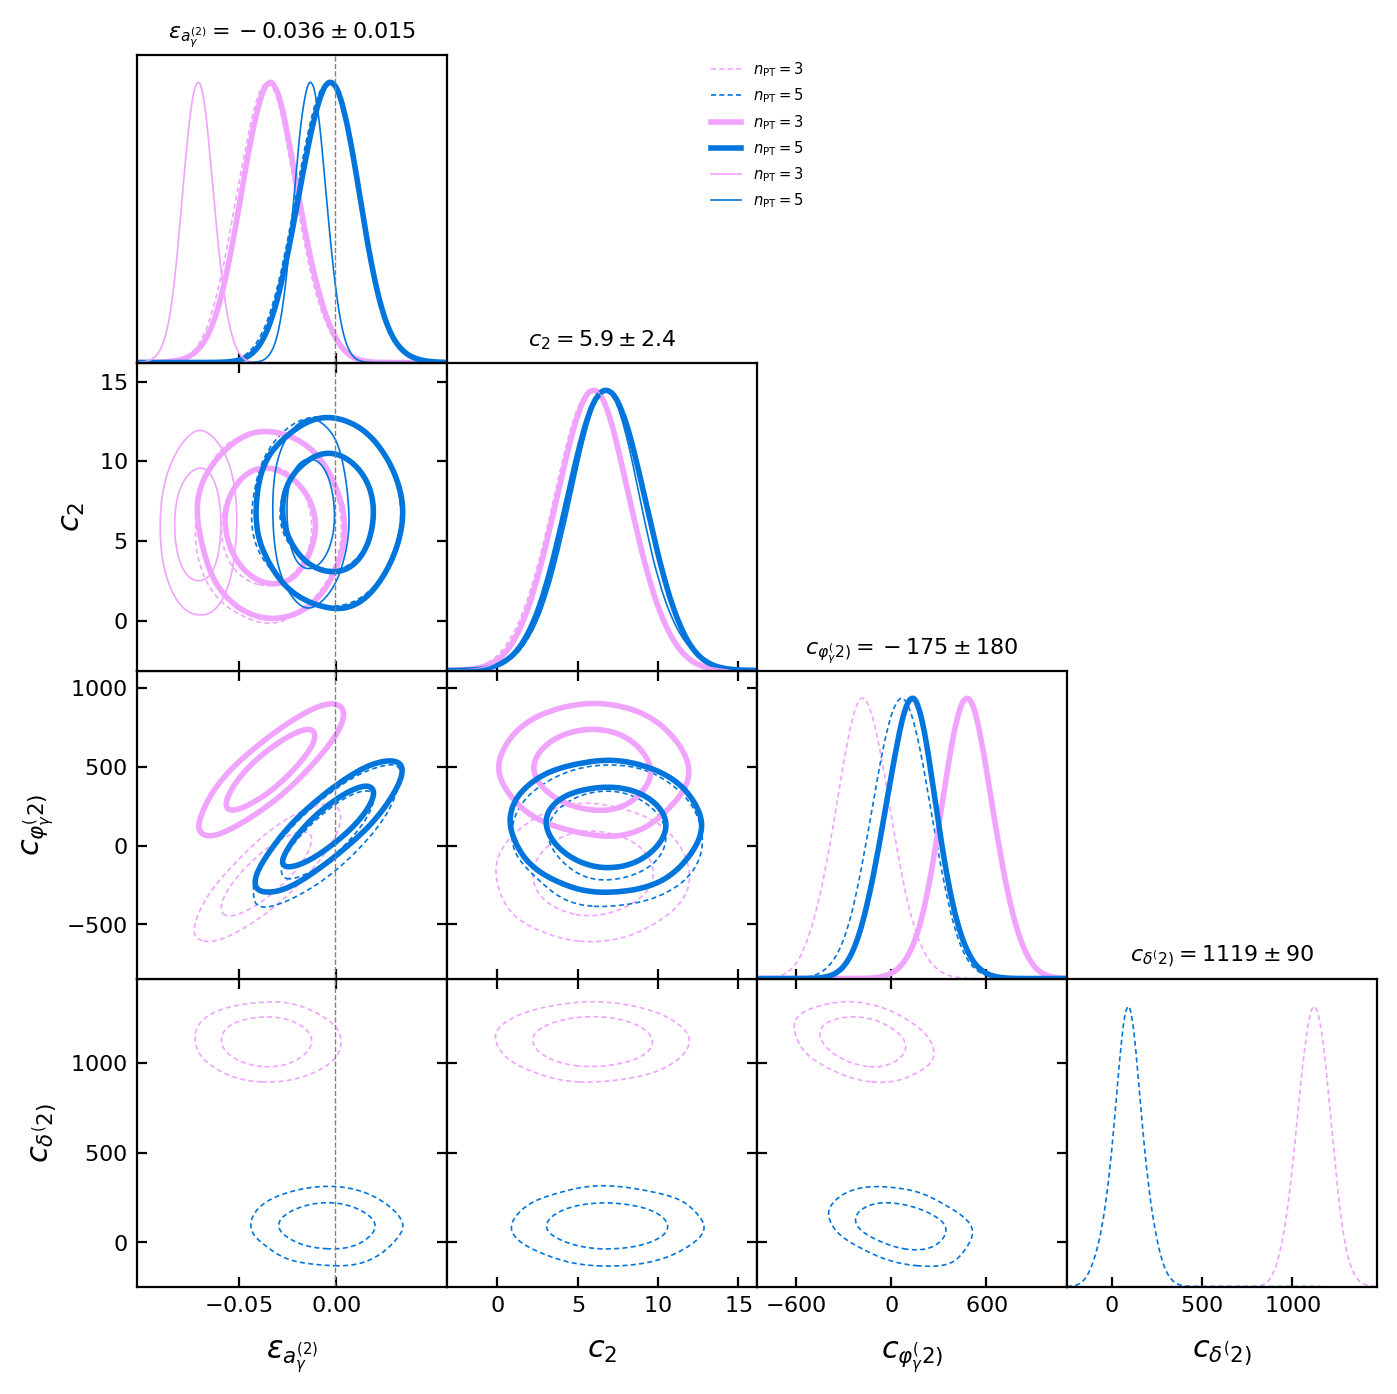

In [17]:
chain_plot_data2 = {
    "input_files": [],
    "roots": [],
    "legend_labels": [],
    "line_args": [], 
    "contour_args": [],
    **default_triangle_plot
}

for i, (nPT, chain) in enumerate(zip(nPTs4, chains4)):
    chain_plot_data2["input_files"].append(f"{project_path}/{chain}/{get_input_file_from_chain(chain)}")
    chain_plot_data2["roots"].append(loadMCSamples(f"{project_path}/{chain}/chain"))
    chain_plot_data2["legend_labels"].append(rf"$n_\text{{PT}}={nPT}$")
    chain_plot_data2["line_args"].append({
        "color": colors[i],
        "ls": "--"
    })
    chain_plot_data2["contour_args"].append({
        "color": colors[i],
        "ls": "--"
    })

for i, (nPT, chain) in enumerate(zip(nPTs5, chains5)):
    chain_plot_data2["input_files"].append(f"{project_path}/{chain}/{get_input_file_from_chain(chain)}")
    chain_plot_data2["roots"].append(loadMCSamples(f"{project_path}/{chain}/chain"))
    chain_plot_data2["legend_labels"].append(rf"$n_\text{{PT}}={nPT}$")
    chain_plot_data2["line_args"].append({
        "color": colors[i],
        "lw": 2
    })
    chain_plot_data2["contour_args"].append({
        "color": colors[i],
        "lw": 2
    })

for i, (nPT, chain) in enumerate(zip(nPTs3, chains3)):
    chain_plot_data2["input_files"].append(f"{project_path}/{chain}/{get_input_file_from_chain(chain)}")
    chain_plot_data2["roots"].append(loadMCSamples(f"{project_path}/{chain}/chain"))
    chain_plot_data2["legend_labels"].append(rf"$n_\text{{PT}}={nPT}$")
    chain_plot_data2["line_args"].append({"color": colors[i]})
    chain_plot_data2["contour_args"].append({"color": colors[i]})

chain_plot(**chain_plot_data2)

# for linking
display(HTML("<div id=\"highder-vs-EFT-kmax0.15-2\"></div>"))

#### 1.15.1 Actual effect of higher derivatives on $\varepsilon_{a_\gamma^{(2)}}$

In [10]:
# for linking
display(HTML("<div id=\"1.15.1\"></div>"))

# show best fit for different models, with and without conditioning

burnin = 0.3 # fraction to discard

print("All higher derivative terms")
print(f"{'nPT':>11} {'epsag2 (mean)':>14} {'epsag2 (16%)':>13} {'epsag2 (84%)':>13}")
for nPT, chain in zip(nPTs1, chain_plot_data1["roots"][:2]):
    samples = chain.samples[:, 0]
    samples = samples[int(burnin*len(samples)):]
    
    print(f"{nPT:11} {np.mean(samples):14.6f} {np.quantile(samples, 0.16):13.6f} {np.quantile(samples, 0.84):13.6f}")

print("Only c_delta2")
print(f"{'nPT':>11} {'epsag2 (mean)':>14} {'epsag2 (16%)':>13} {'epsag2 (84%)':>13}")
for nPT, chain in zip(nPTs2, chain_plot_data1["roots"][2:4]):
    samples = chain.samples[:, 0]
    samples = samples[int(burnin*len(samples)):]
    
    print(f"{nPT:11} {np.mean(samples):14.6f} {np.quantile(samples, 0.16):13.6f} {np.quantile(samples, 0.84):13.6f}")

print("Only c_delta2 and c_phigamma2")
print(f"{'nPT':>11} {'epsag2 (mean)':>14} {'epsag2 (16%)':>13} {'epsag2 (84%)':>13}")
for nPT, chain in zip(nPTs2, chain_plot_data2["roots"][2:4]):
    samples = chain.samples[:, 0]
    samples = samples[int(burnin*len(samples)):]
    
    print(f"{nPT:11} {np.mean(samples):14.6f} {np.quantile(samples, 0.16):13.6f} {np.quantile(samples, 0.84):13.6f}")

print("Only c_phigamma2")
print(f"{'nPT':>11} {'epsag2 (mean)':>14} {'epsag2 (16%)':>13} {'epsag2 (84%)':>13}")
for nPT, chain in zip(nPTs2, chain_plot_data2["roots"][2:4]):
    samples = chain.samples[:, 0]
    samples = samples[int(burnin*len(samples)):]
    
    print(f"{nPT:11} {np.mean(samples):14.6f} {np.quantile(samples, 0.16):13.6f} {np.quantile(samples, 0.84):13.6f}")

print("EPT (no higher derivatives)")
print(f"{'nPT':>11} {'epsag2 (mean)':>14} {'epsag2 (16%)':>13} {'epsag2 (84%)':>13}")
for nPT, chain in zip(nPTs3, chain_plot_data1["roots"][4:]):
    # get c_2 chain (index 1)
    samples = chain.samples[:, 0]
    samples = samples[int(burnin*len(samples)):]
    
    print(f"{nPT:11} {np.mean(samples):14.6f} {np.quantile(samples, 0.16):13.6f} {np.quantile(samples, 0.84):13.6f}")

All higher derivative terms
        nPT  epsag2 (mean)  epsag2 (16%)  epsag2 (84%)
          3      -0.035354     -0.055813     -0.015357
          5      -0.004632     -0.024504      0.015455
Only c_delta2
        nPT  epsag2 (mean)  epsag2 (16%)  epsag2 (84%)
          3      -0.023057     -0.034953     -0.010802
          5      -0.008174     -0.019861      0.004109
Only c_delta2 and c_phigamma2
        nPT  epsag2 (mean)  epsag2 (16%)  epsag2 (84%)
          3      -0.034760     -0.057015     -0.012415
          5      -0.002803     -0.024251      0.017932
Only c_phigamma2
        nPT  epsag2 (mean)  epsag2 (16%)  epsag2 (84%)
          3      -0.034760     -0.057015     -0.012415
          5      -0.002803     -0.024251      0.017932
EPT (no higher derivatives)
        nPT  epsag2 (mean)  epsag2 (16%)  epsag2 (84%)
          3      -0.070672     -0.081275     -0.059179
          5      -0.013159     -0.023484     -0.002521


### 1.16 high derivative $c_{\delta^{(2)}}$ at small $\Lambda$ vs EFT at large $\Lambda$

In [22]:
# for linking
display(HTML("<div id=\"1.16\"></div>"))

# compare only the lowest Lambda

query = {
    "nPT": 3,
    "Lambda": 0.346,
    "model": "high_der",
    "run_1": 0,
    "run_2": 0
}
chains1 = browse_chains(
    query = query
)
kmaxs1, chains1 = sort_from_key(chains1, "kmax") # sort based on kmax

query = {
    "nPT": 3,
    "Lambda": 1.0723,
    "model": "EFT"
}
chains2 = browse_chains(
    query = query
)
kmaxs2, chains2 = sort_from_key(chains2, "kmax") # sort list based on nPT
kmaxs2, chains2 = kmaxs2[:-1], chains2[:-1] # remove value at kmax=0.2

searching file 72 of 72
Search between the beginning of time and the end of time with the following query:
nPT: 3
Lambda: 0.346
model: high_der
run_1: 0
run_2: 0
yielded the following files:

field-level-inference-GridSPT_output_202503081805
field-level-inference-GridSPT_output_202503081813
searching file 72 of 72
Search between the beginning of time and the end of time with the following query:
nPT: 3
Lambda: 1.0723
model: EFT
yielded the following files:

field-level-inference-GridSPT_output_202503031628
field-level-inference-GridSPT_output_202503031751
field-level-inference-GridSPT_output_202503071742


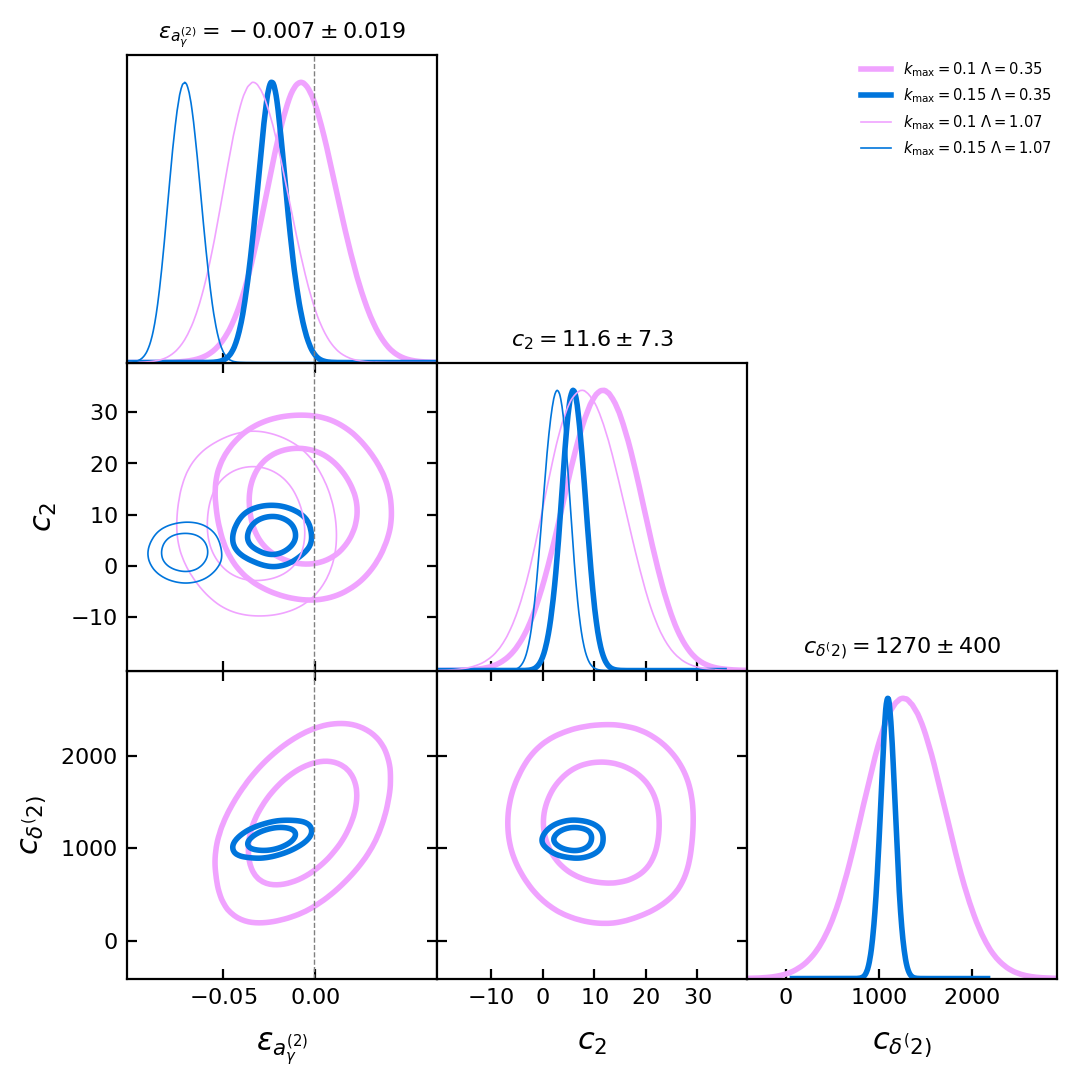

In [24]:
chain_plot_data1 = {
    "input_files": [],
    "roots": [],
    "legend_labels": [],
    "line_args": [], 
    "contour_args": [],
    **default_triangle_plot
}

for i, (kmax, chain) in enumerate(zip(kmaxs1, chains1)):
    chain_plot_data1["input_files"].append(f"{project_path}/{chain}/{get_input_file_from_chain(chain)}")
    chain_plot_data1["roots"].append(loadMCSamples(f"{project_path}/{chain}/chain"))
    chain_plot_data1["legend_labels"].append(rf"$k_\text{{max}}={kmax}$ $\Lambda=0.35$")
    chain_plot_data1["line_args"].append({
        "color": colors[i],
        "lw": 2
    })
    chain_plot_data1["contour_args"].append({
        "color": colors[i],
        "lw": 2
    })

for i, (kmax, chain) in enumerate(zip(kmaxs2, chains2)):
    chain_plot_data1["input_files"].append(f"{project_path}/{chain}/{get_input_file_from_chain(chain)}")
    chain_plot_data1["roots"].append(loadMCSamples(f"{project_path}/{chain}/chain"))
    chain_plot_data1["legend_labels"].append(rf"$k_\text{{max}}={kmax}$ $\Lambda=1.07$")
    chain_plot_data1["line_args"].append({"color": colors[i]})
    chain_plot_data1["contour_args"].append({"color": colors[i]})

chain_plot(**chain_plot_data1)

# for linking
display(HTML("<div id=\"highder-vs-EFT-manyLambda-n3\"></div>"))

In [25]:
# compare only the lowest Lambda

query = {
    "nPT": 5,
    "Lambda": 0.346,
    "model": "high_der",
    "run_1": 0,
    "run_2": 0
}
chains1 = browse_chains(
    query = query
)
kmaxs1, chains1 = sort_from_key(chains1, "kmax") # sort based on kmax

query = {
    "nPT": 5,
    "Lambda": 1.0723,
    "model": "EFT"
}
chains2 = browse_chains(
    query = query
)
kmaxs2, chains2 = sort_from_key(chains2, "kmax") # sort list based on nPT
kmaxs2, chains2 = kmaxs2[:-1], chains2[:-1] # remove value at kmax=0.2

searching file 72 of 72
Search between the beginning of time and the end of time with the following query:
nPT: 5
Lambda: 0.346
model: high_der
run_1: 0
run_2: 0
yielded the following files:

field-level-inference-GridSPT_output_202503081808
field-level-inference-GridSPT_output_202503081816
searching file 72 of 72
Search between the beginning of time and the end of time with the following query:
nPT: 5
Lambda: 1.0723
model: EFT
yielded the following files:

field-level-inference-GridSPT_output_202503031702
field-level-inference-GridSPT_output_202503031754
field-level-inference-GridSPT_output_202503071755


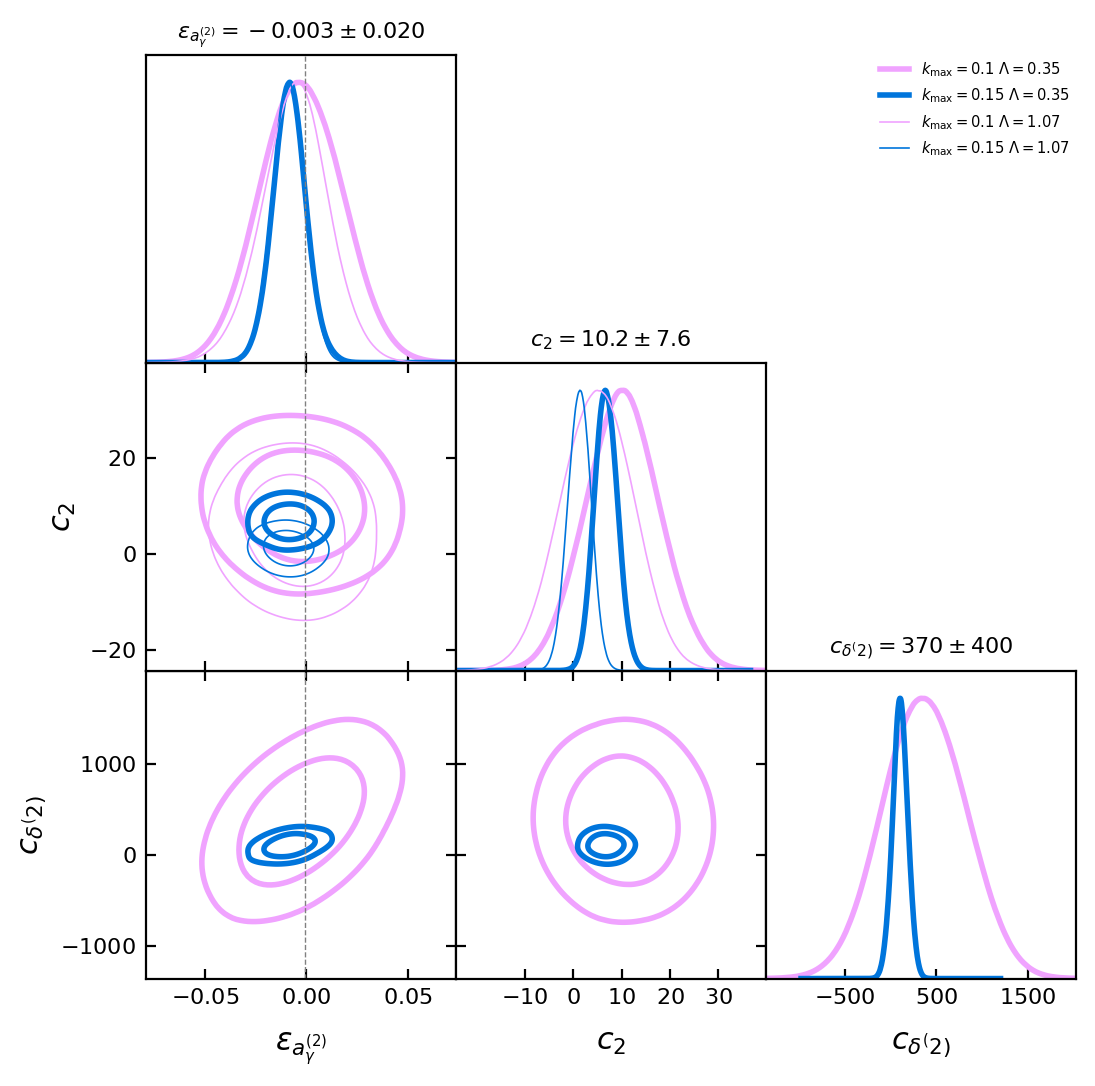

In [26]:
chain_plot_data1 = {
    "input_files": [],
    "roots": [],
    "legend_labels": [],
    "line_args": [], 
    "contour_args": [],
    **default_triangle_plot
}

for i, (kmax, chain) in enumerate(zip(kmaxs1, chains1)):
    chain_plot_data1["input_files"].append(f"{project_path}/{chain}/{get_input_file_from_chain(chain)}")
    chain_plot_data1["roots"].append(loadMCSamples(f"{project_path}/{chain}/chain"))
    chain_plot_data1["legend_labels"].append(rf"$k_\text{{max}}={kmax}$ $\Lambda=0.35$")
    chain_plot_data1["line_args"].append({
        "color": colors[i],
        "lw": 2
    })
    chain_plot_data1["contour_args"].append({
        "color": colors[i],
        "lw": 2
    })

for i, (kmax, chain) in enumerate(zip(kmaxs2, chains2)):
    chain_plot_data1["input_files"].append(f"{project_path}/{chain}/{get_input_file_from_chain(chain)}")
    chain_plot_data1["roots"].append(loadMCSamples(f"{project_path}/{chain}/chain"))
    chain_plot_data1["legend_labels"].append(rf"$k_\text{{max}}={kmax}$ $\Lambda=1.07$")
    chain_plot_data1["line_args"].append({"color": colors[i]})
    chain_plot_data1["contour_args"].append({"color": colors[i]})

chain_plot(**chain_plot_data1)

# for linking
display(HTML("<div id=\"highder-vs-EFT-manyLambda-n5\"></div>"))

## Individual chains

### Chain 202502251617

In [10]:
input_file = "field-level-inference-GridSPT_input_202502251617.yaml"
output_file = "field-level-inference-GridSPT_output_202502251617"

plotting chain /hpc/home/matteo.peron/projects/field-level-inference-GridSPT/in_out/field-level-inference-GridSPT_output_202502251617/field-level-inference-GridSPT_input_202502251617.yaml
--- INPUT FOR 202502251617 ---

README: "This is the input file containing all the information about a single execution of the project 'field-level-inference-GridSPT'.""
""
"The file is structured as follows:"
""
"  - `gridspt_fields` contains all the information about the fields generated by GridSPT;"
"  - `nbody_field_input` contains all the information about the fields generated from an N-body simulation;"
"  - `nbody_field_output` contains all the information about the N-body snapshot used to generate N-body fields;"
"  - `chain` contains all the information about the chains or optimizations to be run between N-body fields and GridSPT fields"
"  - `DEBUG` contains the flag to control debugging in the main code"
"  - `RESUME_CHAIN` contains the flag to control resuming of an unfinished chain"
"  - 

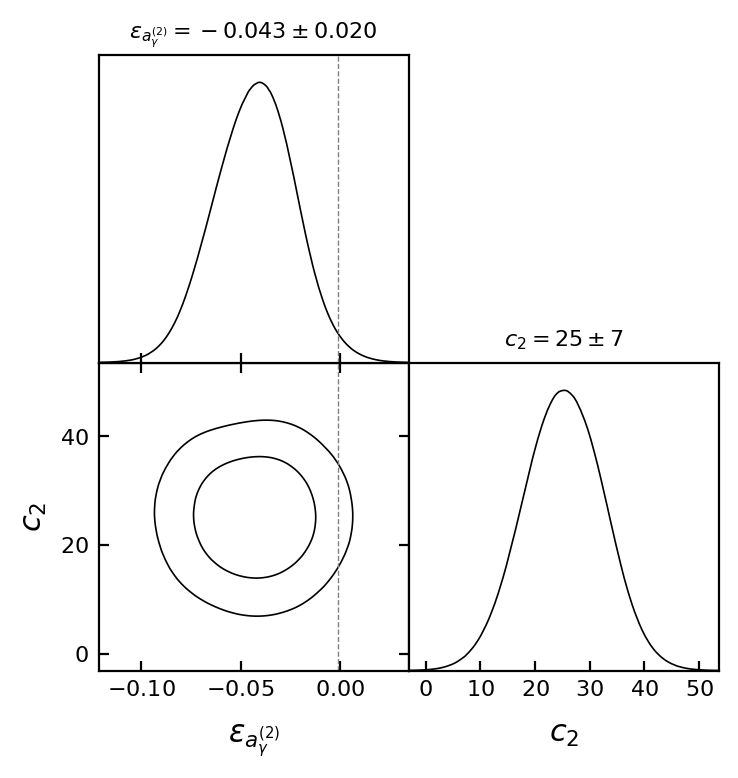

In [11]:
chain_plot_data = {
    "input_files": [f"{project_path}/{output_file}/{input_file}"],
    "roots": [loadMCSamples(f"{project_path}/{output_file}/chain")],
    #"line_args"=[{"color": colors[0]}], 
    #"contour_args"=[{"color": colors[0]}],
    **default_triangle_plot
}

chain_plot(**chain_plot_data)

$c_2 k^2 \delta^{(1)}$

### Tests

In [ ]:
pars = parse_yaml(f"{project_path}/{input_file}")
model_fields = run_chains.load_fields(**pars["gridspt_fields"])
data = generate_fields.load_field(**pars["nbody_field_input"])

 loading field uvz4: 100%
 loading field uvz2: 100%
 loading field phi_betagamma3: 100%
 loading field uv4: 100%
 loading field uv2: 100%
 loading field phi_gammagamma3: 100%
 loading field 1st_delta: 100%
 loading field 3rd_delta: 100%
 loading field phi_gamma2: 100%
 loading field 2nd_delta: 100%


processing uvz4

Computing power spectrum of the field...
Time to complete loop = 0.01
Time taken = 0.02 seconds


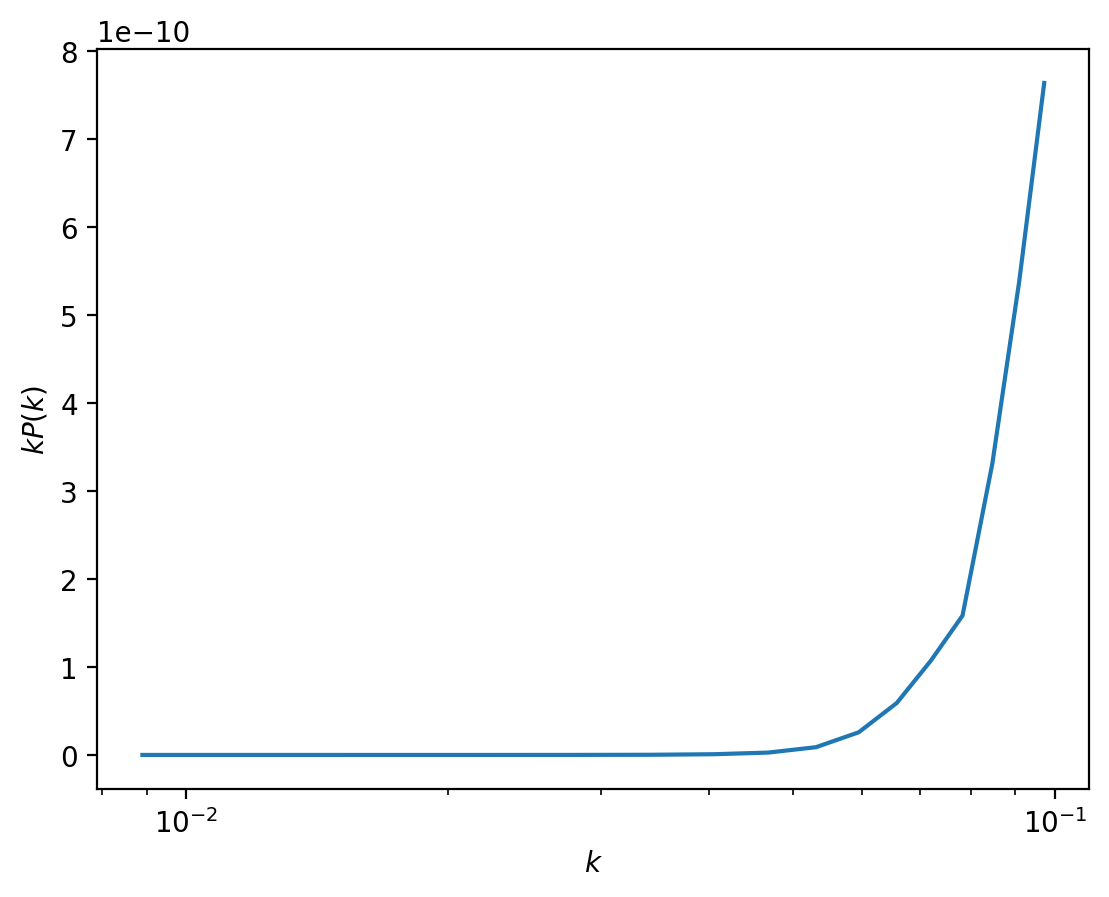

processing uvz2

Computing power spectrum of the field...
Time to complete loop = 0.01
Time taken = 0.02 seconds


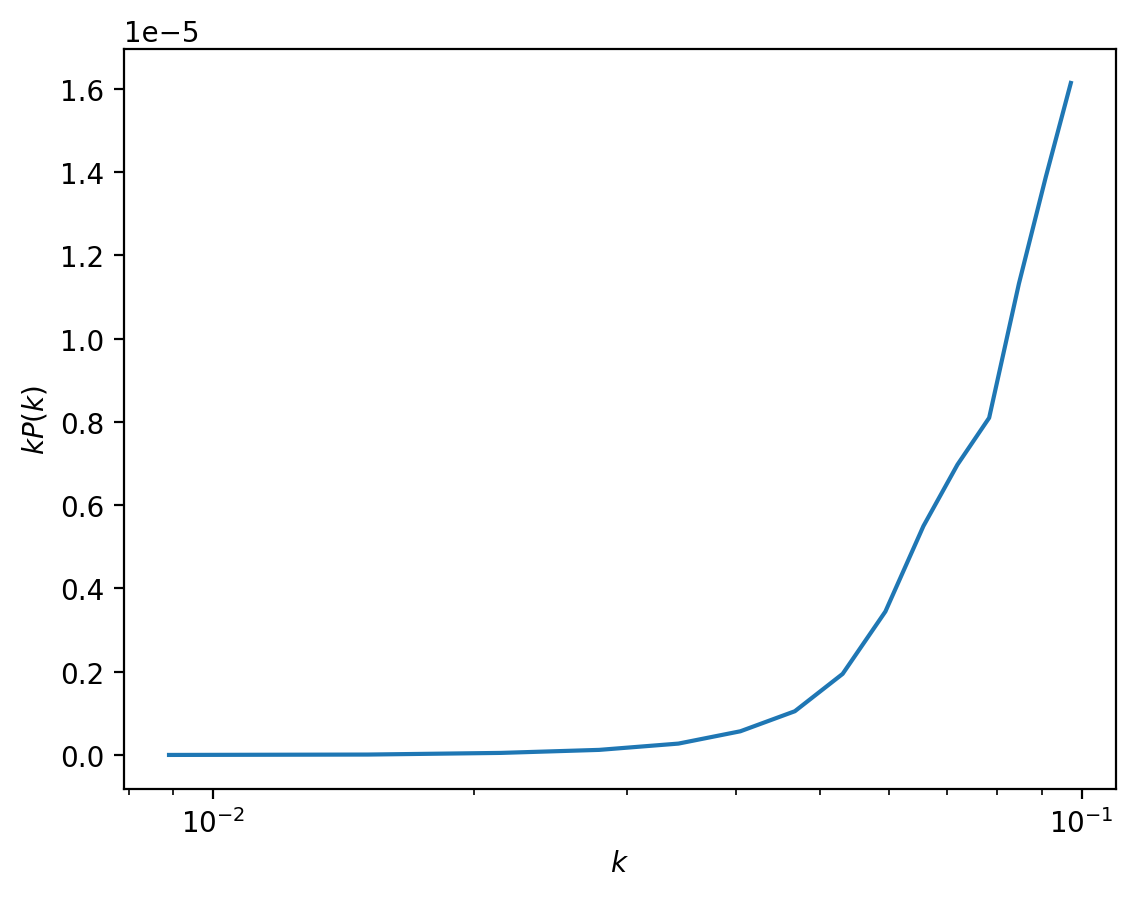

processing phi_betagamma3

Computing power spectrum of the field...
Time to complete loop = 0.01
Time taken = 0.02 seconds


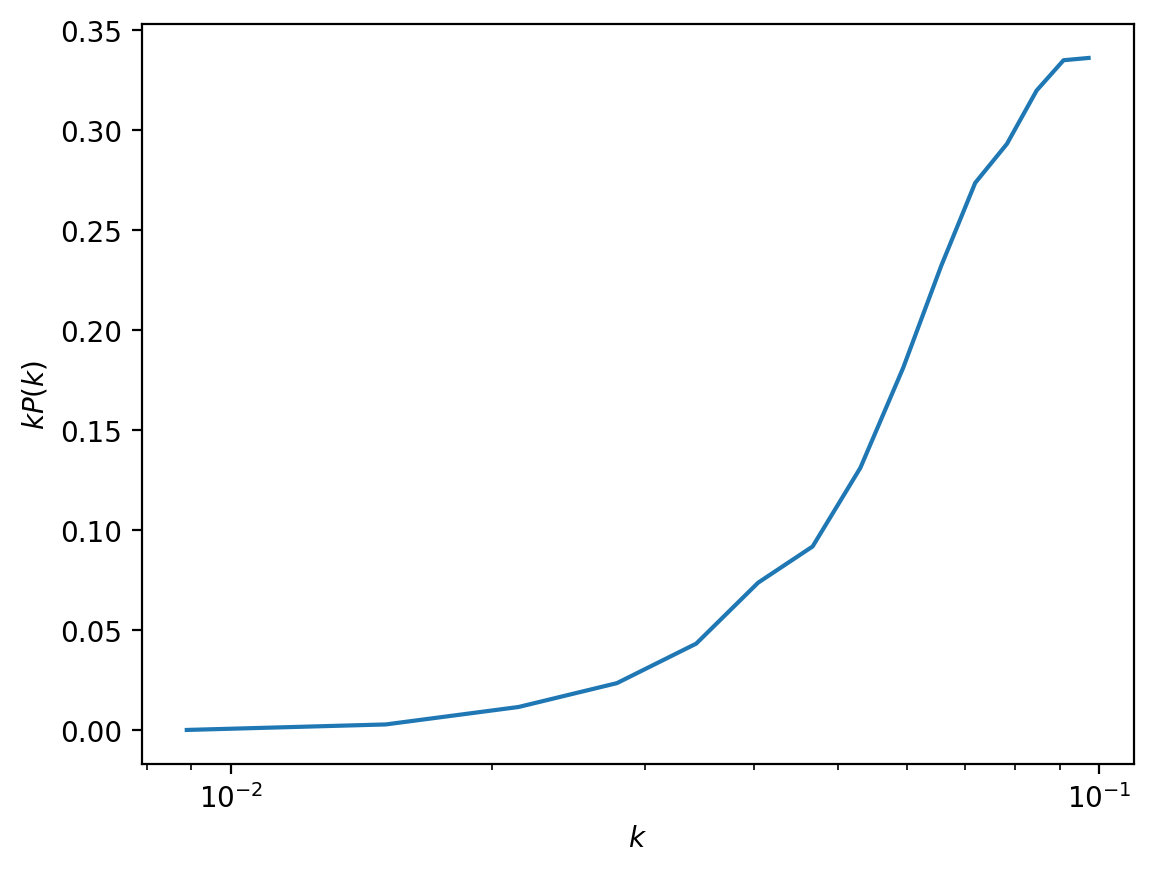

processing uv4

Computing power spectrum of the field...
Time to complete loop = 0.01
Time taken = 0.02 seconds


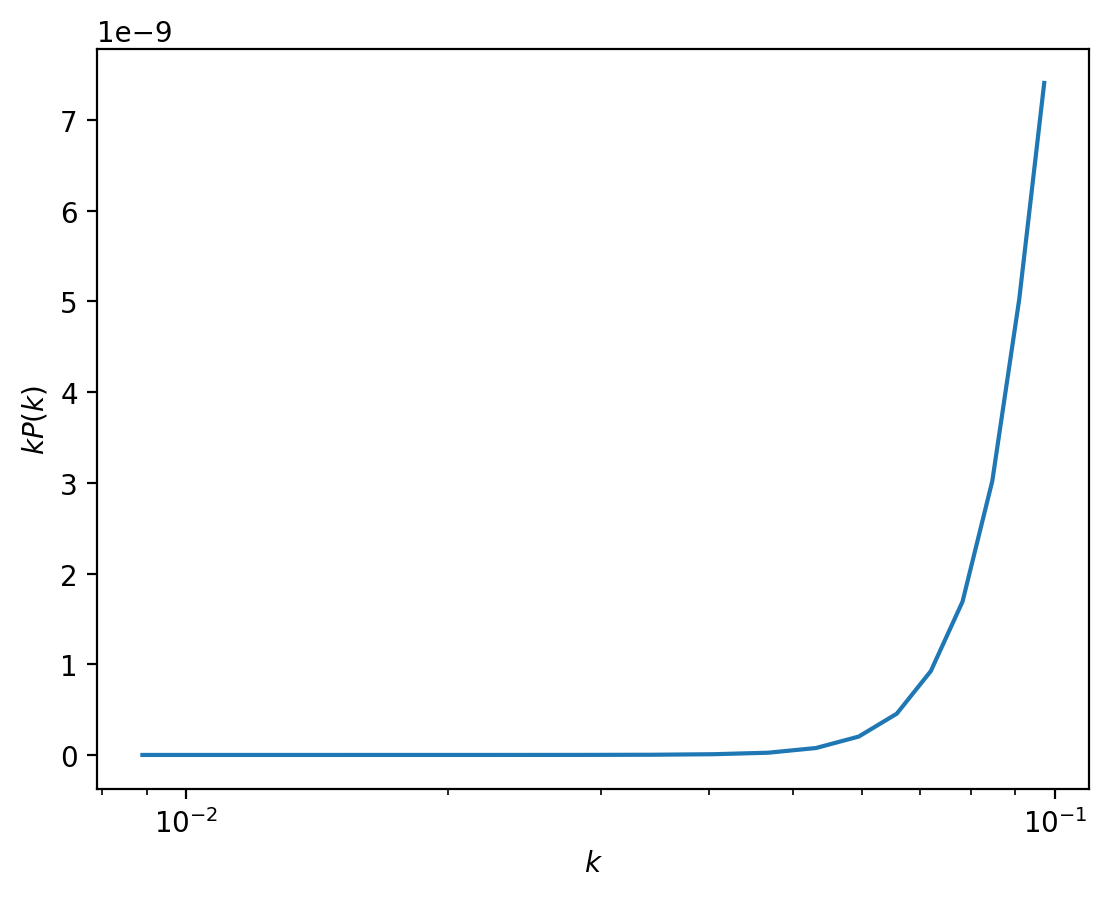

processing uv2

Computing power spectrum of the field...
Time to complete loop = 0.01
Time taken = 0.02 seconds


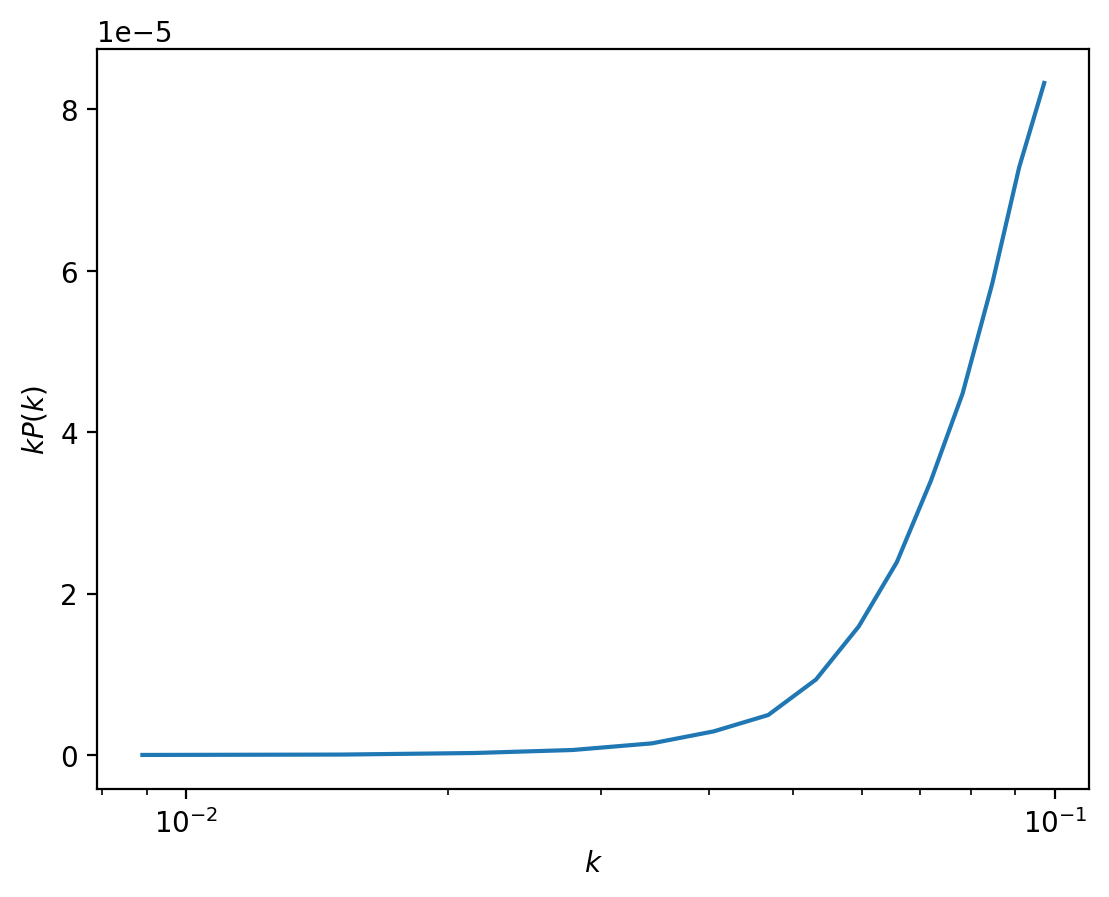

processing phi_gammagamma3

Computing power spectrum of the field...
Time to complete loop = 0.01
Time taken = 0.02 seconds


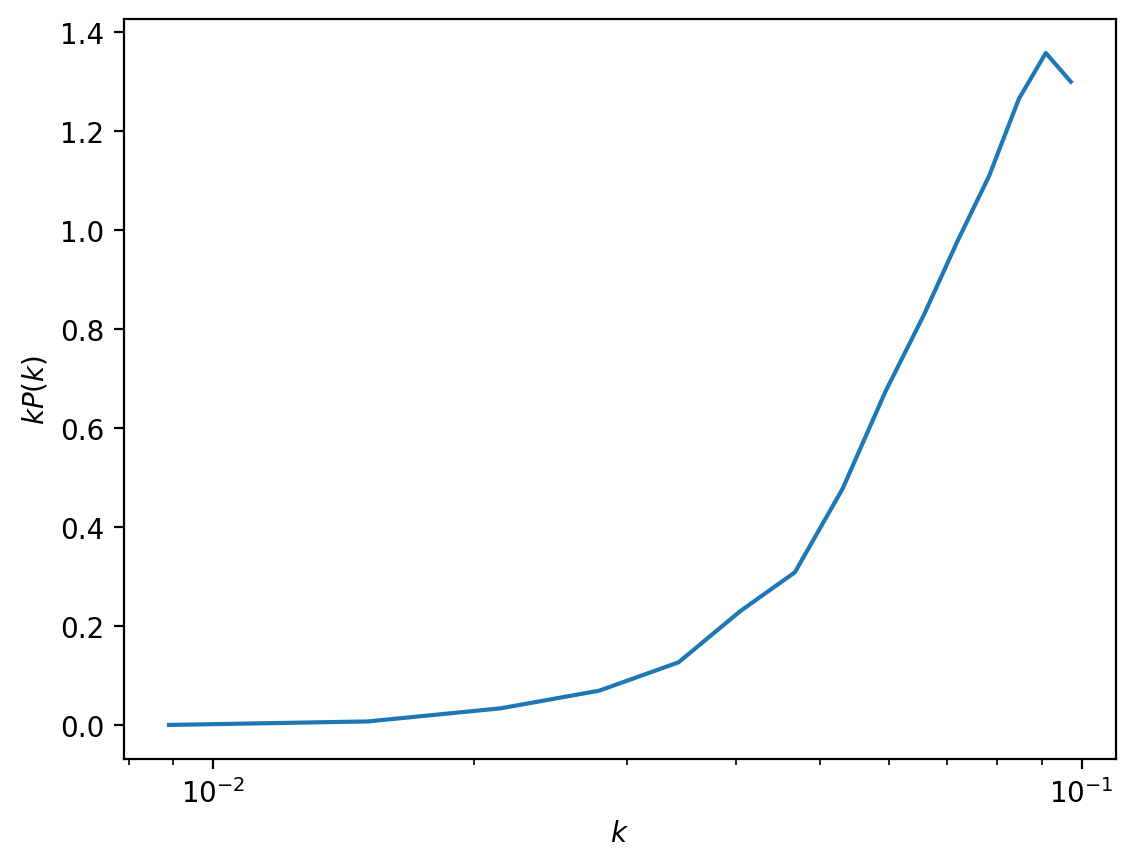

processing 1st_delta

Computing power spectrum of the field...
Time to complete loop = 0.01
Time taken = 0.02 seconds


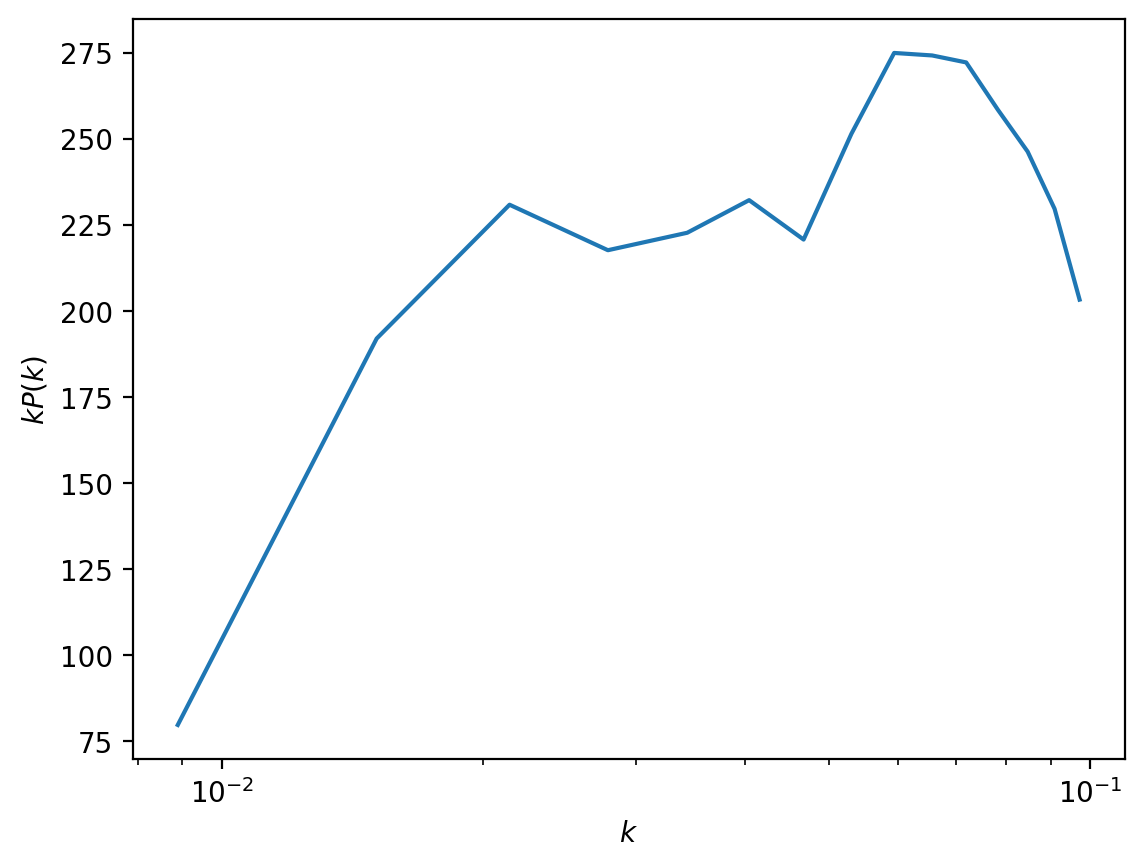

processing 3rd_delta

Computing power spectrum of the field...
Time to complete loop = 0.01
Time taken = 0.02 seconds


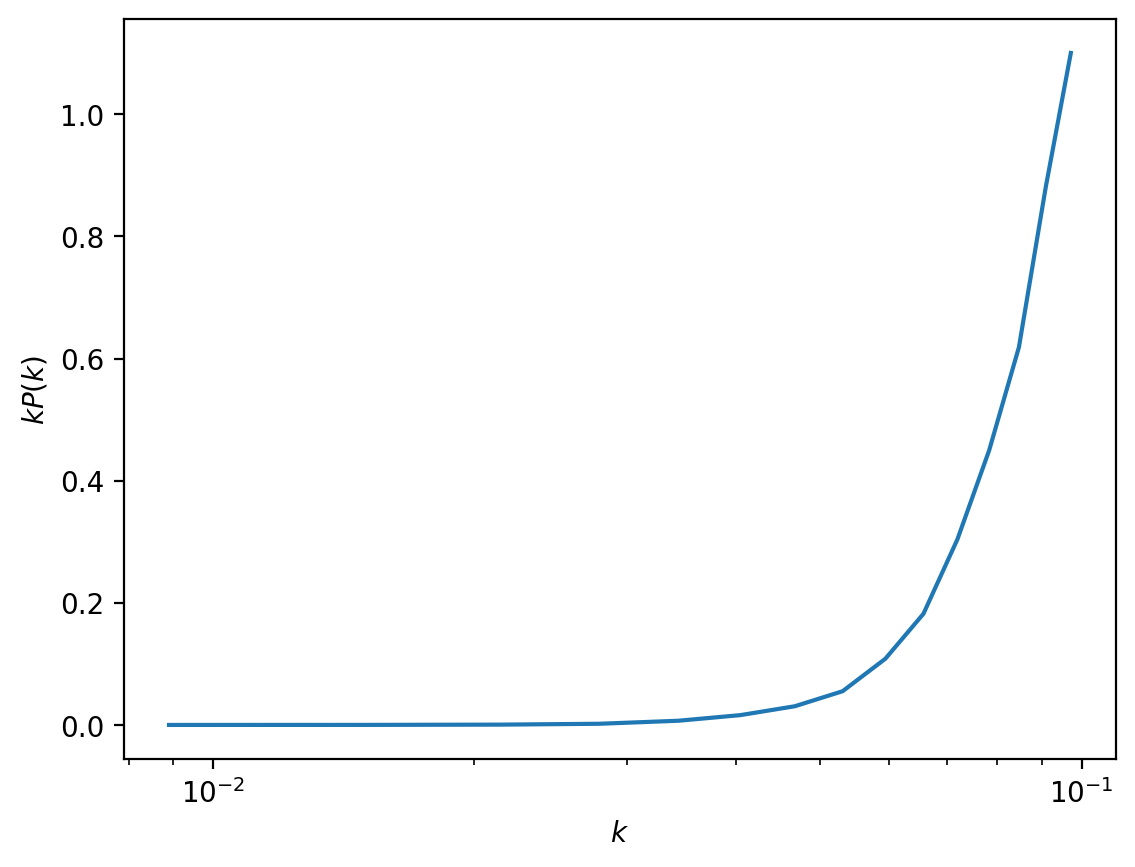

processing phi_gamma2

Computing power spectrum of the field...
Time to complete loop = 0.01
Time taken = 0.02 seconds


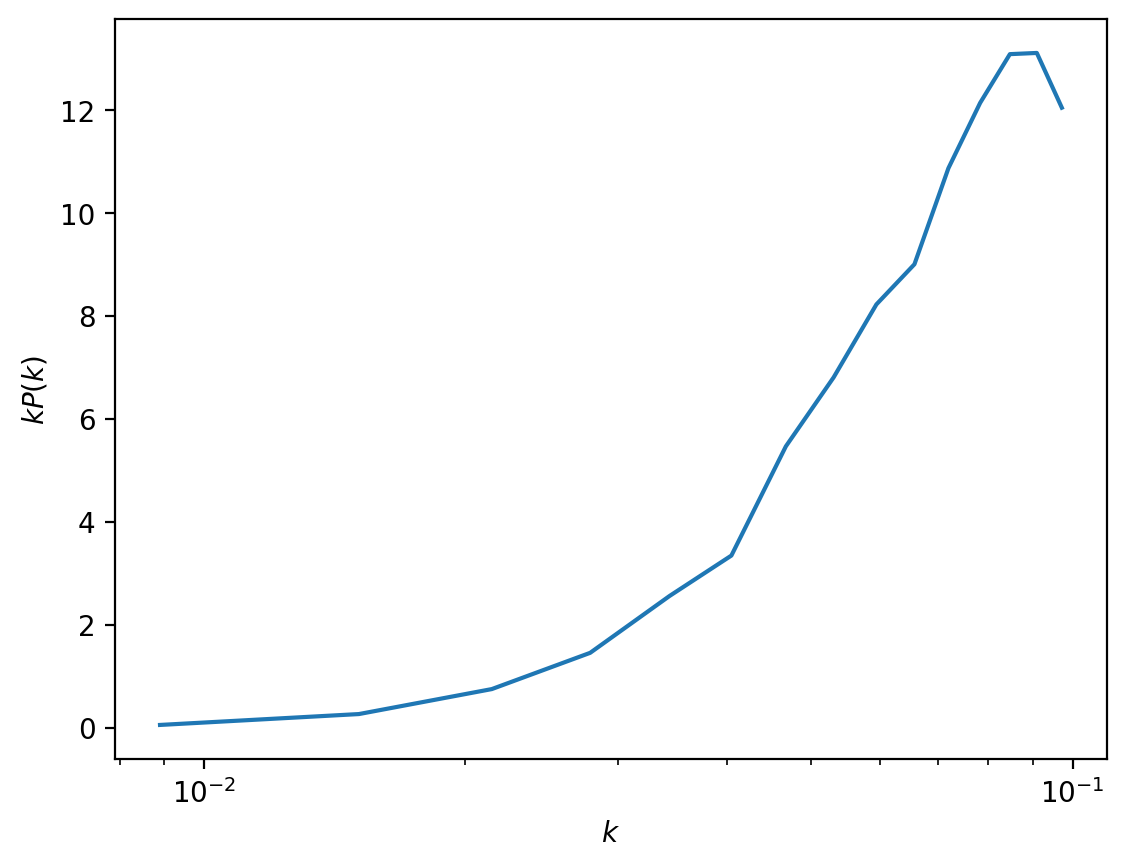

processing 2nd_delta

Computing power spectrum of the field...
Time to complete loop = 0.01
Time taken = 0.02 seconds


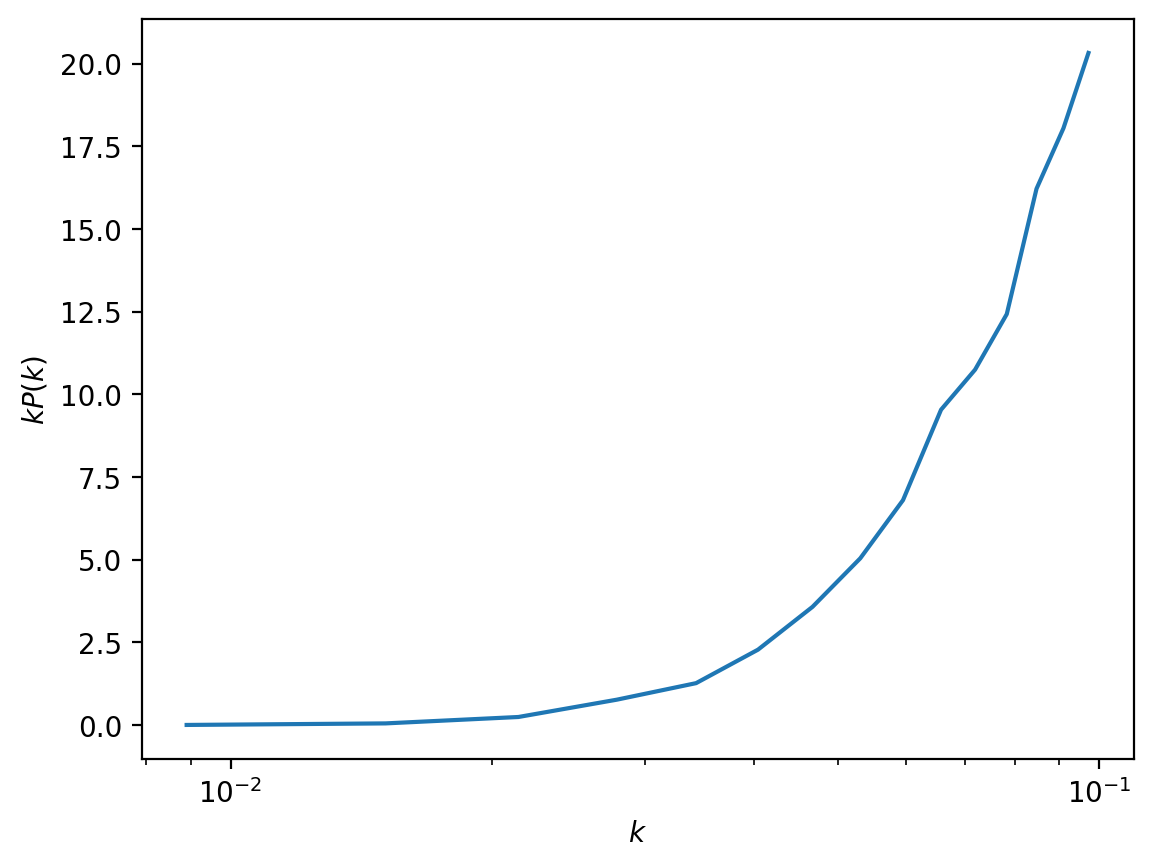

processing nbody

Computing power spectrum of the field...
Time to complete loop = 0.01
Time taken = 0.02 seconds


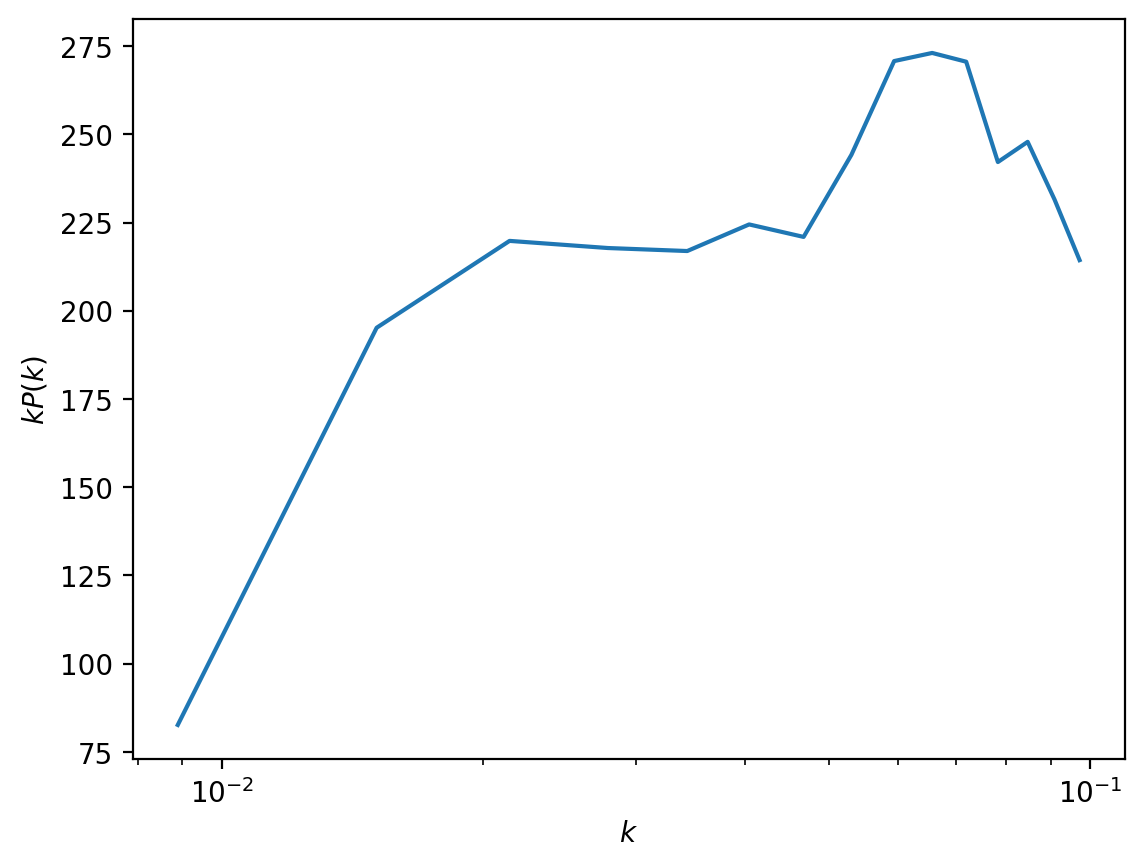

In [ ]:
# plot P(k) of all fields

model_fields["nbody"] = data
kmax = pars["chain"]["kmax"]
Dfac = run_chains.dgrowth_exact(pars["gridspt_fields"]["z"], pars["gridspt_fields"]["Om"])/run_chains.dgrowth_exact(30, pars["gridspt_fields"]["Om"])
for name, field in model_fields.items():
    print(f"processing {name}")
    pk = PKL.Pk(field, 1000, 0, "CIC" if name=="nbody" else "none")
    mask = pk.k3D<=kmax

    if name=="nbody": D, sn = 1, 1/2e-3
    else: sn = 0
    if "uv" in name: D = 1
    if "gamma2" in name: D = Dfac**4
    if "gamma3" in name: D = Dfac**6
    if "1st" in name: D = Dfac**2
    if "2nd" in name: D = Dfac**4
    if "3rd" in name: D = Dfac**6

    fig = plt.figure()

    ax = fig.add_subplot(111)
    ax.plot(
        pk.k3D[mask],
        pk.k3D[mask]*(pk.Pk[mask, 0]-sn)*D,
    )
    
    ax.set_xscale("log")
    ax.set_xlabel(r"$k$")
    ax.set_ylabel(r"$kP(k)$")

    plt.show()
    

processing 1st_delta

Computing power spectrum of the field...
Time to complete loop = 0.01
Time taken = 0.02 seconds
processing nbody

Computing power spectrum of the field...
Time to complete loop = 0.01
Time taken = 0.02 seconds
Average deviation within k<=0.06 h/Mpc: 0.01138189269906529


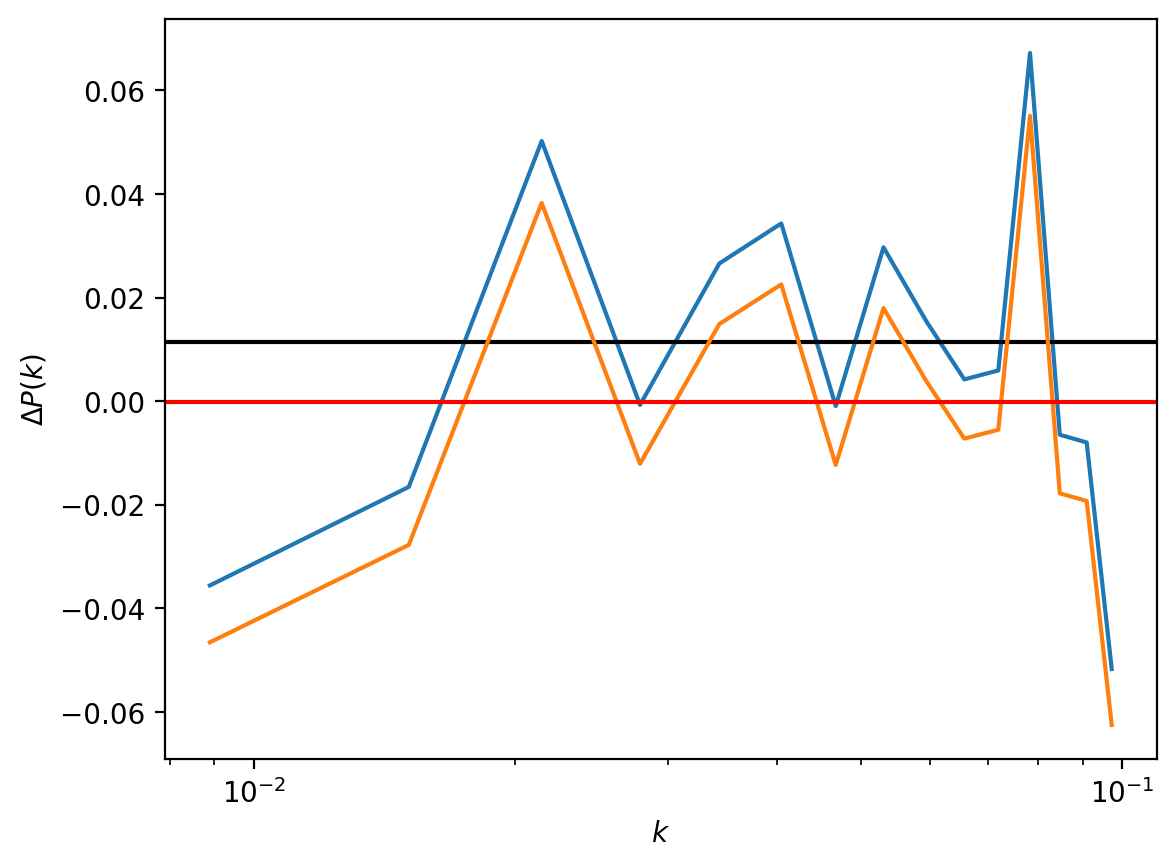

In [ ]:
# plot of linear field vs nbody

model_fields["nbody"] = data
kmax = pars["chain"]["kmax"]
Dfac = run_chains.dgrowth_exact(pars["gridspt_fields"]["z"], pars["gridspt_fields"]["Om"])/run_chains.dgrowth_exact(30, pars["gridspt_fields"]["Om"])
pks = {}
for name, field in model_fields.items():
    if name!="nbody" and name!="1st_delta":
        continue
    
    print(f"processing {name}")
    pk = PKL.Pk(field, 1000, 0, "CIC" if name=="nbody" else "none")
    mask = pk.k3D<=kmax

    if name=="nbody": D, sn = 1, 1/2e-3
    else: sn = 0
    if "uv" in name: D = 1
    if "gamma2" in name: D = Dfac**4
    if "gamma3" in name: D = Dfac**6
    if "1st" in name: D = Dfac**2
    if "2nd" in name: D = Dfac**4
    if "3rd" in name: D = Dfac**6

    pks["k"] = pk.k3D[mask]
    pks[name] = pk.Pk[mask, 0]*D

fig = plt.figure()

ax = fig.add_subplot(111)
deviations = (pks["1st_delta"]-(pks["nbody"]-sn))/(pks["nbody"]-sn)
ax.plot(
    pks["k"],
    deviations,
)
systematic = np.mean(deviations[pks["k"]<=0.06])
ax.axhline(systematic, color="k") # avg deviation within k<=0.06

print(f"Average deviation within k<=0.06 h/Mpc: {systematic}")


deviations = ((1-systematic)*pks["1st_delta"]-(pks["nbody"]-sn))/(pks["nbody"]-sn)
ax.plot(
    pks["k"],
    deviations,
)
systematic = np.mean(deviations[pks["k"]<=0.06])
ax.axhline(systematic, color="r")

ax.set_xscale("log")
ax.set_xlabel(r"$k$")
ax.set_ylabel(r"$\Delta P(k)$")

plt.show()
    

It might be necessary to correct the linear field by $\sqrt{1-0.0114}$. Since higher order are made with products of linear fields, they can be corrected with products of that factor

### Chain 202503031150

In [ ]:
input_file = "field-level-inference-GridSPT_input_202503031150.yaml"
output_file = "field-level-inference-GridSPT_output_202503031150"

/hpc/home/matteo.peron/projects/field-level-inference-GridSPT/in_out/field-level-inference-GridSPT_output_202503031150/chain.txt
Removed no burn in
plotting chain /hpc/home/matteo.peron/projects/field-level-inference-GridSPT/in_out/field-level-inference-GridSPT_output_202503031150/field-level-inference-GridSPT_input_202503031150.yaml
--- INPUT FOR 202503031150 ---

README: "This is the input file containing all the information about a single execution of the project 'field-level-inference-GridSPT'.""
""
"The file is structured as follows:"
""
"  - `gridspt_fields` contains all the information about the fields generated by GridSPT;"
"  - `nbody_field_input` contains all the information about the fields generated from an N-body simulation;"
"  - `nbody_field_output` contains all the information about the N-body snapshot used to generate N-body fields;"
"  - `chain` contains all the information about the chains or optimizations to be run between N-body fields and GridSPT fields"
"  - `DEB

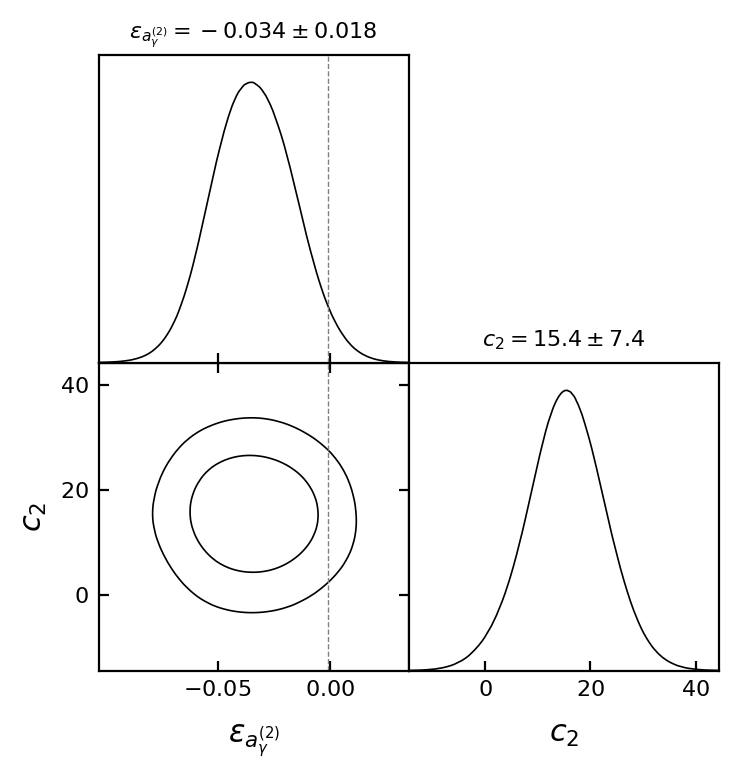

In [ ]:
chain_plot_data = {
    "input_files": [f"{project_path}/{output_file}/{input_file}"],
    "roots": [loadMCSamples(f"{project_path}/{output_file}/chain")],
    #"line_args"=[{"color": colors[0]}], 
    #"contour_args"=[{"color": colors[0]}],
    **default_triangle_plot
}

chain_plot(**chain_plot_data)